<a href="https://colab.research.google.com/github/OluwafemiOlasupo/Glossophobia-Analysis-and-Modelling/blob/main/Glossophobia_Analysis_and_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Connecting Notebook to Drive (Data Storage Location)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## File Path

In [ ]:
## Files and Data Path
file_path = "/content/drive/MyDrive/Femi et Beekay/"

## Import the Needed Libraries

In [ ]:
## Basic Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_name = 'Questionnaire on Glossophobia.csv'


## Import Data

In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/Femi et Beekay/Questionnaire on Glossophobia.csv")
Data.head(10)

Year of Study What faculty are you? Department (New)       Age  Gender  \
0    Third Year           Agriculture   Animal Science   21 - 23  Female   
1    Third Year           Agriculture   Animal Science   21 - 23    Male   
2   Second Year           Agriculture         Agronomy   18 - 20    Male   
3   Fourth Year           Agriculture   Animal Science   24 - 26  Female   
4   Second Year                  Arts          English   18 - 20  Female   
5    Third Year                  Arts              CLA   18 - 20  Female   
6    First Year                  Arts       Philosophy  Below 18  Female   
7   Fourth Year                  Arts          History   21 - 23  Female   
8   Fourth Year                  Arts       Philosophy   21 - 23    Male   
9    First Year                  Arts              CLA  Below 18  Female   

       Religion   Tribe Secondary School attended Who do you live with?  \
0  Christianity  Yoruba                Government              Guardian   
1  Christianity  Yoruba                   Private    Biological Parents   
2  Christianity  Yoruba                   Private    Biological Parents   
3  Christianity  Yoruba                    Public    Biological Parents   
4  Christianity  Yoruba                   Private    Biological Parents   
5  Christianity  Yoruba                   Private    Biological Parents   
6  Christianity  Yoruba                    Public              Guardian   
7         Islam  Yoruba                   Private    Biological Parents   
8  Christianity  Yoruba                Government    Biological Parents   
9  Christianity  Yoruba                    Public    Biological Parents   

  Parents' Marital Status  ...  \
0                 Married  ...   
1                 Married  ...   
2                 Married  ...   
3                 Widowed  ...   
4                 Married  ...   
5                 Widowed  ...   
6                 Married  ...   
7                 Married  ...   
8                 Married  ...   
9                 Married  ...   

  What strategies do you currently use to cope with glossophobia? (Select all that apply  \
0  Avoiding public speaking opportunites, Seeking...                                       
1              Avoiding public speaking opportunites                                       
2  Practicing extensively beforehand, Seeking fee...                                       
3  Practicing extensively beforehand, Seeking fee...                                       
4  Seeking feedback from colleagues and lecturers...                                       
5  Practicing extensively beforehand, Seeking fee...                                       
6  Using relaxation techniques (e.g. deep breathi...                                       
7              Avoiding public speaking opportunites                                       
8  Practicing extensively beforehand, Seeking fee...                                       
9  Avoiding public speaking opportunites, Practic...                                       

  Have you used any of the following support systems to help with your public speaking anxiety? (select all that apply)  \
0  Public Speaking workshops, Online resources (e...                                                                      
1           Online resources (e.g, videos, articles)                                                                      
2  Counselling services, Public Speaking workshop...                                                                      
3                                Peer support groups                                                                      
4                               Counselling services                                                                      
5  Public Speaking workshops, Online resources (e...                                                                      
6  Counselling services, Online resources (e.g, v...                                      

# Data Cleaning

In [ ]:
Data.columns

Index(['Year of Study', 'What faculty are you?', 'Department (New)', 'Age',
       'Gender', 'Religion', 'Tribe', 'Secondary School attended',
       'Who do you live with?', 'Parents' Marital Status',
       'Number of children in your family', 'Position in family',
       'Parent level of education',
       'Did you stay with your parents while growing up?',
       'Did you participate in any extracurricular / religious activity as a child?',
       'What was the activity?',
       'Did you ever take the lead in these activities?',
       'As a child, were you allowed to voice out your opinion in the family? ',
       'Have you ever delivered a speech anywhere?',
       'How often do you engage in public speaking activities (e.g presentations, speeches) as part of your coursework?',
       'On a scale of 1 to 5, how confident are you in your public speaking ability? ',
       'Have you ever experienced anxiety or fear before or during a public speaking event?',
       'What is the hi

In [ ]:
len(Data.columns)

51

## First Rename Ambiguous Column Names

In [ ]:
Data.rename(columns={"What faculty are you?": "Faculty", "Department (New)": "Department","Number of children in your family": "No. of children in family",
                     "Did you stay with your parents while growing up?": "Stayed with parents while growing up?",
                     "Did you participate in any extracurricular / religious activity as a child?": "Extracurricular/religious activity as a child",
                     "What was the activity?": "Which activity?", "Did you ever take the lead in these activities?": "Led these activities?",
                     "As a child, were you allowed to voice out your opinion in the family? ": "Voiced out opinioin as a child?",
                     "Have you ever delivered a speech anywhere?": "Ever delivered a speech?",
                     "How often do you engage in public speaking activities (e.g presentations, speeches) as part of your coursework?": "Public speaking involvement in coursework",
                     "On a scale of 1 to 5, how confident are you in your public speaking ability? ": "Confidence in public speaking ability",
                     "Have you ever experienced anxiety or fear before or during a public speaking event?": "Ever experienced fear in public speaking?",
                     "What is the highest number audience you have spoken to before?": "Max no. of people spoken to",
                     "How easy do you make friend?": "Ease in making friends",
                     "Have you ever experienced low self esteem?": "Ever experienced low self-esteem?",
                     "Do you have any medical issue related to anxiety?": "Medical issue related to anxiety?",
                     "To what extent do you agree with the following statements?  [I have had negative experiences with public speaking in the past]": "Negative experiences in public speaking?",
                     "To what extent do you agree with the following statements?  [I feel unprepared and lack practice for public speaking]": "Unpreparedness/practice in public speaking?",
                     "To what extent do you agree with the following statements?  [I am concerned about being judged by my peers]": "Concerned about being judged by peers?",
                     "To what extent do you agree with the following statements?  [I worry about making mistakes during my speech]": "Worries about making mistakes in speeches?",
                     "To what extent do you agree with the following statements?  [I feel anxious about being evaluated by others]": "Anxious about others' evaluation?",
                     "How much do the following factors contribute to your fear of public speaking? (1 = Not at all, 5 = A great deal) [Lack of Preparation]": "Effect of lack of preparation",
                     "How much do the following factors contribute to your fear of public speaking? (1 = Not at all, 5 = A great deal) [Peer Pressure]": "Effect of peer pressure",
                     "How much do the following factors contribute to your fear of public speaking? (1 = Not at all, 5 = A great deal) [Fear of negative evaluation]": "Effect of the fear of negative evaluation",
                     "How much do the following factors contribute to your fear of public speaking? (1 = Not at all, 5 = A great deal) [Low self confidence]": "Effect of low self-confidence",
                     "How much do the following factors contribute to your fear of public speaking? (1 = Not at all, 5 = A great deal) [Previous negative expereinces]": "Effect of previous negative experiences",
                     "How much do the following factors contribute to your fear of public speaking? (1 = Not at all, 5 = A great deal) [Lack of public speaking experiences]": "Effect of inadequate speaking experiences",
                     "To what extent has glossophobia affected the following aspects of your academic life? (1 = Not at all, 5 = A great deal) [Participation in class discussions]": "Effect of glossophobia on participation in class discussions",
                     "To what extent has glossophobia affected the following aspects of your academic life? (1 = Not at all, 5 = A great deal) [Quality of Presentations]": "Effect of glossophobia on quality of presentations",
                     "To what extent has glossophobia affected the following aspects of your academic life? (1 = Not at all, 5 = A great deal) [Overall academic performance]": "Effect of glossophobia on academic performance",
                     "To what extent has glossophobia affected the following aspects of your academic life? (1 = Not at all, 5 = A great deal) [Interaction with peers and lecturers]": "Effect of glossophobia on interaction with peers and lecturers",
                     "What strategies do you currently use to cope with glossophobia? (Select all that apply": "Strategies for coping with glossophobia",
                     "Have you used any of the following support systems to help with your public speaking anxiety? (select all that apply)": "Support systems used in reducing glossophobia",
                     "How effective do you find the selected support systems in helping you manage glossophobia? (1 = Not Effective, 5 = Very Effective) [Counselling services]": "Effectiveness of counselling services",
                     "How effective do you find the selected support systems in helping you manage glossophobia? (1 = Not Effective, 5 = Very Effective) [Public speaking workshops]": "Effectiveness of public speaking workshops",
                     "How effective do you find the selected support systems in helping you manage glossophobia? (1 = Not Effective, 5 = Very Effective) [Peer support groups]": "Effectiveness of peer support groups",
                     "How effective do you find the selected support systems in helping you manage glossophobia? (1 = Not Effective, 5 = Very Effective) [Online resources]": "Effectiveness of online resources",
                     "How effective do you find the selected support systems in helping you manage glossophobia? (1 = Not Effective, 5 = Very Effective) [Others you specified]": "Effectiveness of other support systems",
                     "What additional support or resources would you find helpful in managing your fear of public speaking?": "Needed additional support/resources",
                     "Would you be willing to participate in interventions aimed at reducing glossophobia? (e.g, workshops, counselling)": "Willingness to participate in interventions",
                     "Please provide any additional comments or suggestions on how to address glossophobia among university students.": "Additional helpful comments"
 }, inplace=True)



In [ ]:
Data.columns

Index(['Year of Study', 'Faculty', 'Department', 'Age', 'Gender', 'Religion',
       'Tribe', 'Secondary School attended', 'Who do you live with?',
       'Parents' Marital Status', 'No. of children in family',
       'Position in family', 'Parent level of education',
       'Stayed with parents while growing up?',
       'Extracurricular/religious activity as a child', 'Which activity?',
       'Led these activities?', 'Voiced out opinioin as a child?',
       'Ever delivered a speech?', 'Public speaking involvement in coursework',
       'Confidence in public speaking ability',
       'Ever experienced fear in public speaking?',
       'Max no. of people spoken to', 'Ease in making friends',
       'Ever experienced low self-esteem?',
       'Medical issue related to anxiety?',
       'Negative experiences in public speaking?',
       'Unpreparedness/practice in public speaking?',
       'Concerned about being judged by peers?',
       'Worries about making mistakes in speeches?',
  

In [ ]:
for column in Data.columns:
  print(f"{column}: {Data[column].nunique()}")

Year of Study: 6
Faculty: 16
Department: 38
Age: 5
Gender: 2
Religion: 3
Tribe: 9
Secondary School attended: 3
Who do you live with?: 4
Parents' Marital Status: 3
No. of children in family: 17
Position in family: 7
Parent level of education: 6
Stayed with parents while growing up?: 2
Extracurricular/religious activity as a child: 2
Which activity?: 182
Led these activities?: 2
Voiced out opinioin as a child?: 2
Ever delivered a speech?: 2
Public speaking involvement in coursework: 5
Confidence in public speaking ability: 5
Ever experienced fear in public speaking?: 3
Max no. of people spoken to: 3
Ease in making friends: 4
Ever experienced low self-esteem?: 2
Medical issue related to anxiety?: 2
Negative experiences in public speaking?: 5
Unpreparedness/practice in public speaking?: 5
Concerned about being judged by peers?: 5
Worries about making mistakes in speeches?: 5
Anxious about others' evaluation?: 5
Effect of lack of preparation: 5
Effect of peer pressure: 5
Effect of the fear 

In [ ]:
Data.head(15)

Year of Study      Faculty                         Department       Age  \
0     Third Year  Agriculture                     Animal Science   21 - 23   
1     Third Year  Agriculture                     Animal Science   21 - 23   
2    Second Year  Agriculture                           Agronomy   18 - 20   
3    Fourth Year  Agriculture                     Animal Science   24 - 26   
4    Second Year         Arts                            English   18 - 20   
5     Third Year         Arts                                CLA   18 - 20   
6     First Year         Arts                         Philosophy  Below 18   
7    Fourth Year         Arts                            History   21 - 23   
8    Fourth Year         Arts                         Philosophy   21 - 23   
9     First Year         Arts                                CLA  Below 18   
10   Second Year         Arts                       Theatre Arts   18 - 20   
11    Third Year         Arts  Linguistics and African Languages   24 - 26   
12   Fourth Year         Arts                            English   21 - 23   
13    First Year         Arts                           Classics  Below 18   
14   Second Year         Arts  Linguistics and African Languages   18 - 20   

    Gender      Religion   Tribe Secondary School attended  \
0   Female  Christianity  Yoruba                Government   
1     Male  Christianity  Yoruba                   Private   
2     Male  Christianity  Yoruba                   Private   
3   Female  Christianity  Yoruba                    Public   
4   Female  Christianity  Yoruba                   Private   
5   Female  Christianity  Yoruba                   Private   
6   Female  Christianity  Yoruba                    Public   
7   Female         Islam  Yoruba                   Private   
8     Male  Christianity  Yoruba                Government   
9   Female  Christianity  Yoruba                    Public   
10  Female  Christianity     Edo                   Private   
11    Male  Christianity  Yoruba                   Private   
12    Male  Christianity  Yoruba                    Public   
13  Female  Christianity  Yoruba                   Private   
14  Female  Christianity  Yoruba                   Private   

   Who do you live with? Parents' Marital Status  ...  \
0               Guardian                 Married  ...   
1     Biological Parents                 Married  ...   
2     Biological Parents                 Married  ...   
3     Biological Parents                 Widowed  ...   
4     Biological Parents                 Married  ...   
5     Biological Parents                 Widowed  ...   
6               Guardian                 Married  ...   
7     Biological Parents                 Married  ...   
8     Biological Parents                 Married  ...   
9     Biological Parents                 Married  ...   
10    Biological Parents                 Married  ...   
11    Biological Parents                 Married  ...   
12    Biological Parents                 Married  ...   
13    Biological Parents                 Married  ...   
14    Biological Parents                 Married  ...   

              Strategies for coping with glossophobia  \
0   Avoiding public speaking opportunites, Seeking...   
1               Avoiding public speaking opportunites   
2   Practicing extensively beforehand, Seeking fee...   
3   Practicing extensively beforehand, Seeking fee...   
4   Seeking feedback from colleagues and lecturers...   
5   Practicing extensively beforehand, Seeking fee...   
6   Using relaxation techniques (e.g. deep breathi...   
7               Avoiding public speaking opportunites   
8   Practicing extensively beforehand, Seeking fee...   
9   Avoiding public speaking opportunites, Practic...   
10              Avoiding public speaking opportunites   
11  Avoiding public speaking opportunites, Practic...   
12              Avoiding public speaking opportunites   
13              Avoiding public speaking opportuni

In [ ]:
Data.isnull().sum()

Year of Study                                                      0
Faculty                                                            0
Department                                                        63
Age                                                                0
Gender                                                             0
Religion                                                           0
Tribe                                                              0
Secondary School attended                                          0
Who do you live with?                                              0
Parents' Marital Status                                            0
No. of children in family                                          0
Position in family                                                 0
Parent level of education                                          0
Stayed with parents while growing up?                              0
Extracurricular/religious activity as a child                      0
Which activity?                                                    3
Led these activities?                                              0
Voiced out opinioin as a child?                                    0
Ever delivered a speech?                                           0
Public speaking involvement in coursework                          0
Confidence in public speaking ability                              0
Ever experienced fear in public speaking?                          0
Max no. of people spoken to                                        0
Ease in making friends                                             0
Ever experienced low self-esteem?                                  0
Medical issue related to anxiety?                                  0
Negative experiences in public speaking?                           0
Unpreparedness/practice in public speaking?                        0
Concerned about being judged by peers?                             0
Worries about making mistakes in speeches?                         0
Anxious about others' evaluation?                                  0
Effect of lack of preparation                                      0
Effect of peer pressure                                            0
Effect of the fear of negative evaluation                          0
Effect of low self-confidence                                      0
Effect of previous negative experiences                            0
Effect of inadequate speaking experiences                          0
Effect of glossophobia on participation in class discussions       0
Effect of glossophobia on quality of presentations                 0
Effect of glossophobia on academic performance                     0
Effect of glossophobia on interaction with peers and lecturers     0
Strategies for coping with glossophobia                            0
Support systems used in reducing glossophobia                     11
Effectiveness of counselling services                              0
Effectiveness of public speaking workshops                         0
Effectiveness of peer support groups                               0
Effectiveness of online resources                                  0
Effectiveness of other support systems                             0
Needed additional support/resources                               16
Willingness to participate in interventions                        0
Additional helpful comments                                       19
dtype: int64

In [ ]:
# Fill null values in 'Department' with the corresponding values in 'Faculty'

Data['Department'] = Data['Department'].fillna(Data['Faculty'])
Data['Which activity?'] = Data['Which activity?'].fillna('Nil')
Data['Support systems used in reducing glossophobia'] = Data['Support systems used in reducing glossophobia'].fillna('Nil')
Data['Needed additional support/resources'] = Data['Needed additional support/resources'].fillna('Nil')
Data['Additional helpful comments'] = Data['Additional helpful comments'].fillna('Nil')


In [ ]:
Data.isnull().sum()

Year of Study                                                     0
Faculty                                                           0
Department                                                        0
Age                                                               0
Gender                                                            0
Religion                                                          0
Tribe                                                             0
Secondary School attended                                         0
Who do you live with?                                             0
Parents' Marital Status                                           0
No. of children in family                                         0
Position in family                                                0
Parent level of education                                         0
Stayed with parents while growing up?                             0
Extracurricular/religious activity as a child                     0
Which activity?                                                   0
Led these activities?                                             0
Voiced out opinioin as a child?                                   0
Ever delivered a speech?                                          0
Public speaking involvement in coursework                         0
Confidence in public speaking ability                             0
Ever experienced fear in public speaking?                         0
Max no. of people spoken to                                       0
Ease in making friends                                            0
Ever experienced low self-esteem?                                 0
Medical issue related to anxiety?                                 0
Negative experiences in public speaking?                          0
Unpreparedness/practice in public speaking?                       0
Concerned about being judged by peers?                            0
Worries about making mistakes in speeches?                        0
Anxious about others' evaluation?                                 0
Effect of lack of preparation                                     0
Effect of peer pressure                                           0
Effect of the fear of negative evaluation                         0
Effect of low self-confidence                                     0
Effect of previous negative experiences                           0
Effect of inadequate speaking experiences                         0
Effect of glossophobia on participation in class discussions      0
Effect of glossophobia on quality of presentations                0
Effect of glossophobia on academic performance                    0
Effect of glossophobia on interaction with peers and lecturers    0
Strategies for coping with glossophobia                           0
Support systems used in reducing glossophobia                     0
Effectiveness of counselling services                             0
Effectiveness of public speaking workshops                        0
Effectiveness of peer support groups                              0
Effectiveness of online resources                                 0
Effectiveness of other support systems                            0
Needed additional support/resources                               0
Willingness to participate in interventions                       0
Additional helpful comments                                       0
dtype: int64

In [ ]:
Data.dtypes

Year of Study                                                     object
Faculty                                                           object
Department                                                        object
Age                                                               object
Gender                                                            object
Religion                                                          object
Tribe                                                             object
Secondary School attended                                         object
Who do you live with?                                             object
Parents' Marital Status                                           object
No. of children in family                                         object
Position in family                                                object
Parent level of education                                         object
Stayed with parents while growing up?                             object
Extracurricular/religious activity as a child                     object
Which activity?                                                   object
Led these activities?                                             object
Voiced out opinioin as a child?                                   object
Ever delivered a speech?                                          object
Public speaking involvement in coursework                         object
Confidence in public speaking ability                              int64
Ever experienced fear in public speaking?                         object
Max no. of people spoken to                                       object
Ease in making friends                                            object
Ever experienced low self-esteem?                                 object
Medical issue related to anxiety?                                 object
Negative experiences in public speaking?                          object
Unpreparedness/practice in public speaking?                       object
Concerned about being judged by peers?                            object
Worries about making mistakes in speeches?                        object
Anxious about others' evaluation?                                 object
Effect of lack of preparation                                      int64
Effect of peer pressure                                            int64
Effect of the fear of negative evaluation                          int64
Effect of low self-confidence                                      int64
Effect of previous negative experiences                            int64
Effect of inadequate speaking experiences                          int64
Effect of glossophobia on participation in class discussions       int64
Effect of glossophobia on quality of presentations                 int64
Effect of glossophobia on academic performance                     int64
Effect of glossophobia on interaction with peers and lecturers     int64
Strategies for coping with glossophobia                           object
Support systems used in reducing glossophobia                     object
Effectiveness of counselling services                              int64
Effectiveness of public speaking workshops                         int64
Effectiveness of peer support groups                               int64
Effectiveness of online resources                                  int64
Effectiveness of other support systems                             int64
Needed additional support/resources                               object
Willingness to participate in interventions                       object
Additional helpful comments                                       object
dtype: object

In [ ]:
Data.head(10)

Year of Study      Faculty      Department       Age  Gender      Religion  \
0    Third Year  Agriculture  Animal Science   21 - 23  Female  Christianity   
1    Third Year  Agriculture  Animal Science   21 - 23    Male  Christianity   
2   Second Year  Agriculture        Agronomy   18 - 20    Male  Christianity   
3   Fourth Year  Agriculture  Animal Science   24 - 26  Female  Christianity   
4   Second Year         Arts         English   18 - 20  Female  Christianity   
5    Third Year         Arts             CLA   18 - 20  Female  Christianity   
6    First Year         Arts      Philosophy  Below 18  Female  Christianity   
7   Fourth Year         Arts         History   21 - 23  Female         Islam   
8   Fourth Year         Arts      Philosophy   21 - 23    Male  Christianity   
9    First Year         Arts             CLA  Below 18  Female  Christianity   

    Tribe Secondary School attended Who do you live with?  \
0  Yoruba                Government              Guardian   
1  Yoruba                   Private    Biological Parents   
2  Yoruba                   Private    Biological Parents   
3  Yoruba                    Public    Biological Parents   
4  Yoruba                   Private    Biological Parents   
5  Yoruba                   Private    Biological Parents   
6  Yoruba                    Public              Guardian   
7  Yoruba                   Private    Biological Parents   
8  Yoruba                Government    Biological Parents   
9  Yoruba                    Public    Biological Parents   

  Parents' Marital Status  ...  \
0                 Married  ...   
1                 Married  ...   
2                 Married  ...   
3                 Widowed  ...   
4                 Married  ...   
5                 Widowed  ...   
6                 Married  ...   
7                 Married  ...   
8                 Married  ...   
9                 Married  ...   

             Strategies for coping with glossophobia  \
0  Avoiding public speaking opportunites, Seeking...   
1              Avoiding public speaking opportunites   
2  Practicing extensively beforehand, Seeking fee...   
3  Practicing extensively beforehand, Seeking fee...   
4  Seeking feedback from colleagues and lecturers...   
5  Practicing extensively beforehand, Seeking fee...   
6  Using relaxation techniques (e.g. deep breathi...   
7              Avoiding public speaking opportunites   
8  Practicing extensively beforehand, Seeking fee...   
9  Avoiding public speaking opportunites, Practic...   

       Support systems used in reducing glossophobia  \
0  Public Speaking workshops, Online resources (e...   
1           Online resources (e.g, videos, articles)   
2  Counselling services, Public Speaking workshop...   
3                                Peer support groups   
4                               Counselling services   
5  Public Speaking workshops, Online resources (e...   
6  Counselling services, Online resources (e.g, v...   
7           Online resources (e.g, videos, articles)   
8  Peer support groups, Online resources (e.g, vi...   
9  Public Speaking workshops, Online resources (e...   

  Effectiveness of counselling services  \
0                                     1   
1                                     3   
2                                     3   
3                                     3   
4                                     1   
5                                     1   
6                                     3   
7                                     4   
8                                     3   
9                                     3   

  Effectiveness of public speaking workshops  \
0                                          2   
1                                          3   
2                                          3   
3                                          3   
4                                          1   
5                                          4   
6                             

In [ ]:
Data['Gender'].value_counts()

Gender
Female    134
Male       77
Name: count, dtype: int64

### There were more female respondents than male respondents in the survey

In [ ]:
Data['Year of Study'].value_counts()

Year of Study
Fourth Year    53
Third Year     48
First Year     42
Second Year    41
Fifth Year     24
Sixth Year      3
Name: count, dtype: int64

In [ ]:
Data['Religion'].value_counts()

Religion
Christianity       185
Islam               25
Traditionalist       1
Name: count, dtype: int64

### About 90% of the respondents were Christians, which might not make RELIGION a strong variable for making inferences from the data

In [ ]:
Data['Tribe'].value_counts()

Tribe
Yoruba          192
Igbo             11
Edo               2
Ijaw              1
Urhobo            1
Egun              1
Ebira             1
Delta             1
Isoko(Delta)      1
Name: count, dtype: int64

### Around 90% of the respondents were Yoruba, meaning that TRIBE isn't a strong variable for making inferences from the data

## Key Observation: With respect to Gender, Religion and Tribe, the dataset is highly imbalanced

In [ ]:
Data['Secondary School attended'].value_counts()

Secondary School attended
Private       137
Government     40
Public         34
Name: count, dtype: int64

### There were more private sxhool respondents (more than 50% of the total respondents)

In [ ]:
Data['Ever experienced fear in public speaking?'].value_counts()

Ever experienced fear in public speaking?
Yes      194
Maybe     10
No         7
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'Data'
Data['Ever experienced fear in public speaking?'] = Data['Ever experienced fear in public speaking?'].replace({'Maybe': 'No'})

# Now check the value counts
value_counts = Data['Ever experienced fear in public speaking?'].value_counts()
print(value_counts)

Ever experienced fear in public speaking?
Yes    194
No      17
Name: count, dtype: int64


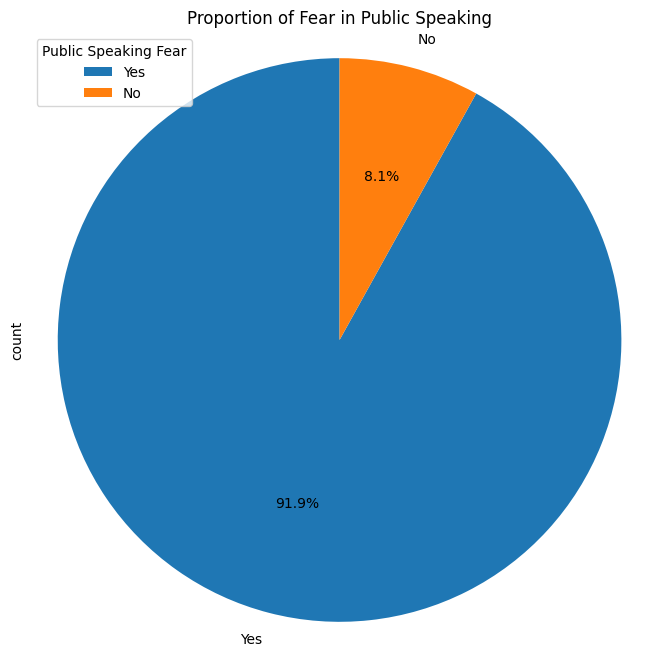

In [ ]:
# Get the value counts
fear_counts = Data['Ever experienced fear in public speaking?'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
fear_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fear in Public Speaking')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.legend(fear_counts.index, title="Public Speaking Fear", loc="upper left")
plt.show()

##About 92% of the respondents have experienced glossophobia before. This shows that the dataset is highly imbalanced

In [ ]:
Data['Negative experiences in public speaking?'].value_counts()

Negative experiences in public speaking?
Agree                63
Disagree             54
Neutral              46
Strongly Agree       25
Strongly Diasgree    23
Name: count, dtype: int64

In [ ]:
Data['Who do you live with?'].value_counts()

Who do you live with?
Biological Parents    177
I stay alone           18
Guardian               15
Sister                  1
Name: count, dtype: int64

### Most of the respondents (about 87%) live with their biological parents

In [ ]:
Data.columns

Index(['Year of Study', 'Faculty', 'Department', 'Age', 'Gender', 'Religion',
       'Tribe', 'Secondary School attended', 'Who do you live with?',
       'Parents' Marital Status', 'No. of children in family',
       'Position in family', 'Parent level of education',
       'Stayed with parents while growing up?',
       'Extracurricular/religious activity as a child', 'Which activity?',
       'Led these activities?', 'Voiced out opinioin as a child?',
       'Ever delivered a speech?', 'Public speaking involvement in coursework',
       'Confidence in public speaking ability',
       'Ever experienced fear in public speaking?',
       'Max no. of people spoken to', 'Ease in making friends',
       'Ever experienced low self-esteem?',
       'Medical issue related to anxiety?',
       'Negative experiences in public speaking?',
       'Unpreparedness/practice in public speaking?',
       'Concerned about being judged by peers?',
       'Worries about making mistakes in speeches?',
  

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 51 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Year of Study                                                   211 non-null    object
 1   Faculty                                                         211 non-null    object
 2   Department                                                      211 non-null    object
 3   Age                                                             211 non-null    object
 4   Gender                                                          211 non-null    object
 5   Religion                                                        211 non-null    object
 6   Tribe                                                           211 non-null    object
 7   Secondary School attended                                     

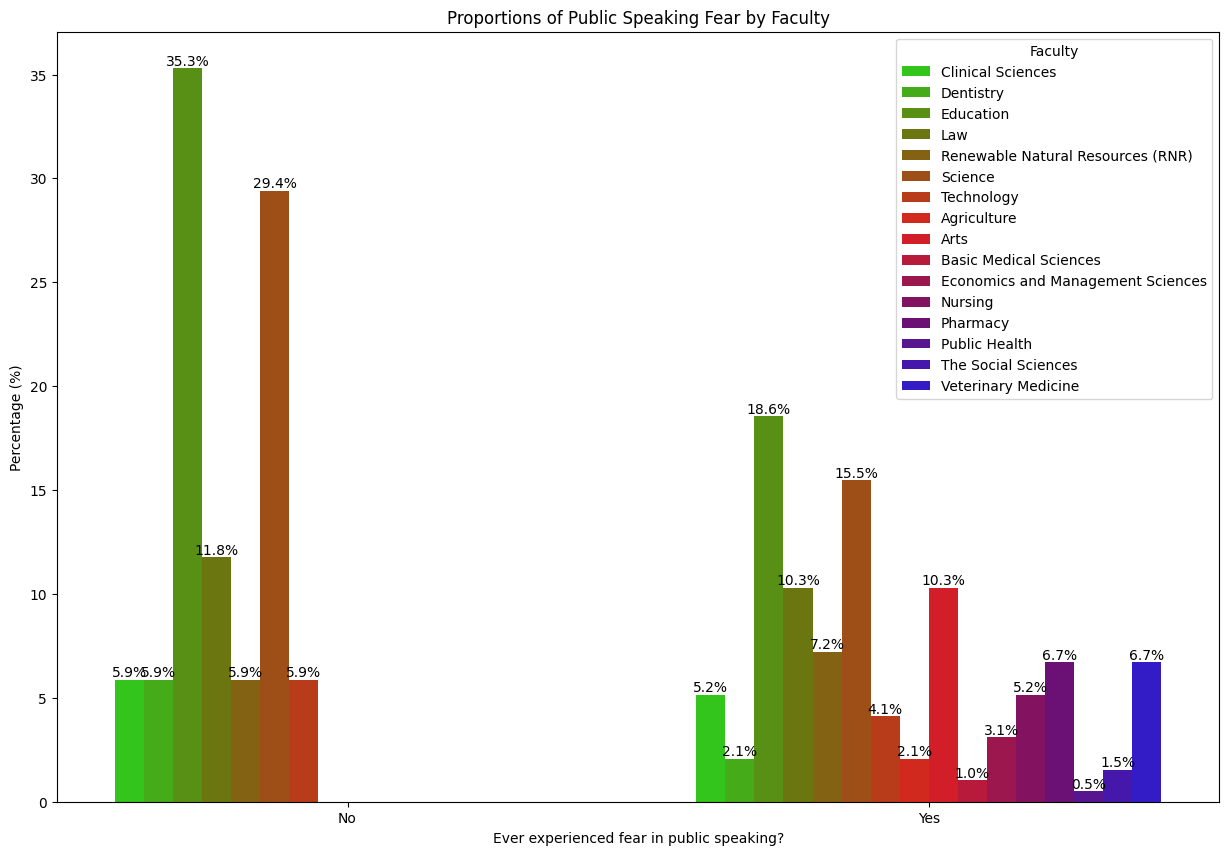

In [ ]:
# Group by "Ever experienced fear in public speaking?" and "Faculty"
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Faculty"])
   .size()
   .reset_index(name="Count")
)

# Calculate percentages
total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

# Plot the proportions
plt.figure(figsize=(15, 10))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Faculty",
   data=proportions,
   palette="brg_r",
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

# Add labels and title
plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Faculty")
plt.legend(title="Faculty", loc="upper right")
plt.show()

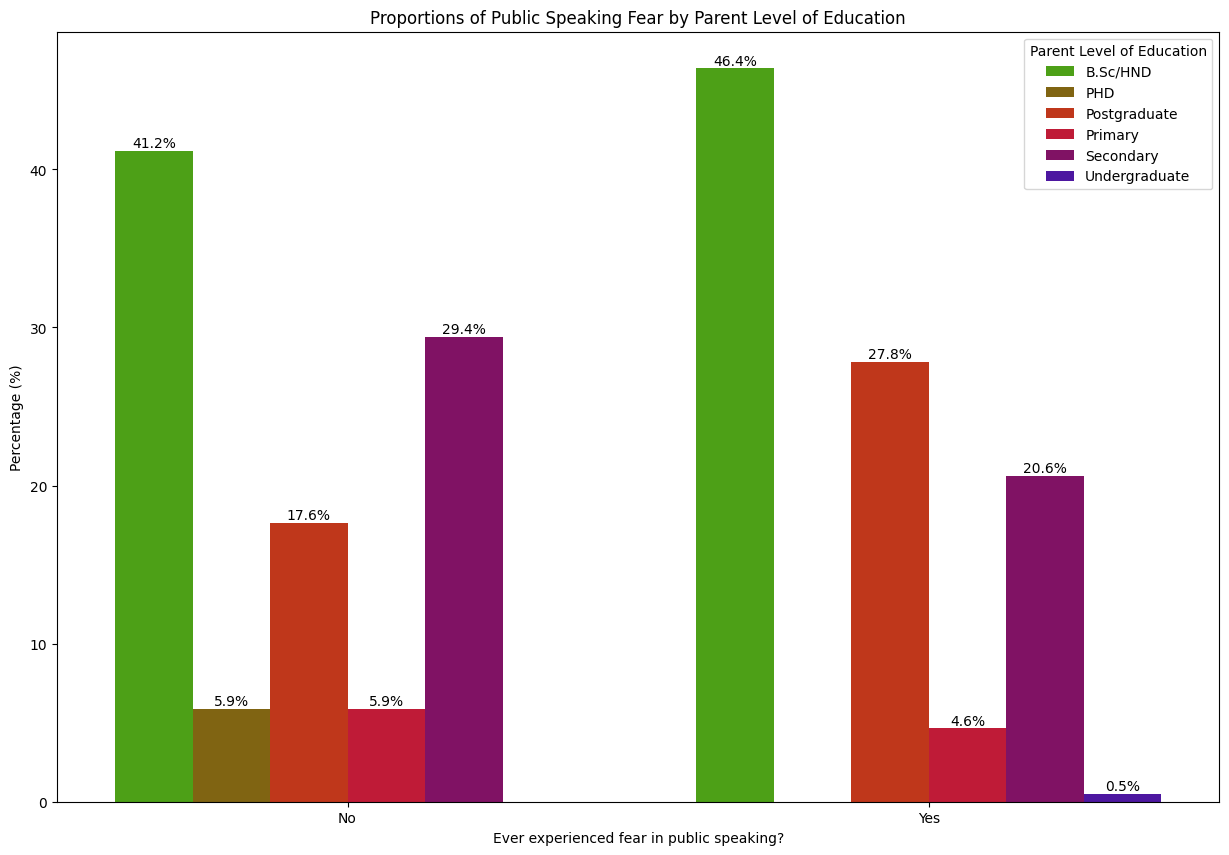

In [ ]:
# Group by "Ever experienced fear in public speaking?" and "Parent level of education"
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Parent level of education"])
   .size()
   .reset_index(name="Count")
)

# Calculate percentages
total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

# Plot the proportions
plt.figure(figsize=(15, 10))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Parent level of education",
   data=proportions,
   palette="brg_r",
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

# Add labels and title
plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Parent Level of Education")
plt.legend(title="Parent Level of Education", loc="upper right")
plt.show()

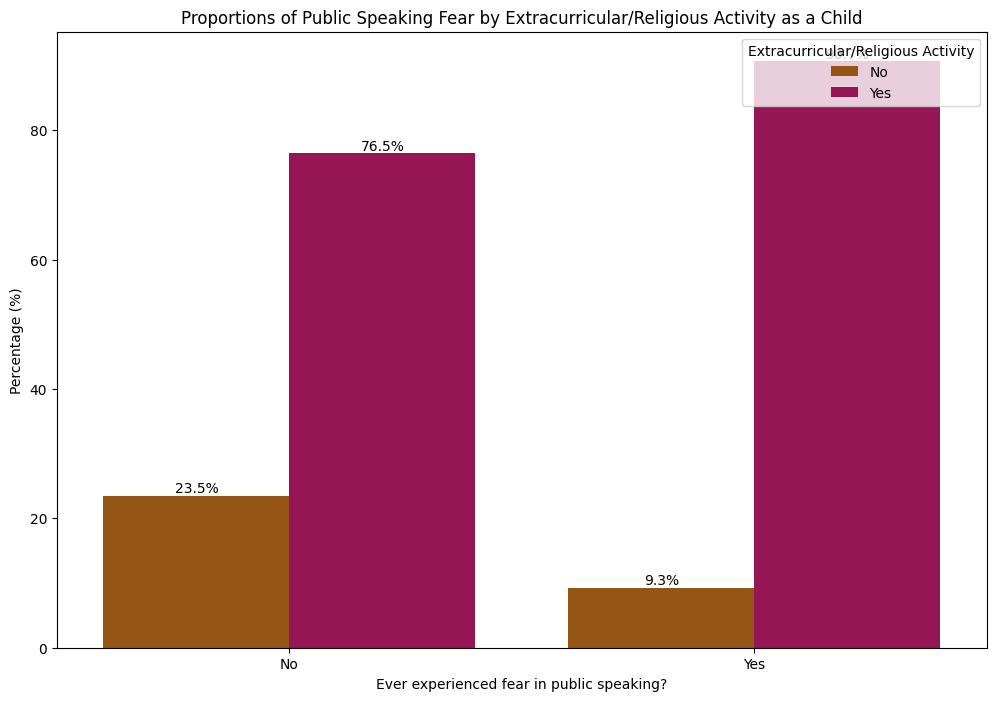

In [ ]:
# Group by "Ever experienced fear in public speaking?" and "Extracurricular/religious activity as a child"
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Extracurricular/religious activity as a child"])
   .size()
   .reset_index(name="Count")
)

# Calculate percentages
total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

# Plot the proportions
plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Extracurricular/religious activity as a child",
   data=proportions,
   palette="brg_r",
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

# Add labels and title
plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Extracurricular/Religious Activity as a Child")
plt.legend(title="Extracurricular/Religious Activity", loc="upper right")
plt.show()

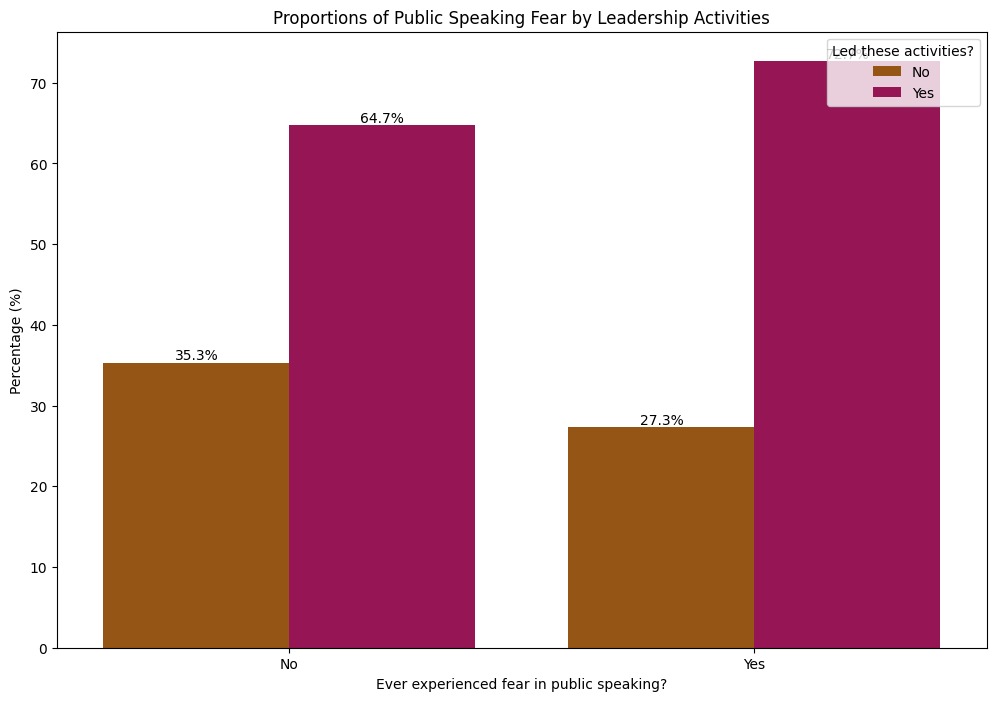

In [ ]:
# Group by "Ever experienced fear in public speaking?" and "Led these activities"
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Led these activities?"])
   .size()
   .reset_index(name="Count")
)

# Calculate percentages
total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

# Plot the proportions
plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Led these activities?",
   data=proportions,
   palette="brg_r",
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

# Add labels and title
plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Leadership Activities")
plt.legend(title="Led these activities?", loc="upper right")
plt.show()

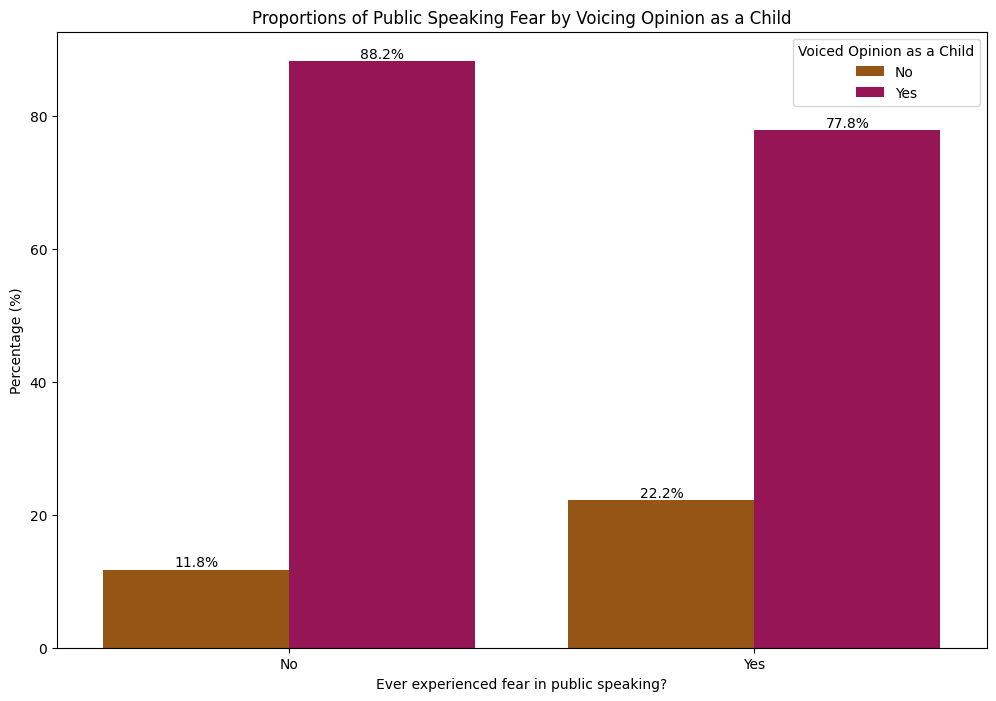

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Voiced out opinioin as a child?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Voiced out opinioin as a child?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Voicing Opinion as a Child")
plt.legend(title="Voiced Opinion as a Child", loc="upper right")
plt.show()



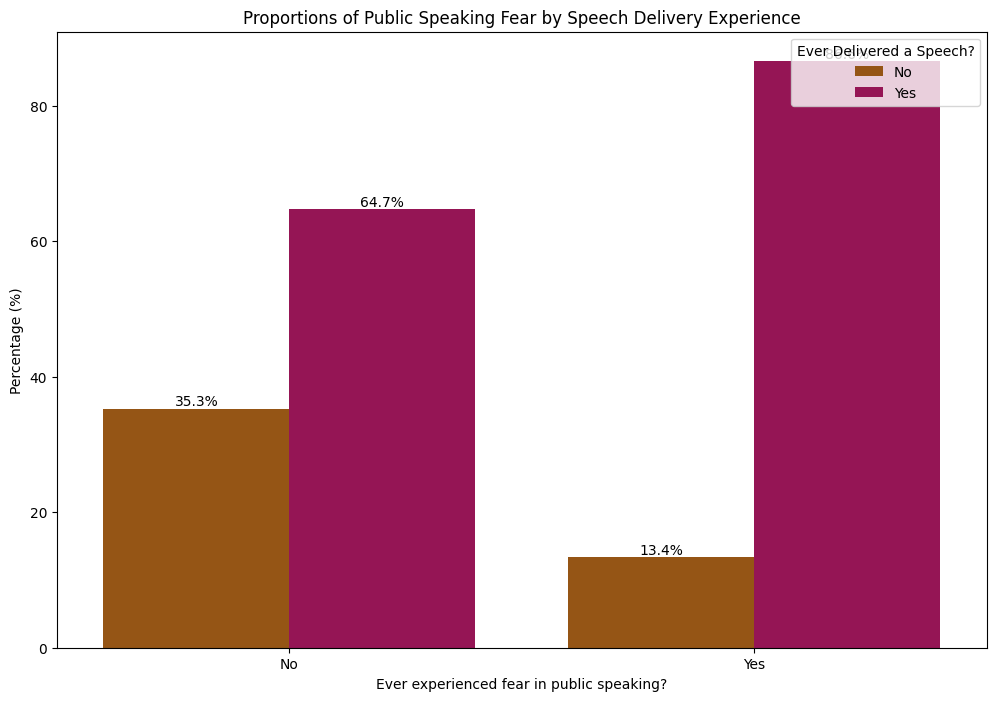

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Ever delivered a speech?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Ever delivered a speech?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Speech Delivery Experience")
plt.legend(title="Ever Delivered a Speech?", loc="upper right")
plt.show()


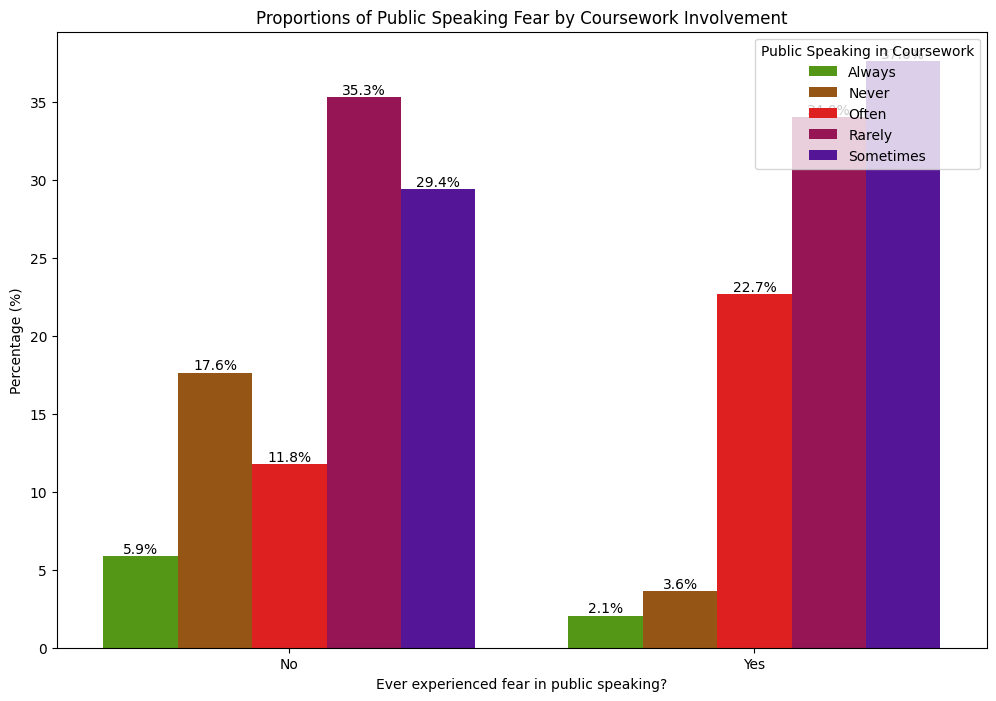

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Public speaking involvement in coursework"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Public speaking involvement in coursework",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Coursework Involvement")
plt.legend(title="Public Speaking in Coursework", loc="upper right")
plt.show()


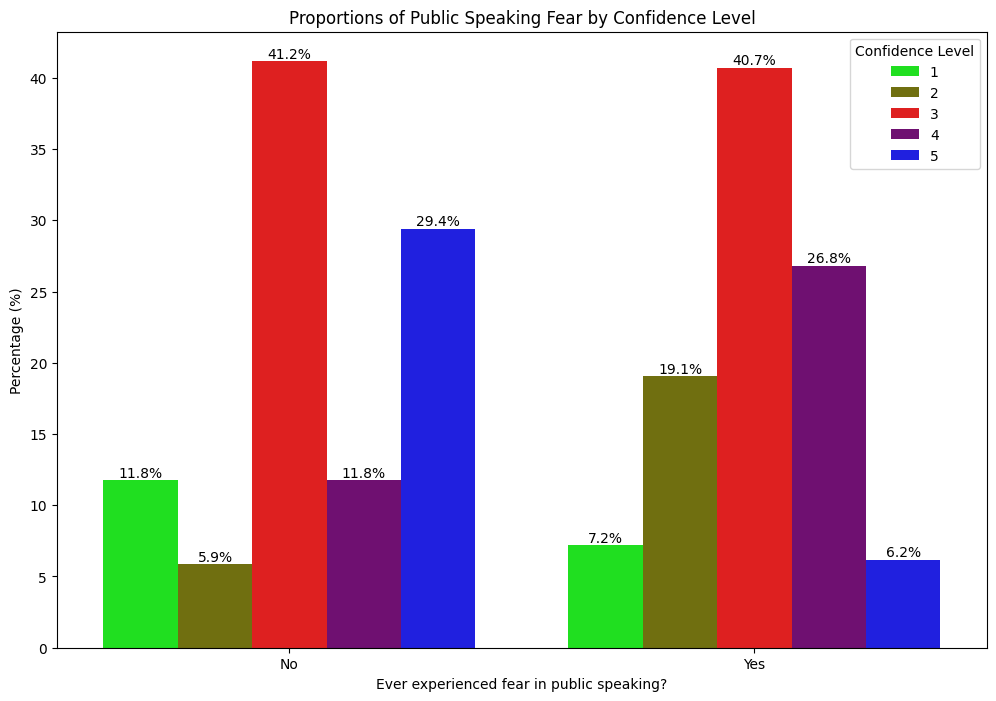

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Confidence in public speaking ability"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Confidence in public speaking ability",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Confidence Level")
plt.legend(title="Confidence Level", loc="upper right")
plt.show()


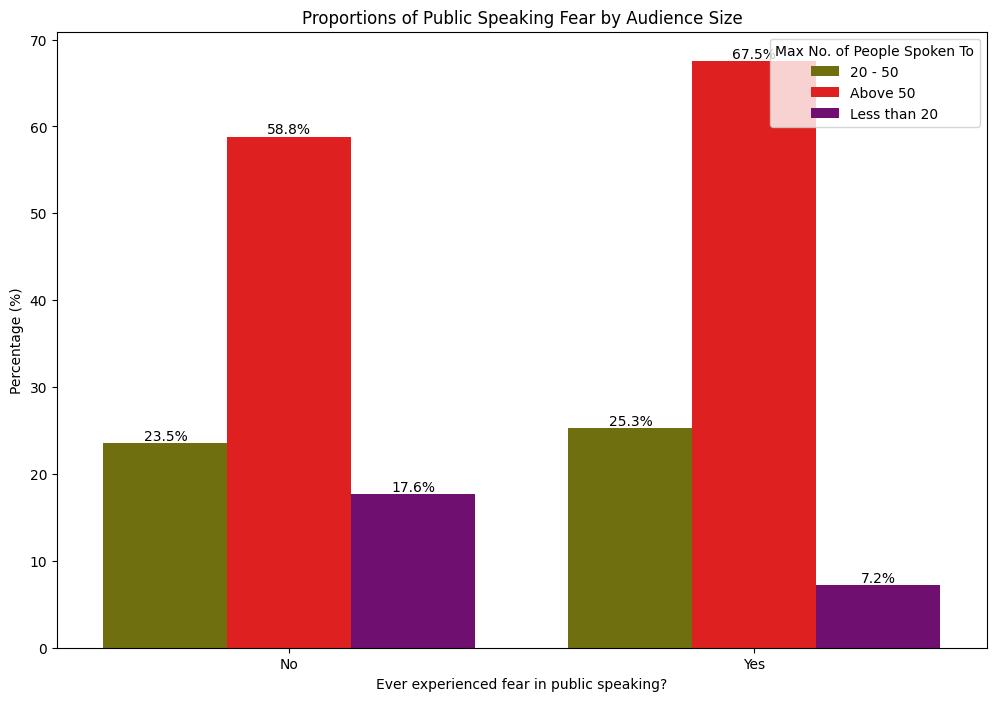

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Max no. of people spoken to"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Max no. of people spoken to",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Audience Size")
plt.legend(title="Max No. of People Spoken To", loc="upper right")
plt.show()


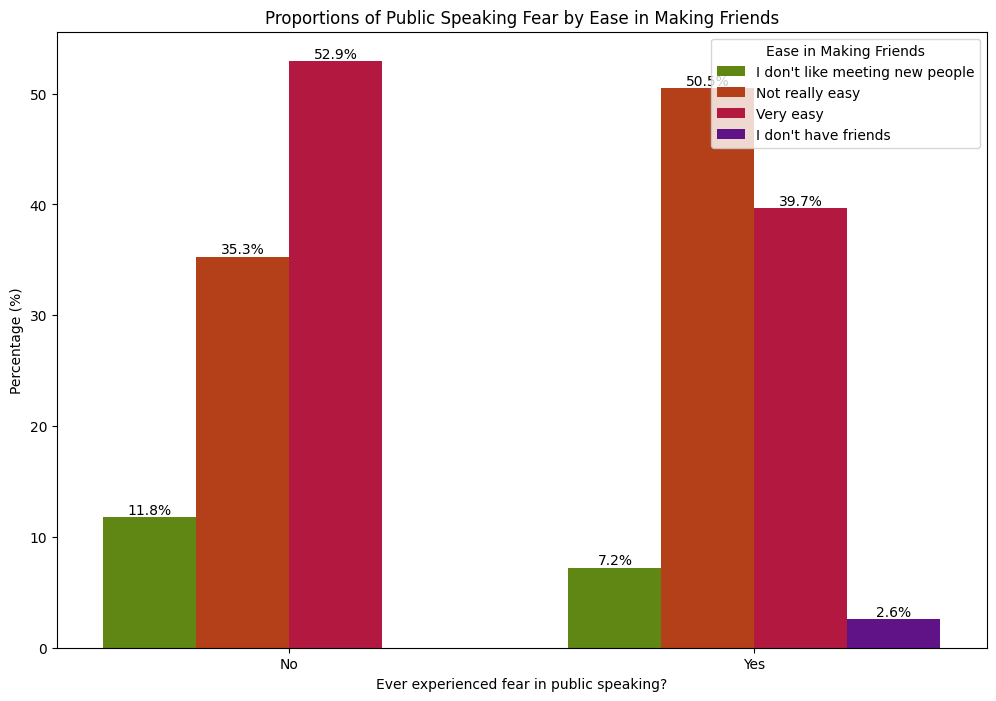

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Ease in making friends"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Ease in making friends",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Ease in Making Friends")
plt.legend(title="Ease in Making Friends", loc="upper right")
plt.show()


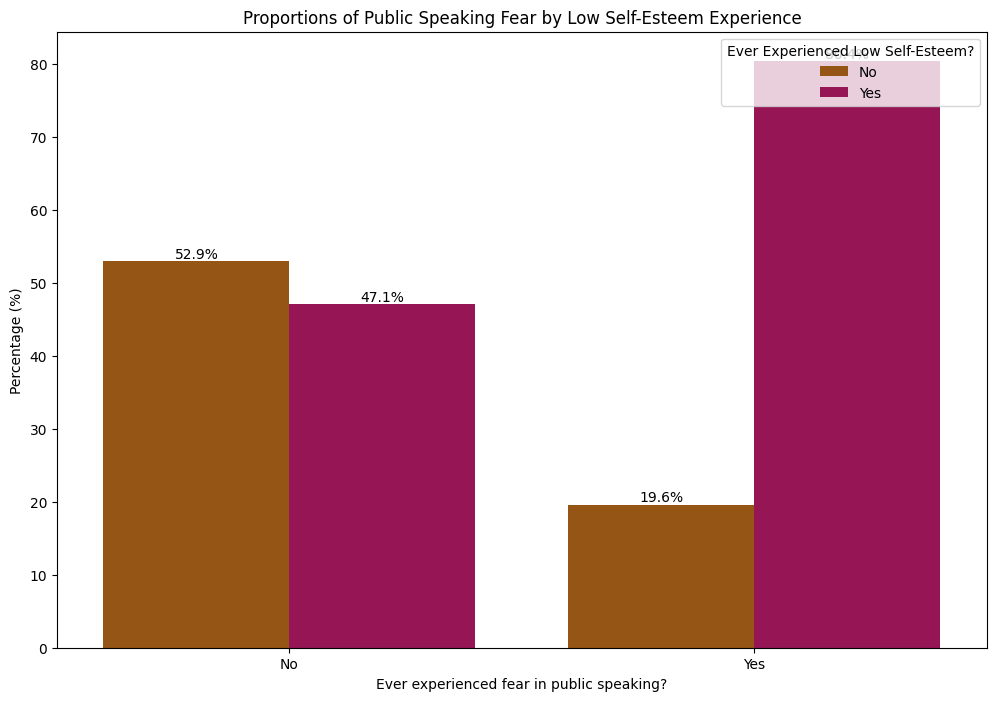

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Ever experienced low self-esteem?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Ever experienced low self-esteem?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Low Self-Esteem Experience")
plt.legend(title="Ever Experienced Low Self-Esteem?", loc="upper right")
plt.show()





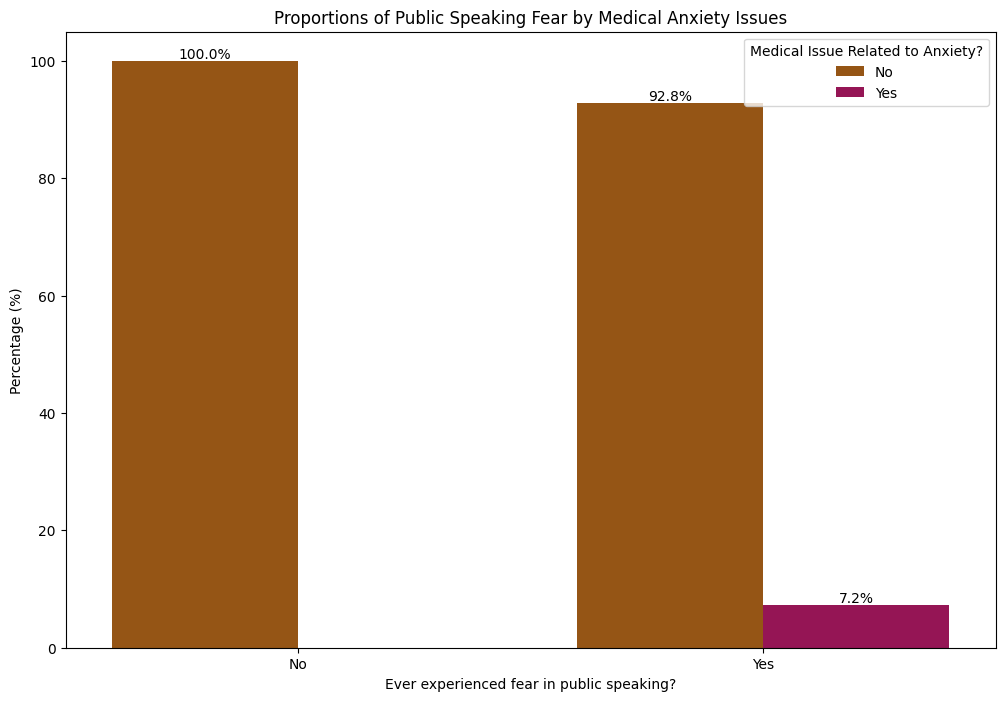

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Medical issue related to anxiety?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Medical issue related to anxiety?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Medical Anxiety Issues")
plt.legend(title="Medical Issue Related to Anxiety?", loc="upper right")
plt.show()


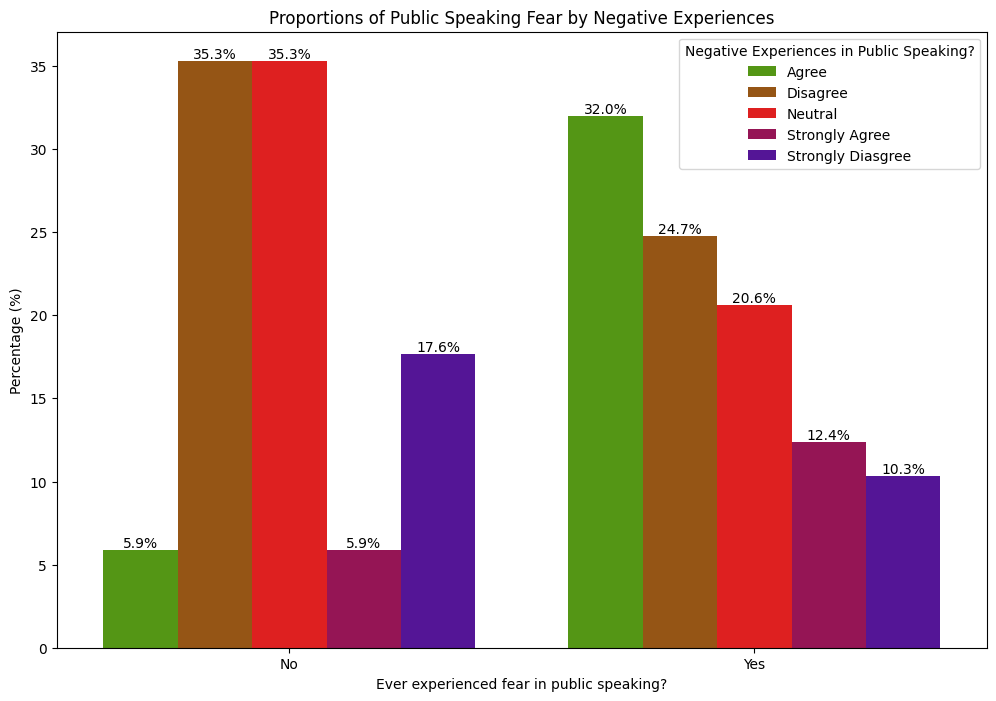

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Negative experiences in public speaking?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Negative experiences in public speaking?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Negative Experiences")
plt.legend(title="Negative Experiences in Public Speaking?", loc="upper right")
plt.show()


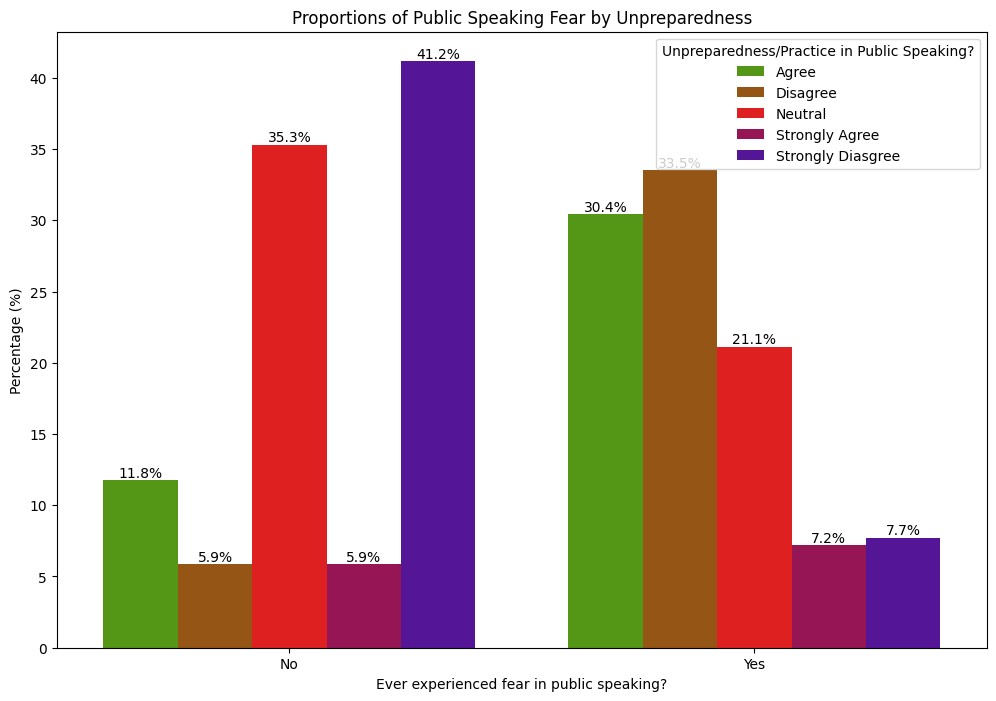

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Unpreparedness/practice in public speaking?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Unpreparedness/practice in public speaking?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Unpreparedness")
plt.legend(title="Unpreparedness/Practice in Public Speaking?", loc="upper right")
plt.show()


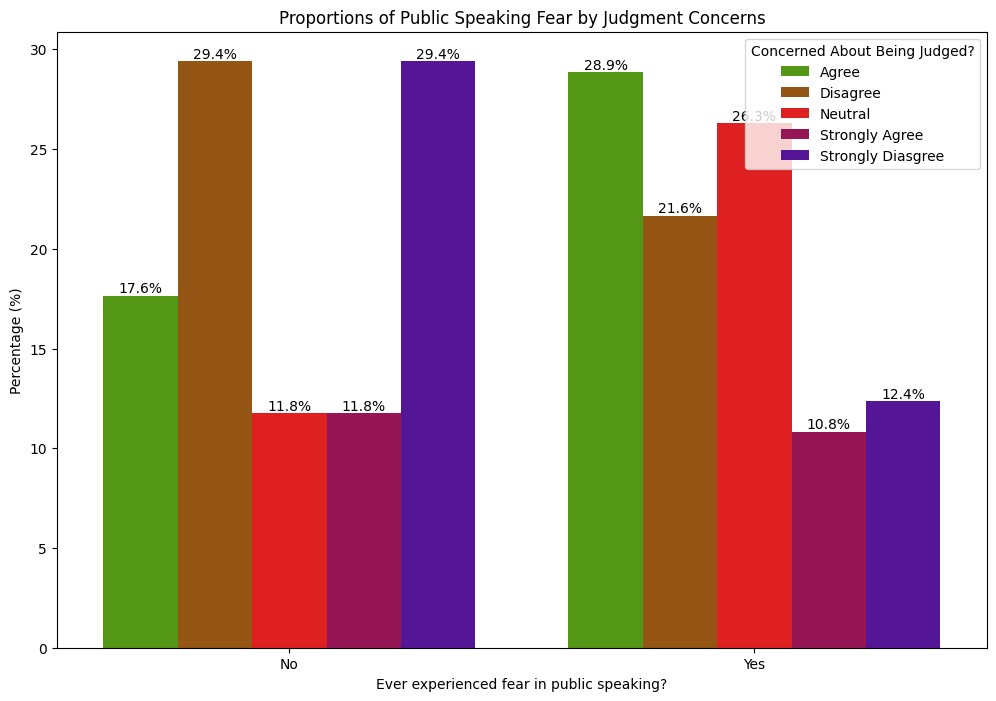

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Concerned about being judged by peers?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Concerned about being judged by peers?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Judgment Concerns")
plt.legend(title="Concerned About Being Judged?", loc="upper right")
plt.show()


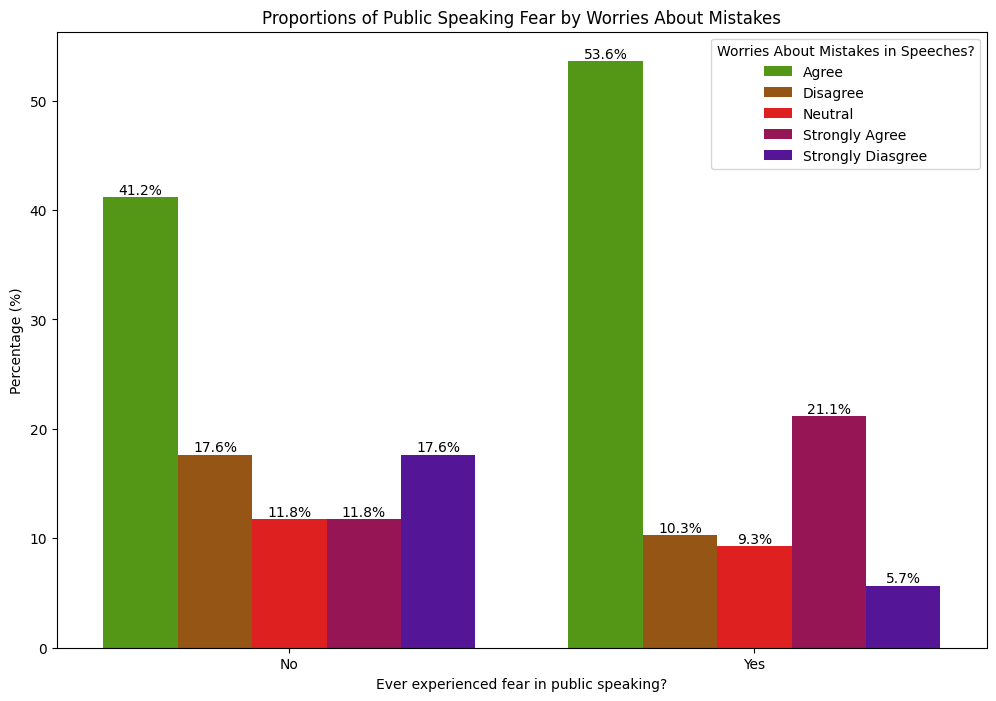

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Worries about making mistakes in speeches?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Worries about making mistakes in speeches?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Worries About Mistakes")
plt.legend(title="Worries About Mistakes in Speeches?", loc="upper right")
plt.show()


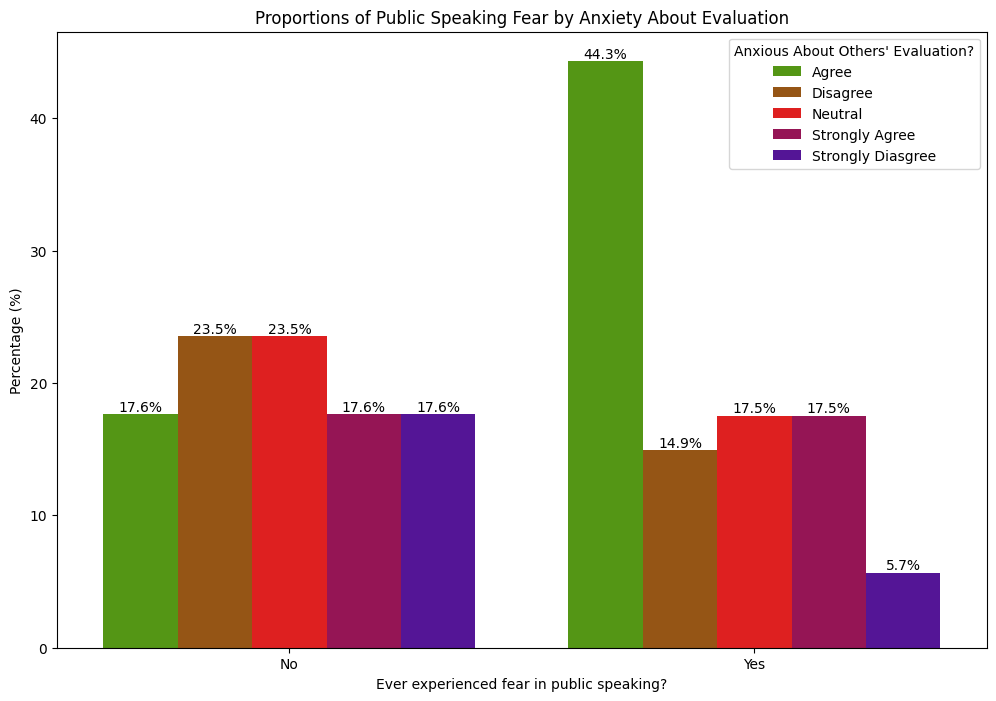

In [ ]:
proportions = (
   Data.groupby(["Ever experienced fear in public speaking?", "Anxious about others' evaluation?"])
   .size()
   .reset_index(name="Count")
)

total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
   x="Ever experienced fear in public speaking?",
   y="Percentage",
   hue="Anxious about others' evaluation?",
   data=proportions,
   palette="brg_r",
)

for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Anxiety About Evaluation")
plt.legend(title="Anxious About Others' Evaluation?", loc="upper right")
plt.show()



##Create Heatmap out of continuous variables

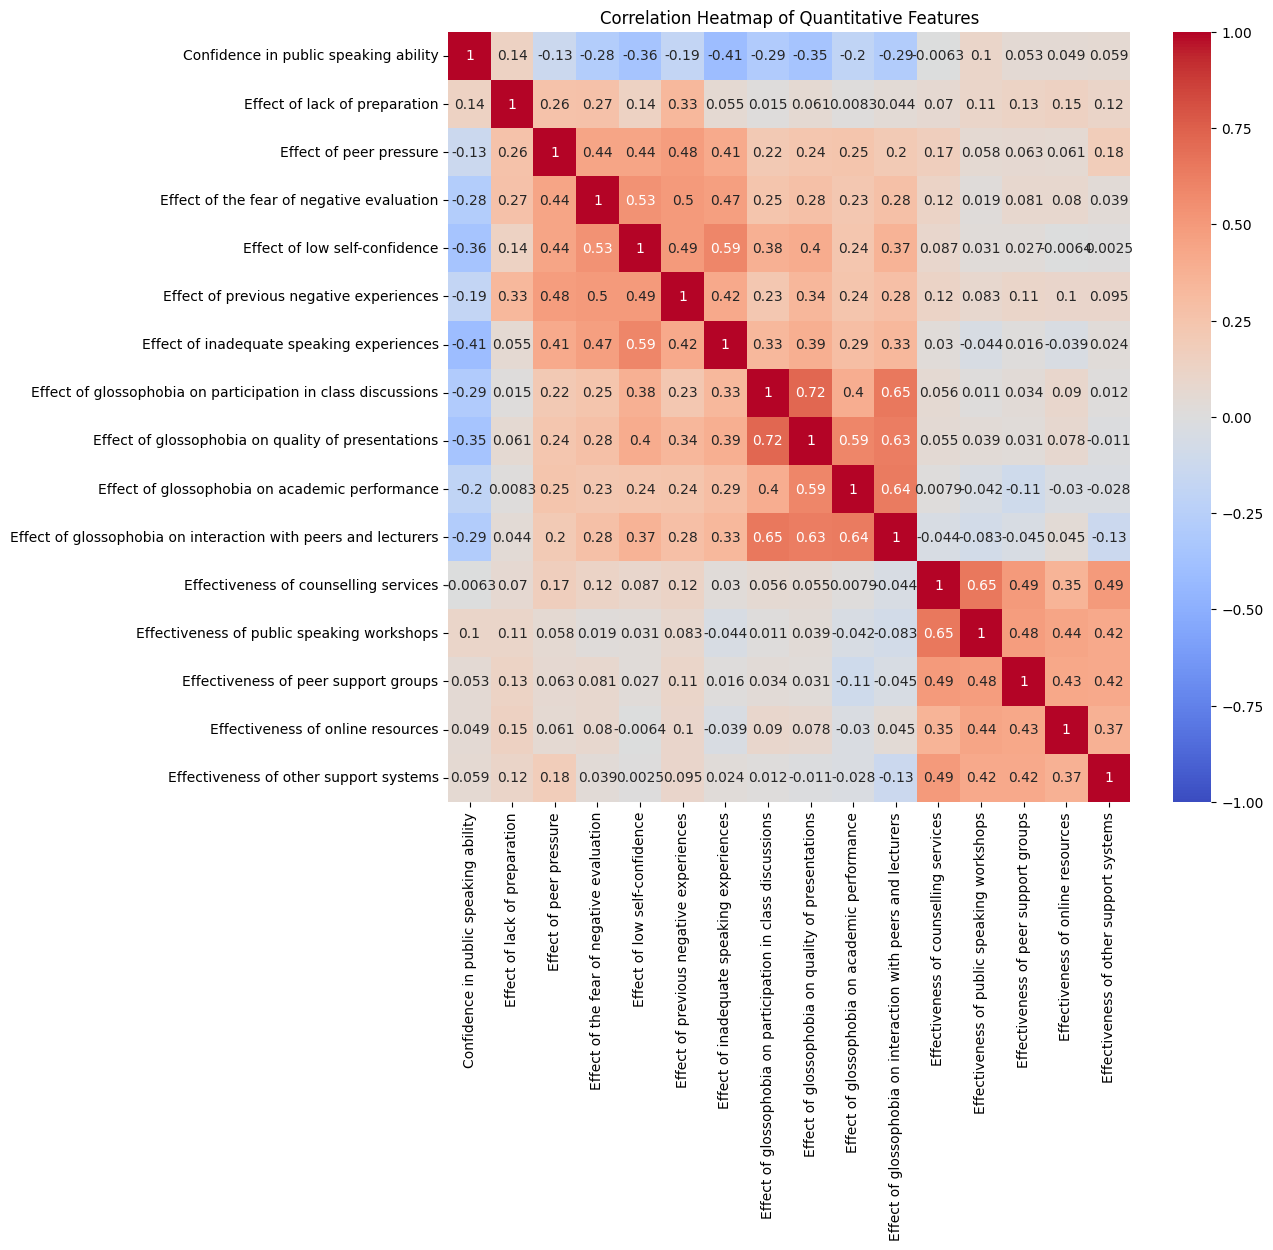

In [ ]:
# Select only the float columns
numeric_columns = Data.select_dtypes(include=['int64']).columns
numeric_data = Data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(11, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Quantitative Features')
plt.show()

###Interpretation of the Correlation Matrix (Heatmap)

Key Observations:

**STRONG POSITIVE CORRELATIONS:**

"Effect of low self-confidence" shows a strong positive correlation with:
1. "Effect of the fear of negative evaluation" (0.59).
2. "Effect of inadequate speaking experiences" (0.59).
**- These indicate that low self-confidence is closely linked to fear of negative evaluation and inadequate speaking experiences, which are likely contributors to glossophobia.**

"Effect of glossophobia on quality of presentations" is strongly correlated with "Effect of glossophobia on participation in class discussions" (0.72), suggesting a shared impact of glossophobia on multiple aspects of academic performance.

**STRONG NEGATIVE CORRELATIONS:**

"Confidence in public speaking ability" has strong negative correlations with:
1. "Effect of the fear of negative evaluation" (-0.36).
2. "Effect of low self-confidence" (-0.41).
- This emphasizes that a lack of confidence is inversely related to glossophobia-related fears and self-perception.
Moderate Relationships:



**"Effect of peer pressure" has moderate correlations with "Effect of the fear of negative evaluation" (0.44) and "Effect of low self-confidence" (0.44).
This suggests that peer pressure may indirectly affect glossophobia by exacerbating these factors.**


**Effectiveness of Support Systems:**

Variables like "Effectiveness of public speaking workshops" and "Effectiveness of peer support groups" seem to have weak correlations with the other features. This might indicate that while they are interventions, their effectiveness might not be directly tied to the primary causes of glossophobia but instead to its mitigation.

General Insights:
1. Factors such as low self-confidence, fear of negative evaluation, and inadequate speaking experiences seem to be central to glossophobia among university students.

2. Interventions like workshops and peer support groups may help but might need to target specific factors like confidence-building and overcoming fear of evaluation to be more impactful.

3. Variables related to academic performance and class participation highlight the broader academic implications of glossophobia.


## Aggregation with Groupby

In [ ]:
Year_of_Study_Group = Data.groupby('Year of Study')
Year_of_Study_Group.agg({'Confidence in public speaking ability' : ['max', 'mean', 'min'], 'Effect of lack of preparation' : ['max', 'mean', 'min'],
                   'Effect of peer pressure' : ['max', 'mean', 'min'], 'Effect of the fear of negative evaluation' : ['max', 'mean', 'min']})


Confidence in public speaking ability                \
                                                max      mean min   
Year of Study                                                       
Fifth Year                                        5  3.083333   1   
First Year                                        5  2.642857   1   
Fourth Year                                       5  3.396226   1   
Second Year                                       5  3.097561   1   
Sixth Year                                        4  3.666667   3   
Third Year                                        5  3.083333   1   

              Effect of lack of preparation                \
                                        max      mean min   
Year of Study                                               
Fifth Year                                5  4.083333   2   
First Year                                5  2.904762   1   
Fourth Year                               5  3.471698   1   
Second Year                               5  3.268293   1   
Sixth Year                                4  2.666667   1   
Third Year                                5  3.250000   1   

              Effect of peer pressure                \
                                  max      mean min   
Year of Study                                         
Fifth Year                          5  2.541667   1   
First Year                          5  2.214286   1   
Fourth Year                         5  2.716981   1   
Second Year                         5  2.682927   1   
Sixth Year                          3  2.333333   2   
Third Year                          5  2.729167   1   

              Effect of the fear of negative evaluation                
                                                    max      mean min  
Year of Study                                                          
Fifth Year                                            5  3.083333   1  
First Year                                            5  3.309524   1  
Fourth Year                                           5  3.264151   1  
Second Year                                           5  3.121951   1  
Sixth Year                                            5  3.333333   2  
Third Year                                            5  3.187500   1

In [ ]:
Year_of_Study_Group.agg({'Effect of low self-confidence' : ['max', 'mean', 'min'], 'Effect of previous negative experiences' : ['max', 'mean', 'min'],
                   'Effect of inadequate speaking experiences' : ['max', 'mean', 'min'], 'Effect of glossophobia on participation in class discussions' : ['max', 'mean', 'min']})

Effect of low self-confidence                \
                                        max      mean min   
Year of Study                                               
Fifth Year                                5  2.666667   1   
First Year                                5  2.928571   1   
Fourth Year                               5  2.773585   1   
Second Year                               5  2.731707   1   
Sixth Year                                3  2.333333   2   
Third Year                                5  2.875000   1   

              Effect of previous negative experiences                \
                                                  max      mean min   
Year of Study                                                         
Fifth Year                                          5  2.833333   1   
First Year                                          5  2.476190   1   
Fourth Year                                         5  2.811321   1   
Second Year                                         5  2.560976   1   
Sixth Year                                          3  2.333333   2   
Third Year                                          5  2.625000   1   

              Effect of inadequate speaking experiences                \
                                                    max      mean min   
Year of Study                                                           
Fifth Year                                            5  2.583333   1   
First Year                                            5  2.738095   1   
Fourth Year                                           5  2.754717   1   
Second Year                                           5  3.073171   1   
Sixth Year                                            4  3.666667   3   
Third Year                                            5  2.958333   1   

              Effect of glossophobia on participation in class discussions  \
                                                                       max   
Year of Study                                                                
Fifth Year                                                     5             
First Year                                                     5             
Fourth Year                                                    5             
Second Year                                                    5             
Sixth Year                                                     2             
Third Year                                                     5             

                             
                   mean min  
Year of Study                
Fifth Year     2.041667   1  
First Year     2.619048   1  
Fourth Year    2.358491   1  
Second Year    2.731707   1  
Sixth Year     2.000000   2  
Third Year     2.645833   1

In [ ]:
Year_of_Study_Group.agg({'Effect of glossophobia on quality of presentations' : ['max', 'mean', 'min'], 'Effect of glossophobia on academic performance' : ['max', 'mean', 'min'],
                   'Effect of glossophobia on interaction with peers and lecturers' : ['max', 'mean', 'min'], 'Effectiveness of counselling services' : ['max', 'mean', 'min']})

Effect of glossophobia on quality of presentations            \
                                                             max      mean   
Year of Study                                                                
Fifth Year                                                     5  2.333333   
First Year                                                     5  2.523810   
Fourth Year                                                    5  2.415094   
Second Year                                                    5  2.512195   
Sixth Year                                                     3  2.666667   
Third Year                                                     5  2.583333   

                  Effect of glossophobia on academic performance            \
              min                                            max      mean   
Year of Study                                                                
Fifth Year      1                                              5  1.833333   
First Year      1                                              4  1.761905   
Fourth Year     1                                              5  2.056604   
Second Year     1                                              5  1.853659   
Sixth Year      2                                              2  1.666667   
Third Year      1                                              5  2.062500   

                   \
              min   
Year of Study       
Fifth Year      1   
First Year      1   
Fourth Year     1   
Second Year     1   
Sixth Year      1   
Third Year      1   

              Effect of glossophobia on interaction with peers and lecturers  \
                                                                         max   
Year of Study                                                                  
Fifth Year                                                     5               
First Year                                                     5               
Fourth Year                                                    5               
Second Year                                                    5               
Sixth Year                                                     3               
Third Year                                                     5               

                            Effectiveness of counselling services            \
                   mean min                                   max      mean   
Year of Study                                                                 
Fifth Year     2.333333   1                                     5  3.208333   
First Year     2.500000   1                                     5  3.000000   
Fourth Year    2.320755   1                                     5  2.754717   
Second Year    2.487805   1                                     5  2.463415   
Sixth Year     2.333333   1                                     2  1.333333   
Third Year     2.687500   1                                     5  2.708333   

                   
              min  
Year of Study      
Fifth Year      1  
First Year      1  
Fourth Year     1  
Second Year     1  
Sixth Year      1  
Third Year      1

In [ ]:
Year_of_Study_Group.agg({'Effectiveness of public speaking workshops' : ['max', 'mean', 'min'], 'Effectiveness of peer support groups' : ['max', 'mean', 'min'],
                   'Effectiveness of online resources' : ['max', 'mean', 'min'], 'Effectiveness of other support systems' : ['max', 'mean', 'min']})

Effectiveness of public speaking workshops                \
                                                     max      mean min   
Year of Study                                                            
Fifth Year                                             5  3.583333   1   
First Year                                             5  3.023810   1   
Fourth Year                                            5  3.320755   1   
Second Year                                            5  2.731707   1   
Sixth Year                                             4  3.000000   1   
Third Year                                             5  3.375000   1   

              Effectiveness of peer support groups                \
                                               max      mean min   
Year of Study                                                      
Fifth Year                                       5  4.041667   1   
First Year                                       5  3.476190   1   
Fourth Year                                      5  3.339623   1   
Second Year                                      5  3.024390   1   
Sixth Year                                       4  3.000000   2   
Third Year                                       5  3.375000   1   

              Effectiveness of online resources                \
                                            max      mean min   
Year of Study                                                   
Fifth Year                                    5  3.708333   1   
First Year                                    5  3.690476   1   
Fourth Year                                   5  3.358491   1   
Second Year                                   5  3.365854   1   
Sixth Year                                    5  4.333333   4   
Third Year                                    5  3.625000   1   

              Effectiveness of other support systems                
                                                 max      mean min  
Year of Study                                                       
Fifth Year                                         5  3.000000   1  
First Year                                         5  2.595238   1  
Fourth Year                                        5  2.811321   1  
Second Year                                        5  2.439024   1  
Sixth Year                                         3  2.000000   1  
Third Year                                         5  2.750000   1

# Drop some rows and columns

In [ ]:
# Drop rows where 'Year of Study' is 'Sixth Year'
Data = Data[Data['Year of Study'] != 'Sixth Year']

In [ ]:
# Drop rows where 'Who do you live with?' is 'Sister'
Data = Data[Data['Who do you live with?'] != 'Sister']

In [ ]:
# Replace 'Government' with 'Public' in the 'Secondary School attended' column
Data['Secondary School attended'] = Data['Secondary School attended'].replace('Government', 'Public')

In [ ]:
# Reclassify 'Parent level of education' column
Data['Parent level of education'] = Data['Parent level of education'].apply(
   lambda x: x if x in ['Primary', 'Secondary'] else 'Tertiary'
)

In [ ]:
# Remove rows where "Ever experienced fear in public speaking?" is "Maybe"
Data_filtered = Data[Data["Ever experienced fear in public speaking?"] != "Maybe"]


#Some Key Visualizations

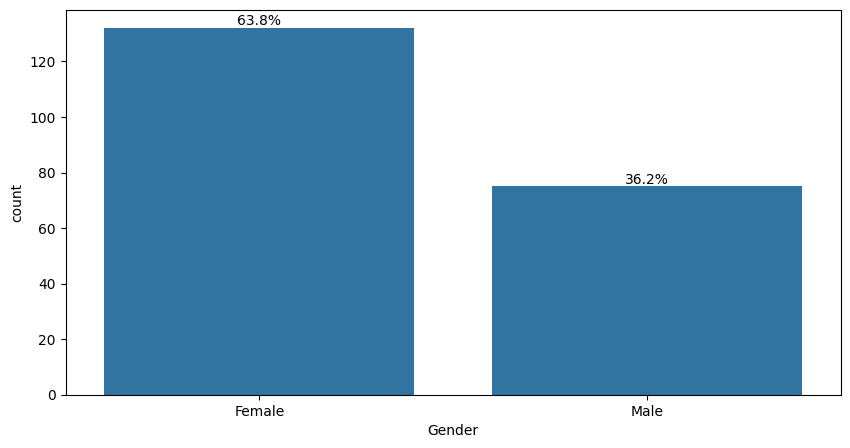

In [ ]:
plt.figure(figsize=(10, 5))

# Calculate percentages
total = len(Data)
percentages = (Data['Gender'].value_counts() / total) * 100

# Create the plot
ax = sns.countplot(x="Gender", data=Data)

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
   percentage = percentages[i]
   ax.annotate(f'{percentage:.1f}%',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha='center', va='bottom')

plt.show()

###Interpretation: There were more female respondents in the questionnaire, which could be a pointer that there are more females interested in anything public speaking than males

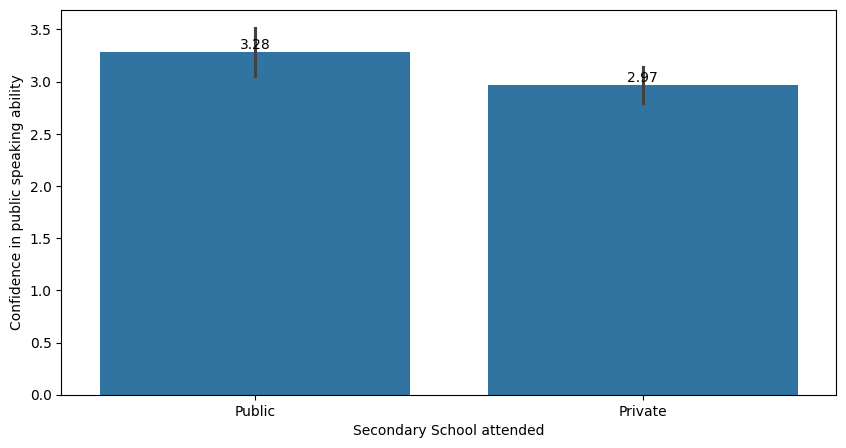

In [ ]:
plt.figure(figsize=(10,5))

# Create the barplot
ax = sns.barplot(x="Secondary School attended", y="Confidence in public speaking ability", data=Data)

# Add value labels on top of each bar
for i in ax.containers:
   ax.bar_label(i, fmt='%.2f')

plt.show()

### The plot above indicates that Glossophobia is likely to be more common in students that attended private schools than those who attended public or government schools

## Heuristics: If school = public (low); if school = private (medium)

## Columns: Secondary School attended, Confidence in public speaking ability

#GENERAL WEIGHT: 4 over 5

In [ ]:
School_count = pd.DataFrame(Data["Secondary School attended"].value_counts())

School_count

count
Secondary School attended       
Private                      133
Public                        74

##The dataset is quite imbalanced, so, I am thinking of using the proportions of the categories of secondary schools attended (Government, Private, Public) to plot the charts instead of using their actual population (which might make our plots very skewed), let's say an expression in percentage.

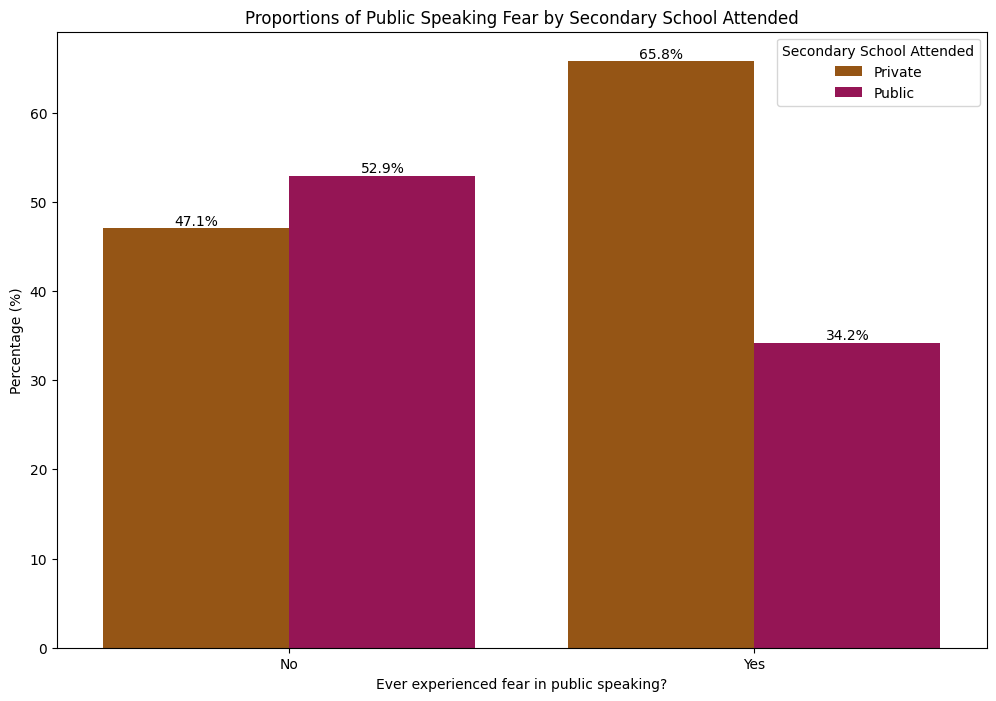

In [ ]:
# Group by "Ever experienced fear in public speaking?" and "Secondary School attended"
proportions = (
    Data.groupby(["Ever experienced fear in public speaking?", "Secondary School attended"])
    .size()
    .reset_index(name="Count")
)

# Calculate percentages
total_counts = proportions.groupby("Ever experienced fear in public speaking?")["Count"].transform("sum")
proportions["Percentage"] = (proportions["Count"] / total_counts) * 100

# Plot the proportions
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x="Ever experienced fear in public speaking?",
    y="Percentage",
    hue="Secondary School attended",
    data=proportions,
    palette="brg_r",
)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Add labels and title
plt.ylabel("Percentage (%)")
plt.xlabel("Ever experienced fear in public speaking?")
plt.title("Proportions of Public Speaking Fear by Secondary School Attended")
plt.legend(title="Secondary School Attended", loc="upper right")
plt.show()

##About 66% of tbose that have experienced glossophobia attended private schools, while just about 34% attended public schools, meaning that there is a higher chance of glossophobia occuring for those who attended private schools

## Heuristics:  "Ever experienced fear in public speaking?", "Secondary School attended" - (Yes: high, No: low)

## Columns: "Ever experienced fear in public speaking?", "Secondary School attended"

#GENERAL WEIGHT: 4 over 5

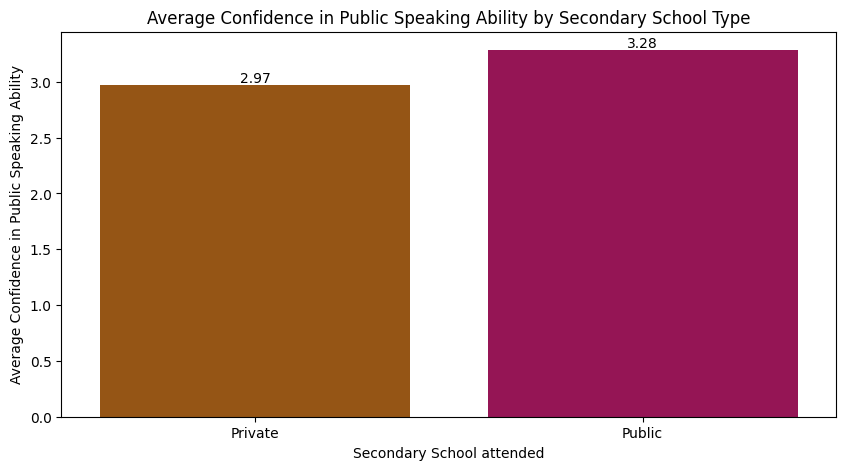

In [ ]:
# Calculate mean confidence level by secondary school type
grouped_data = Data.groupby("Secondary School attended")["Confidence in public speaking ability"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
   x="Secondary School attended",
   y="Confidence in public speaking ability",
   data=grouped_data,
   palette="brg_r"
)

# Add value labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.2f')

plt.ylabel("Average Confidence in Public Speaking Ability")
plt.title("Average Confidence in Public Speaking Ability by Secondary School Type")
plt.show()

##On the average, those that attended public schools are more confident in public speaking than those that attended private schools

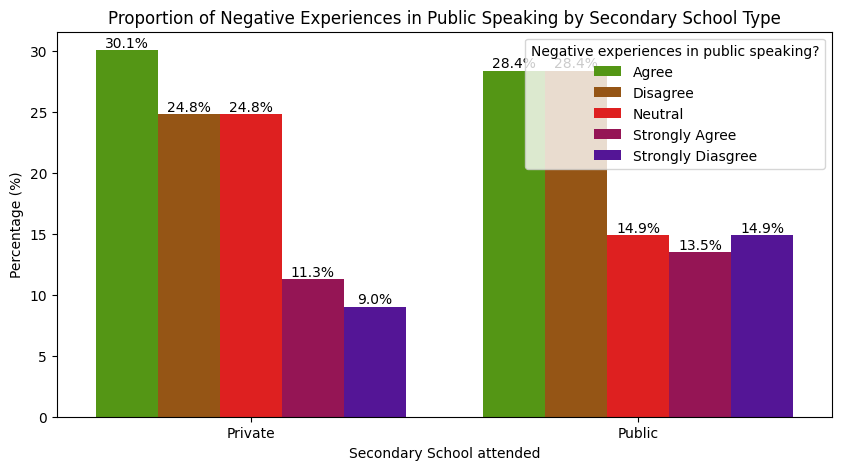

In [ ]:
# Calculate proportions and convert to percentages
proportion_data = (Data.groupby("Secondary School attended")["Negative experiences in public speaking?"]
                 .value_counts(normalize=True)
                 .multiply(100)  # Convert to percentage
                 .rename("Proportion")
                 .reset_index())

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
   x="Secondary School attended",
   y="Proportion",
   hue="Negative experiences in public speaking?",
   data=proportion_data,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportion of Negative Experiences in Public Speaking by Secondary School Type")
plt.show()

## There is a higher proportion of private school students with negative experiences in public speaking (30.1%) than their counterparts in public schools (28.4%)

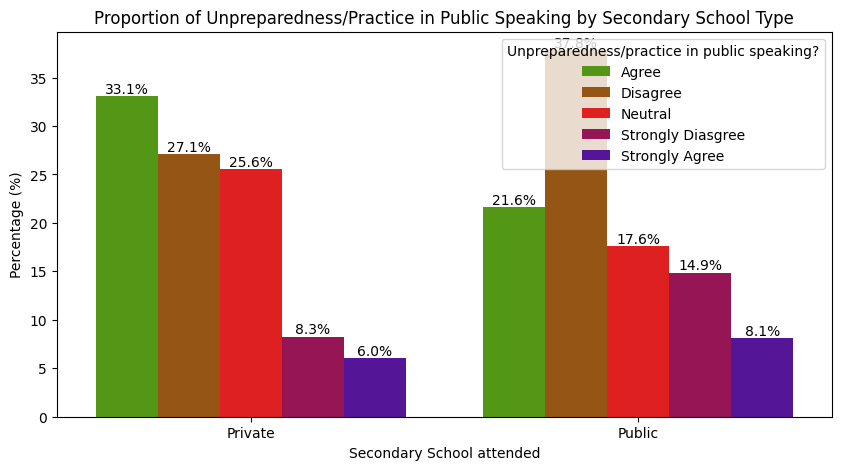

In [ ]:
# Calculate proportions and convert to percentages
proportion_data = (Data.groupby("Secondary School attended")["Unpreparedness/practice in public speaking?"]
                 .value_counts(normalize=True)
                 .multiply(100)  # Convert to percentage
                 .rename("Proportion")
                 .reset_index())

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
   x="Secondary School attended",
   y="Proportion",
   hue="Unpreparedness/practice in public speaking?",
   data=proportion_data,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportion of Unpreparedness/Practice in Public Speaking by Secondary School Type")
plt.show()

##About 46% of public school attendees need less preparation for public speaking while just about 27% of private school attendees need less preparation for public speaking

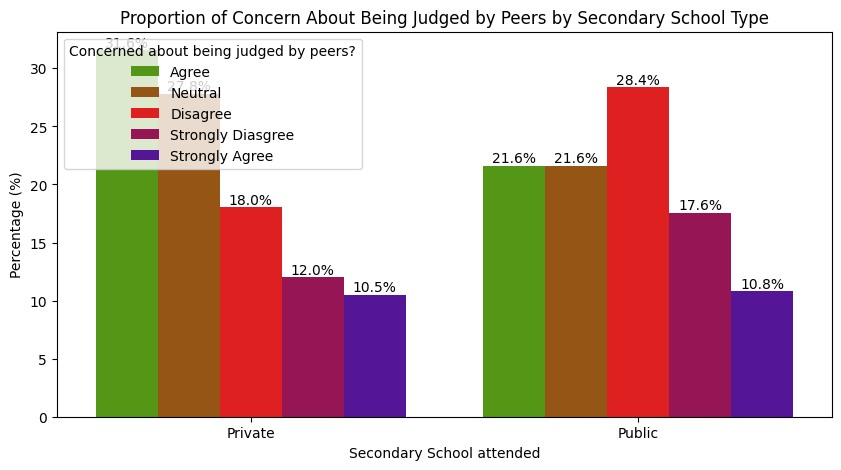

In [ ]:
# Calculate proportions and convert to percentages
proportion_data = (Data.groupby("Secondary School attended")["Concerned about being judged by peers?"]
                 .value_counts(normalize=True)
                 .multiply(100)  # Convert to percentage
                 .rename("Proportion")
                 .reset_index())

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
   x="Secondary School attended",
   y="Proportion",
   hue="Concerned about being judged by peers?",
   data=proportion_data,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportion of Concern About Being Judged by Peers by Secondary School Type")
plt.show()

##There are more private school attendees (about 42%) that agree to have the fear of being judged in public speaking compared to their public school counterparts (about 32%)

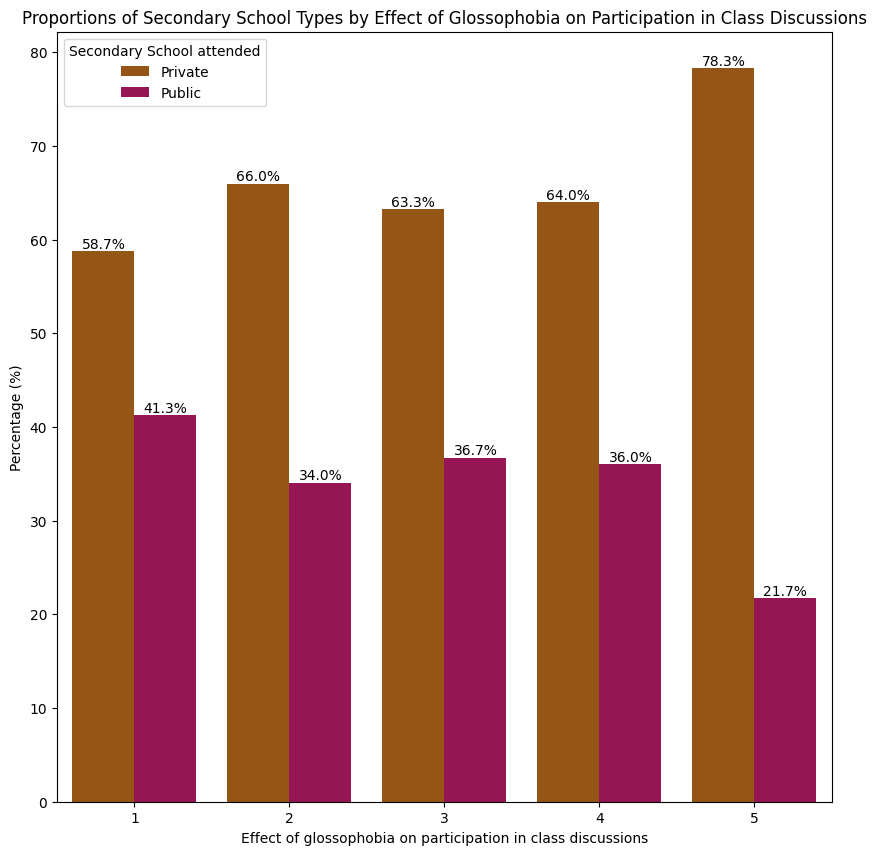

In [ ]:
# Calculate proportions for "Effect of glossophobia on participation in class discussions"
grouped_data_glossophobia_participation = Data.groupby(["Effect of glossophobia on participation in class discussions", "Secondary School attended"]).size().reset_index(name="Count")
total_counts_glossophobia_participation = grouped_data_glossophobia_participation.groupby("Effect of glossophobia on participation in class discussions")["Count"].transform("sum")
grouped_data_glossophobia_participation["Percentage"] = (grouped_data_glossophobia_participation["Count"] / total_counts_glossophobia_participation) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
   x="Effect of glossophobia on participation in class discussions",
   y="Percentage",
   hue="Secondary School attended",
   data=grouped_data_glossophobia_participation,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Secondary School Types by Effect of Glossophobia on Participation in Class Discussions")
plt.show()

##Those respondents who have the highest negative effect (with a score of 5/5) of glossophobia in their classwork are private school attendees

## Heuristics: "Effect of glossophobia on participation in class discussions" - Private (3, 4, 5 - assign  weights in ascending order: high), Public (3, 4, 5 - assign weights in ascending order: medium or low)

##Columns: "Effect of glossophobia on participation in class discussions", "Secondary School attended"

#GENERAL WEIGHT: 3.5

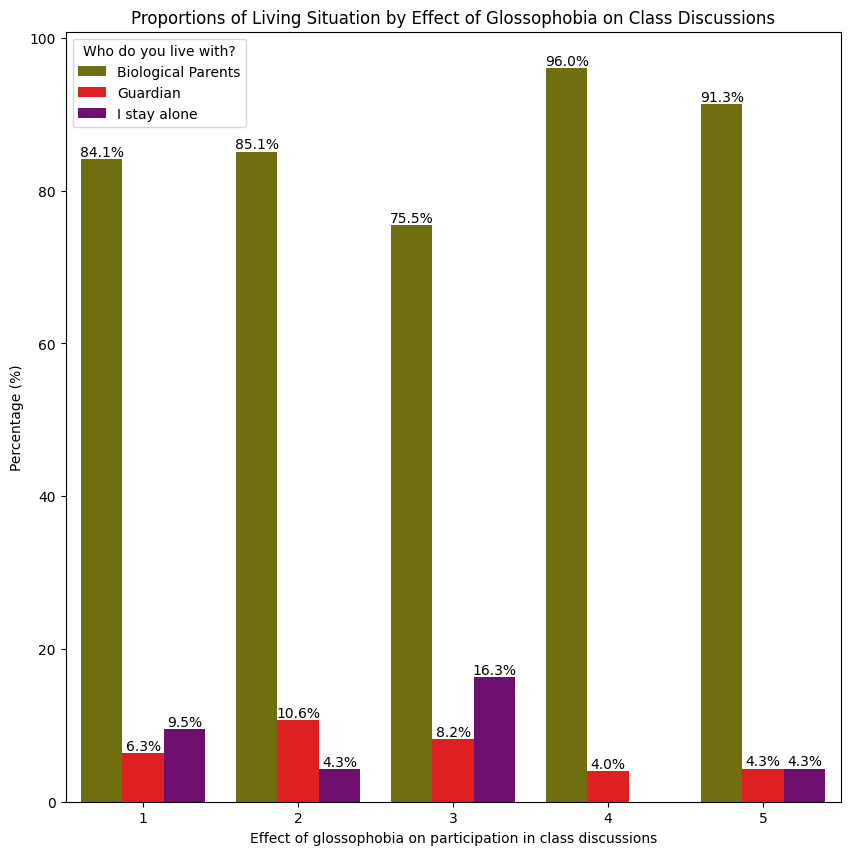

In [ ]:
# Calculate proportions for "Effect of glossophobia on participation in class discussions" by "Who do you live with?"
grouped_data_live_with_class_discussions = Data.groupby(["Effect of glossophobia on participation in class discussions", "Who do you live with?"]).size().reset_index(name="Count")
total_counts_live_with_class_discussions = grouped_data_live_with_class_discussions.groupby("Effect of glossophobia on participation in class discussions")["Count"].transform("sum")
grouped_data_live_with_class_discussions["Percentage"] = (grouped_data_live_with_class_discussions["Count"] / total_counts_live_with_class_discussions) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
   x="Effect of glossophobia on participation in class discussions",
   y="Percentage",
   hue="Who do you live with?",
   data=grouped_data_live_with_class_discussions,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Living Situation by Effect of Glossophobia on Class Discussions")
plt.show()

##Respondents who have the highest negative effects of glossophobia in their class discussions (4/5 and 5/5) live with their parents, though most of the respondents do live with their parents

## Heuristics: "Who do you live with?" - Guardian (Low) - >>HIGH WEIGHT

## Columns: "Who do you live with?"

#GENERAL WEIGHT: 4.5

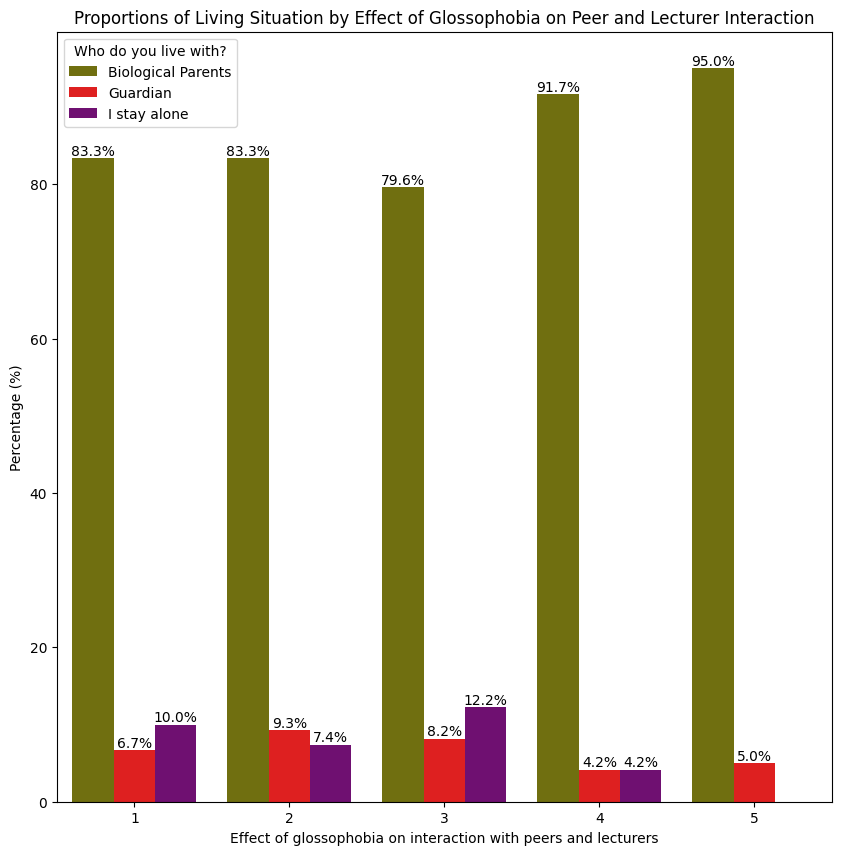

In [ ]:
# Calculate proportions for "Effect of glossophobia on interaction with peers and lecturers" by "Who do you live with?"
grouped_data_live_with_peer_interaction = Data.groupby(["Effect of glossophobia on interaction with peers and lecturers", "Who do you live with?"]).size().reset_index(name="Count")
total_counts_live_with_peer_interaction = grouped_data_live_with_peer_interaction.groupby("Effect of glossophobia on interaction with peers and lecturers")["Count"].transform("sum")
grouped_data_live_with_peer_interaction["Percentage"] = (grouped_data_live_with_peer_interaction["Count"] / total_counts_live_with_peer_interaction) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
   x="Effect of glossophobia on interaction with peers and lecturers",
   y="Percentage",
   hue="Who do you live with?",
   data=grouped_data_live_with_peer_interaction,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Living Situation by Effect of Glossophobia on Peer and Lecturer Interaction")
plt.show()

##Respondents who have the highest negative effects of glossophobia in their relationships with peers and lecturers (4/5 and 5/5) live with their parents

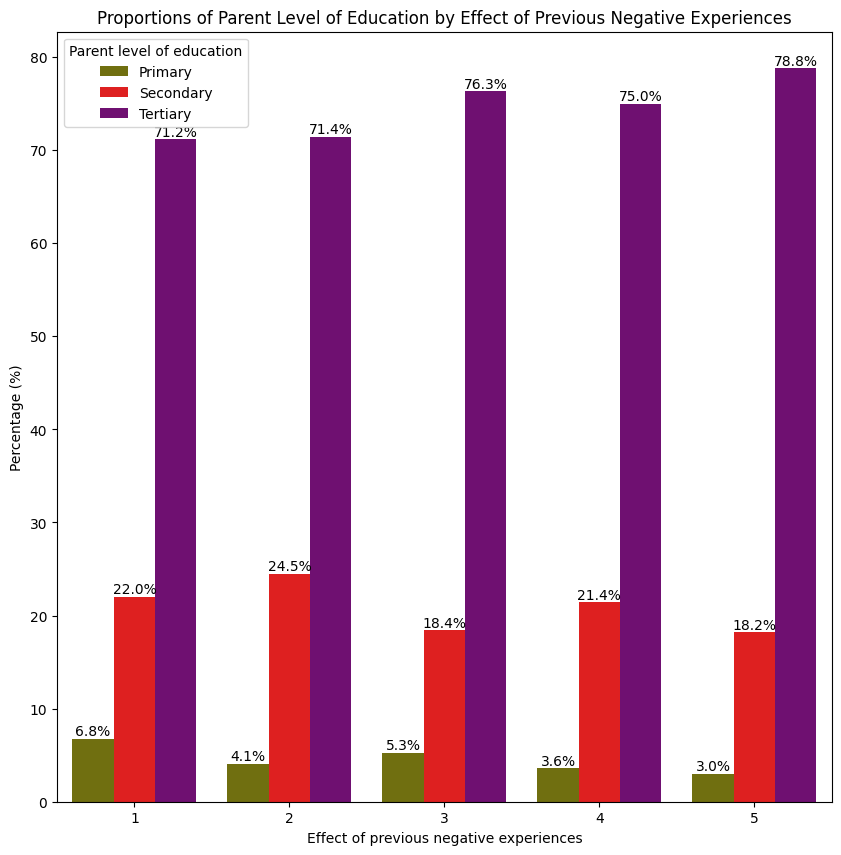

In [ ]:
# Calculate proportions for "Effect of previous negative experiences" by "Parent level of education"
grouped_data_parent_negative_experience = Data.groupby(["Effect of previous negative experiences", "Parent level of education"]).size().reset_index(name="Count")
total_counts_parent_negative_experience = grouped_data_parent_negative_experience.groupby("Effect of previous negative experiences")["Count"].transform("sum")
grouped_data_parent_negative_experience["Percentage"] = (grouped_data_parent_negative_experience["Count"] / total_counts_parent_negative_experience) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
   x="Effect of previous negative experiences",
   y="Percentage",
   hue="Parent level of education",
   data=grouped_data_parent_negative_experience,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Parent Level of Education by Effect of Previous Negative Experiences")
plt.show()

##Respondents who have the highest negative experiences in public speaking have parents that have tertiary level level of education (5/5, 78.8%) while the lowest comes from those whose parents have only primary eduaction (5/5, 3.0%). This could be indicative of the fact that students whose parents are not very educated have to train themselves to speak out for themselves and their parents often due to their parents' level of education while those with very well educated parents are more likely to have their parents speak up for them too often in plaves they ought to speak up for themselves.

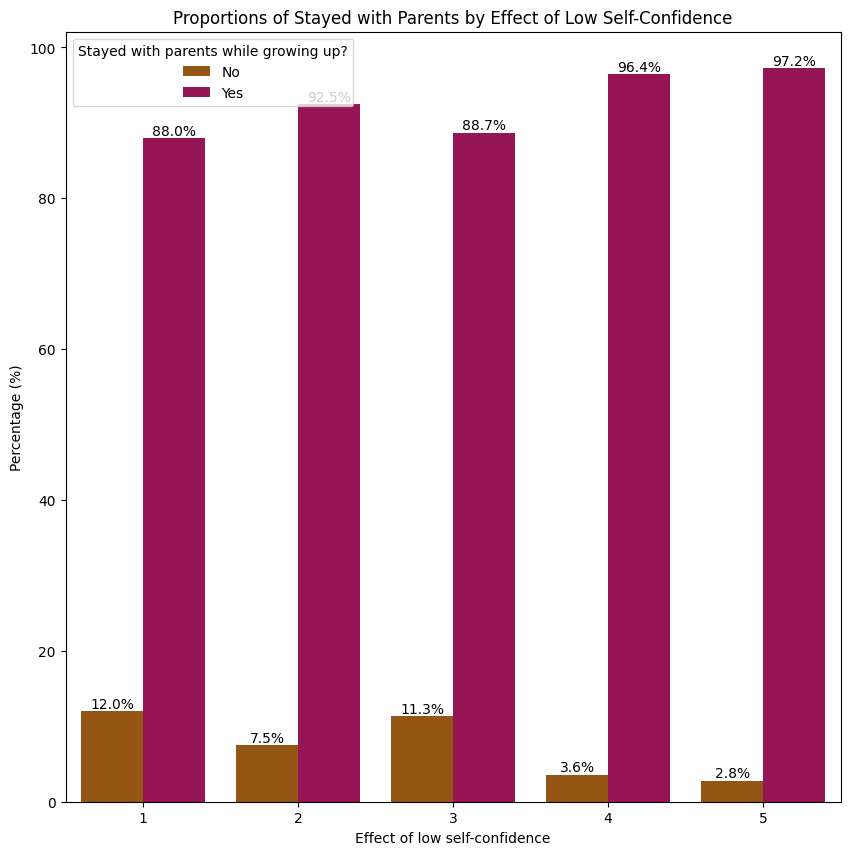

In [ ]:
# Calculate proportions for "Effect of low self-confidence" by "Stayed with parents while growing up?"
grouped_data_parents_self_confidence = Data.groupby(["Effect of low self-confidence", "Stayed with parents while growing up?"]).size().reset_index(name="Count")
total_counts_parents_self_confidence = grouped_data_parents_self_confidence.groupby("Effect of low self-confidence")["Count"].transform("sum")
grouped_data_parents_self_confidence["Percentage"] = (grouped_data_parents_self_confidence["Count"] / total_counts_parents_self_confidence) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
   x="Effect of low self-confidence",
   y="Percentage",
   hue="Stayed with parents while growing up?",
   data=grouped_data_parents_self_confidence,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Stayed with Parents by Effect of Low Self-Confidence")
plt.show()

##Almost all of those who stayed with parents while growing up (about 97%) have the highest rank(5/5) for low self-confidence, while those who did not were just about 3%

## Heuristics: "Led these activities?" - Yes (2, 3, 4, 5 - assign  weights in ascending order: low), others (2, 3, 4, 5 - assign weights in ascending order: medium or low)

#GENERAL WEIGHT: 3

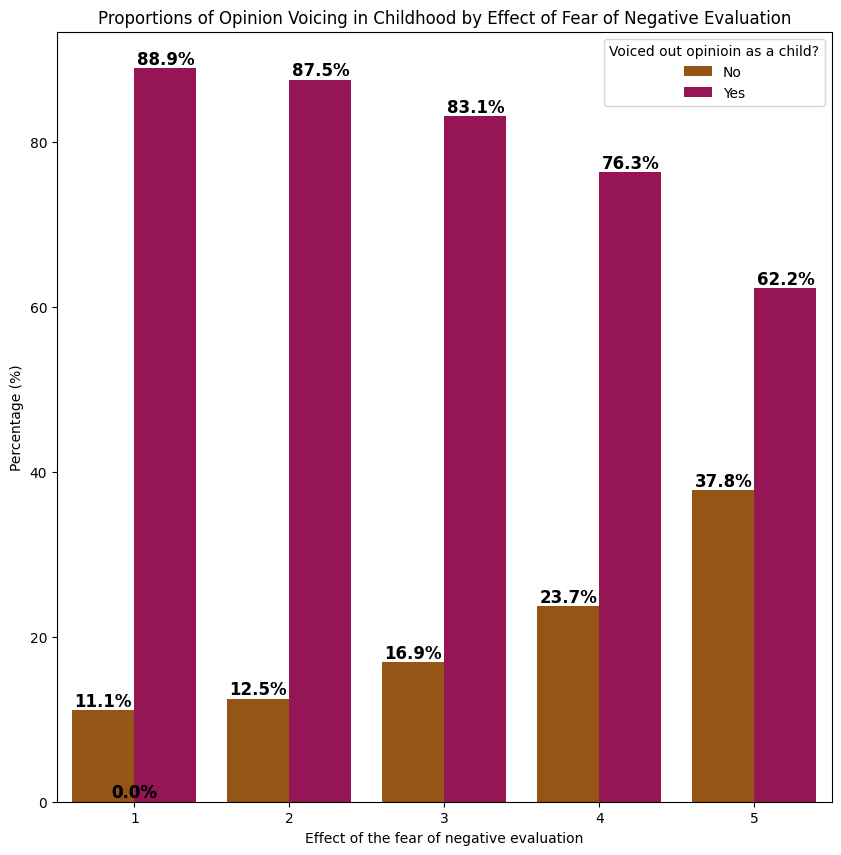

In [ ]:
# Calculate proportions for "Effect of the fear of negative evaluation" by "As a child, were you allowed to voice out your opinion in the family?"
grouped_data_opinion_fear_evaluation = Data.groupby(["Effect of the fear of negative evaluation", "Voiced out opinioin as a child?"]).size().reset_index(name="Count")
total_counts_opinion_fear_evaluation = grouped_data_opinion_fear_evaluation.groupby("Effect of the fear of negative evaluation")["Count"].transform("sum")
grouped_data_opinion_fear_evaluation["Percentage"] = (grouped_data_opinion_fear_evaluation["Count"] / total_counts_opinion_fear_evaluation) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Effect of the fear of negative evaluation",
    y="Percentage",
    hue="Voiced out opinioin as a child?",
    data=grouped_data_opinion_fear_evaluation,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Opinion Voicing in Childhood by Effect of Fear of Negative Evaluation")
plt.show()


##There is a strong relationship between voicing out opinion as a child child and having the fear of negative evakuation. For those who voiced out their opinion as children, there is a consistent decrease in their fear of being negatively evaluated from rank 1 to 5, while it is the reverse for those who were not allowedto voice out their opinion

## Heuristics: "Voiced out opinioin as a child?" - Yes (1, 2, 3, 4, 5 - assign  weights in ascending order: low), No (1, 2, 3, 4, 5 - assign weights in ascending order: high) >>VERY HIGH WEIGHT

##Columns: "Effect of the fear of negative evaluation", "Voiced out opinioin as a child"

#GENERAL WEIGHT: 5

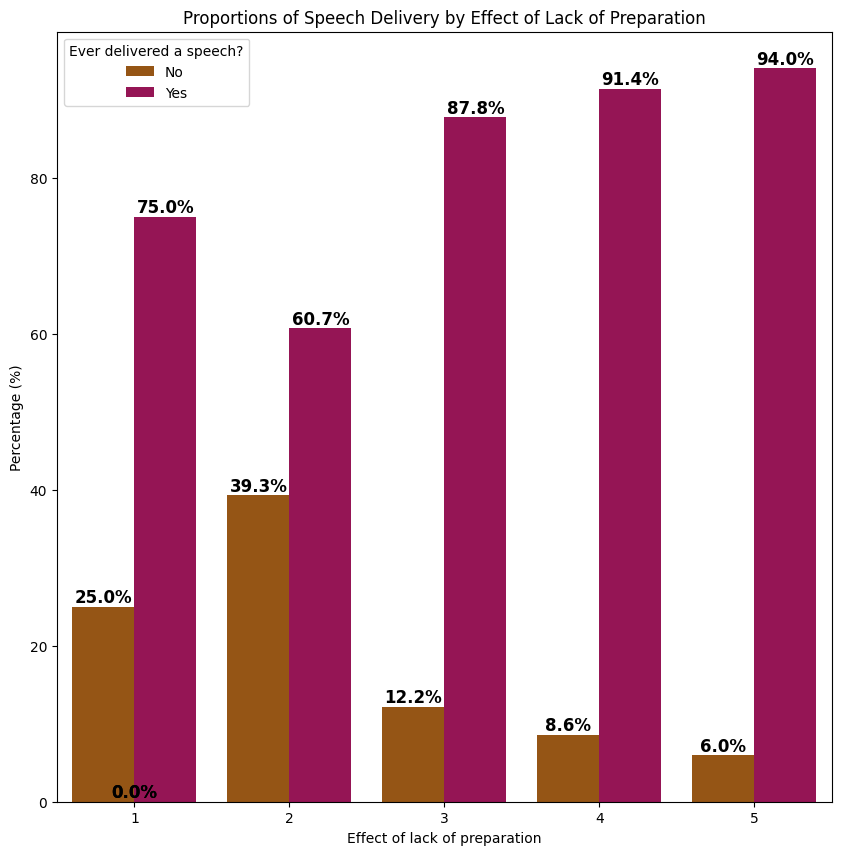

In [ ]:
# Calculate proportions for "Effect of lack of preparation" by "Ever delivered a speech?"
grouped_data_speech_preparation = Data.groupby(["Effect of lack of preparation", "Ever delivered a speech?"]).size().reset_index(name="Count")
total_counts_speech_preparation = grouped_data_speech_preparation.groupby("Effect of lack of preparation")["Count"].transform("sum")
grouped_data_speech_preparation["Percentage"] = (grouped_data_speech_preparation["Count"] / total_counts_speech_preparation) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Effect of lack of preparation",
    y="Percentage",
    hue="Ever delivered a speech?",
    data=grouped_data_speech_preparation,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Speech Delivery by Effect of Lack of Preparation")
plt.show()


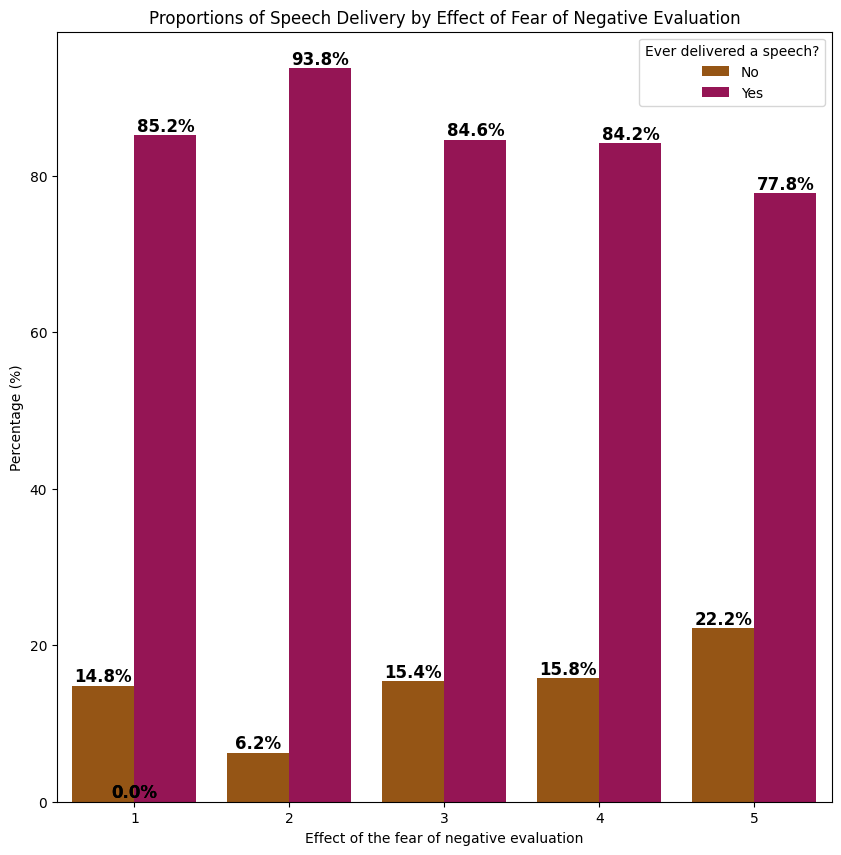

In [ ]:
# Calculate proportions for "Effect of the fear of negative evaluation" by "Ever delivered a speech?"
grouped_data_speech_fear_evaluation = Data.groupby(["Effect of the fear of negative evaluation", "Ever delivered a speech?"]).size().reset_index(name="Count")
total_counts_speech_fear_evaluation = grouped_data_speech_fear_evaluation.groupby("Effect of the fear of negative evaluation")["Count"].transform("sum")
grouped_data_speech_fear_evaluation["Percentage"] = (grouped_data_speech_fear_evaluation["Count"] / total_counts_speech_fear_evaluation) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Effect of the fear of negative evaluation",
    y="Percentage",
    hue="Ever delivered a speech?",
    data=grouped_data_speech_fear_evaluation,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Speech Delivery by Effect of Fear of Negative Evaluation")
plt.show()


In [ ]:
# # Calculate proportions for "Effect of low self-confidence" by "Ever delivered a speech?"
# grouped_data_speech_self_confidence = Data.groupby(["Effect of low self-confidence", "Ever delivered a speech?"]).size().reset_index(name="Count")
# total_counts_speech_self_confidence = grouped_data_speech_self_confidence.groupby("Effect of low self-confidence")["Count"].transform("sum")
# grouped_data_speech_self_confidence["Percentage"] = (grouped_data_speech_self_confidence["Count"] / total_counts_speech_self_confidence) * 100

# # Plot
# plt.figure(figsize=(10, 10))
# sns.barplot(
#     x="Effect of low self-confidence",
#     y="Percentage",
#     hue="Ever delivered a speech?",
#     data=grouped_data_speech_self_confidence,
#     palette="brg_r"
# )
# plt.ylabel("Percentage (%)")
# plt.title("Proportions of Speech Delivery by Effect of Low Self-Confidence")
# plt.show()


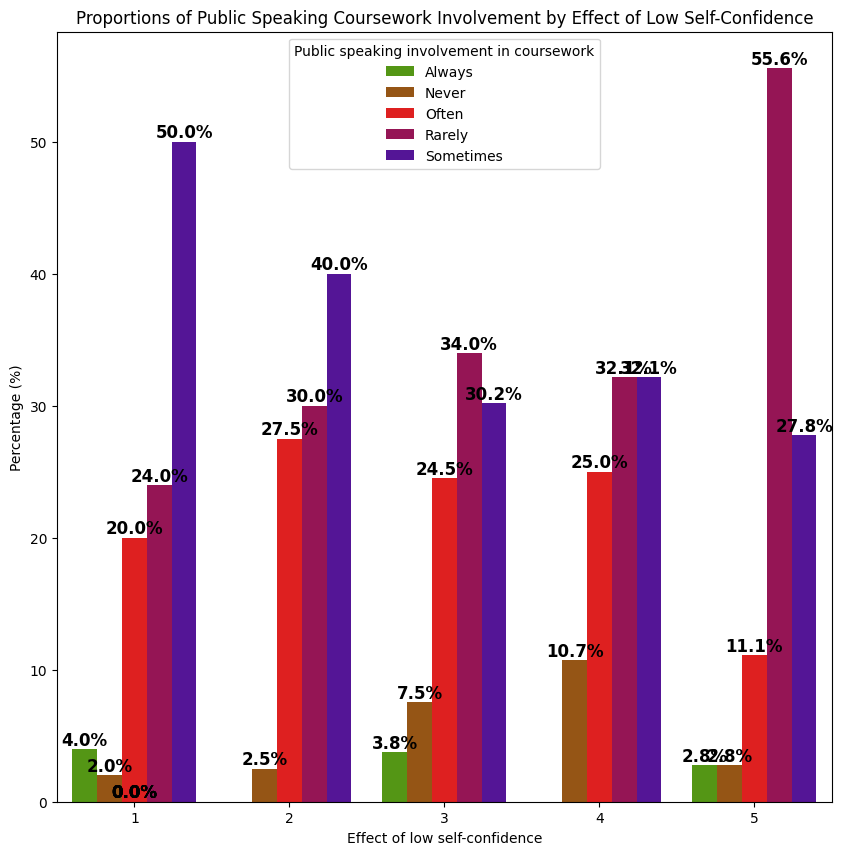

In [ ]:
# Calculate proportions for "Effect of low self-confidence" by "Public speaking involvement in coursework"
grouped_data_coursework_self_confidence = Data.groupby(["Effect of low self-confidence", "Public speaking involvement in coursework"]).size().reset_index(name="Count")
total_counts_coursework_self_confidence = grouped_data_coursework_self_confidence.groupby("Effect of low self-confidence")["Count"].transform("sum")
grouped_data_coursework_self_confidence["Percentage"] = (grouped_data_coursework_self_confidence["Count"] / total_counts_coursework_self_confidence) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Effect of low self-confidence",
    y="Percentage",
    hue="Public speaking involvement in coursework",
    data=grouped_data_coursework_self_confidence,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Public Speaking Coursework Involvement by Effect of Low Self-Confidence")
plt.show()


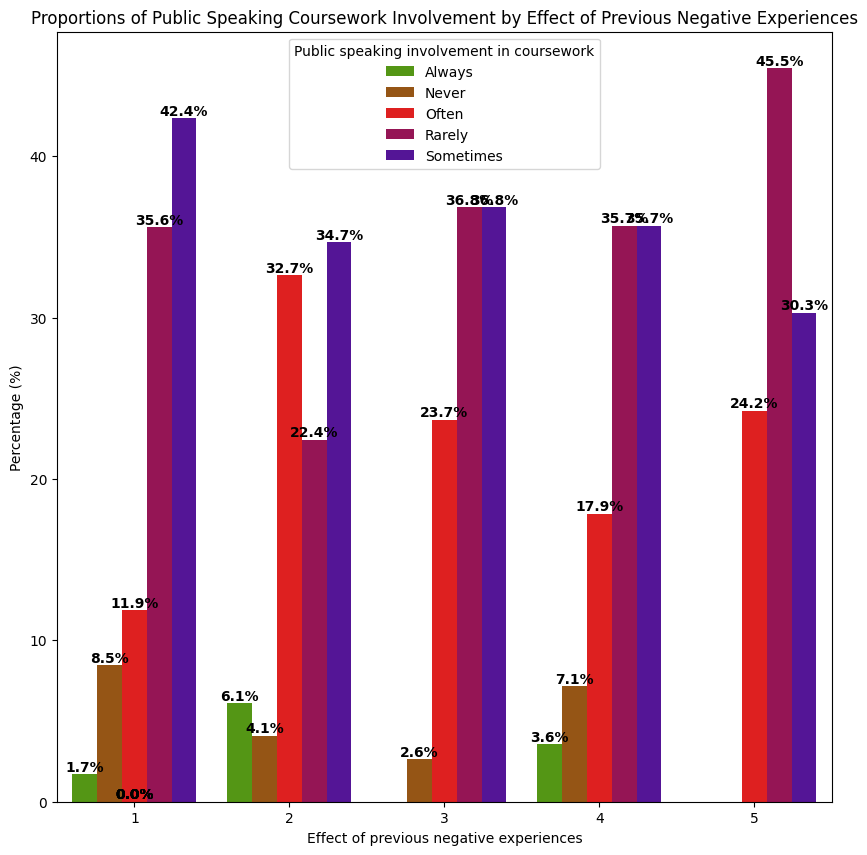

In [ ]:
# Calculate proportions for "Effect of previous negative experiences" by "Public speaking involvement in coursework"
grouped_data_coursework_negative_experience = Data.groupby(["Effect of previous negative experiences", "Public speaking involvement in coursework"]).size().reset_index(name="Count")
total_counts_coursework_negative_experience = grouped_data_coursework_negative_experience.groupby("Effect of previous negative experiences")["Count"].transform("sum")
grouped_data_coursework_negative_experience["Percentage"] = (grouped_data_coursework_negative_experience["Count"] / total_counts_coursework_negative_experience) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Effect of previous negative experiences",
    y="Percentage",
    hue="Public speaking involvement in coursework",
    data=grouped_data_coursework_negative_experience,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Public Speaking Coursework Involvement by Effect of Previous Negative Experiences")
plt.show()


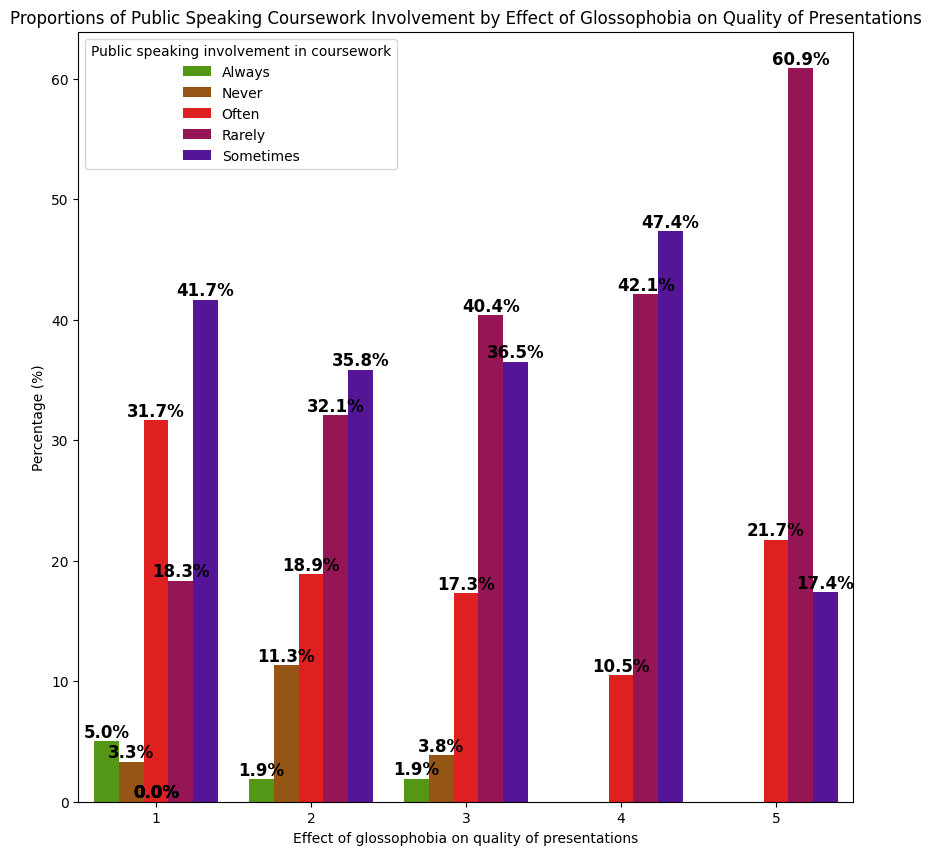

In [ ]:
# Calculate proportions for "Effect of glossophobia on quality of presentations" by "Public speaking involvement in coursework"
grouped_data_coursework_glossophobia_presentations = Data.groupby(["Effect of glossophobia on quality of presentations", "Public speaking involvement in coursework"]).size().reset_index(name="Count")
total_counts_coursework_glossophobia_presentations = grouped_data_coursework_glossophobia_presentations.groupby("Effect of glossophobia on quality of presentations")["Count"].transform("sum")
grouped_data_coursework_glossophobia_presentations["Percentage"] = (grouped_data_coursework_glossophobia_presentations["Count"] / total_counts_coursework_glossophobia_presentations) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Effect of glossophobia on quality of presentations",
    y="Percentage",
    hue="Public speaking involvement in coursework",
    data=grouped_data_coursework_glossophobia_presentations,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Public Speaking Coursework Involvement by Effect of Glossophobia on Quality of Presentations")
plt.show()


## Heuristics: "Public speaking involvement in coursework", "Effect of glossophobia on quality of presentations" - rarely (high) - VERY VERY HIGH WEIGHT IN ASCENDING ORDER (1,2,3,4,5)

## Columns: "Effect of glossophobia on quality of presentations", "Public speaking involvement in coursework"

#GENERAL WEIGHT: 4.5

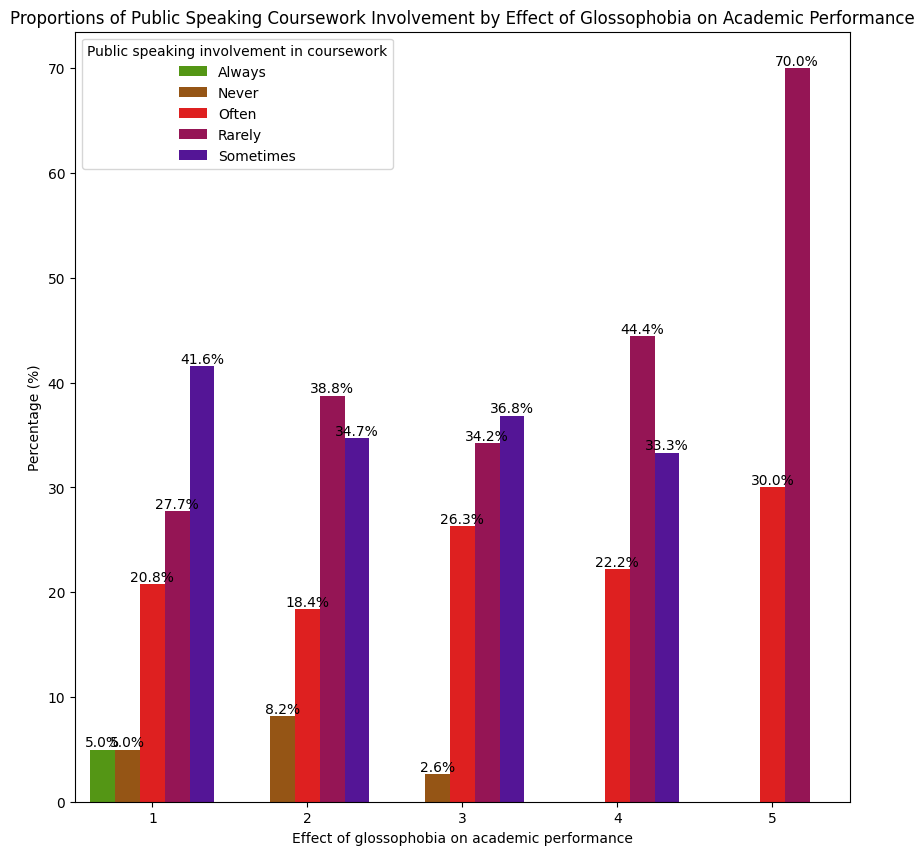

In [ ]:
# Calculate proportions for "Effect of glossophobia on academic performance" by "Public speaking involvement in coursework"
grouped_data_coursework_glossophobia_academic = Data.groupby(["Effect of glossophobia on academic performance", "Public speaking involvement in coursework"]).size().reset_index(name="Count")
total_counts_coursework_glossophobia_academic = grouped_data_coursework_glossophobia_academic.groupby("Effect of glossophobia on academic performance")["Count"].transform("sum")
grouped_data_coursework_glossophobia_academic["Percentage"] = (grouped_data_coursework_glossophobia_academic["Count"] / total_counts_coursework_glossophobia_academic) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
   x="Effect of glossophobia on academic performance",
   y="Percentage",
   hue="Public speaking involvement in coursework",
   data=grouped_data_coursework_glossophobia_academic,
   palette="brg_r"
)

# Add percentage labels on bars
for container in ax.containers:
   ax.bar_label(container, fmt='%.1f%%')

plt.ylabel("Percentage (%)")
plt.title("Proportions of Public Speaking Coursework Involvement by Effect of Glossophobia on Academic Performance")
plt.show()

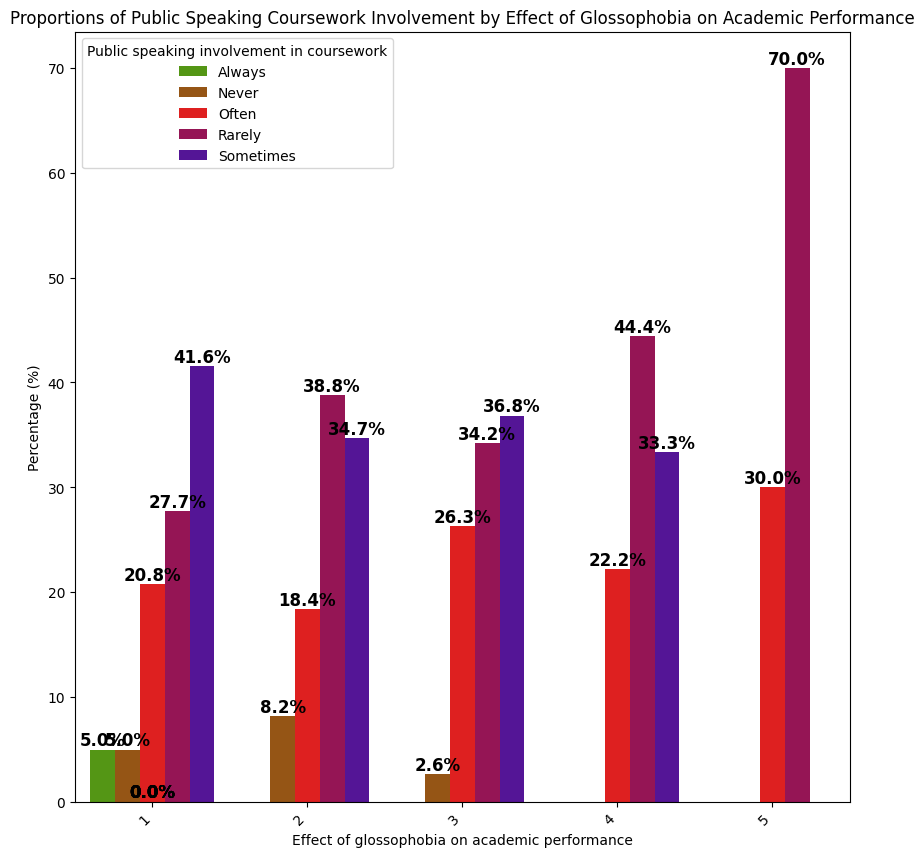

In [ ]:
# Calculate proportions for "Effect of glossophobia on academic performance" by "Public speaking involvement in coursework"
grouped_data_coursework_glossophobia_academic = Data.groupby(
    ["Effect of glossophobia on academic performance", "Public speaking involvement in coursework"]
).size().reset_index(name="Count")

total_counts_coursework_glossophobia_academic = grouped_data_coursework_glossophobia_academic.groupby(
    "Effect of glossophobia on academic performance"
)["Count"].transform("sum")

grouped_data_coursework_glossophobia_academic["Percentage"] = (
    grouped_data_coursework_glossophobia_academic["Count"] / total_counts_coursework_glossophobia_academic
) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Effect of glossophobia on academic performance",
    y="Percentage",
    hue="Public speaking involvement in coursework",
    data=grouped_data_coursework_glossophobia_academic,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Percentage (%)")
plt.title("Proportions of Public Speaking Coursework Involvement by Effect of Glossophobia on Academic Performance")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()


## Heuristics: "Public speaking involvement in coursework", "Effect of glossophobia on interaction with peers and lecturers" - rarely (high) - VERY VERY HIGH WEIGHT (5)

## Columns: "Effect of glossophobia on interaction with peers and lecturers", "Public speaking involvement in coursework"

#GENERAL WEIGHT: 5

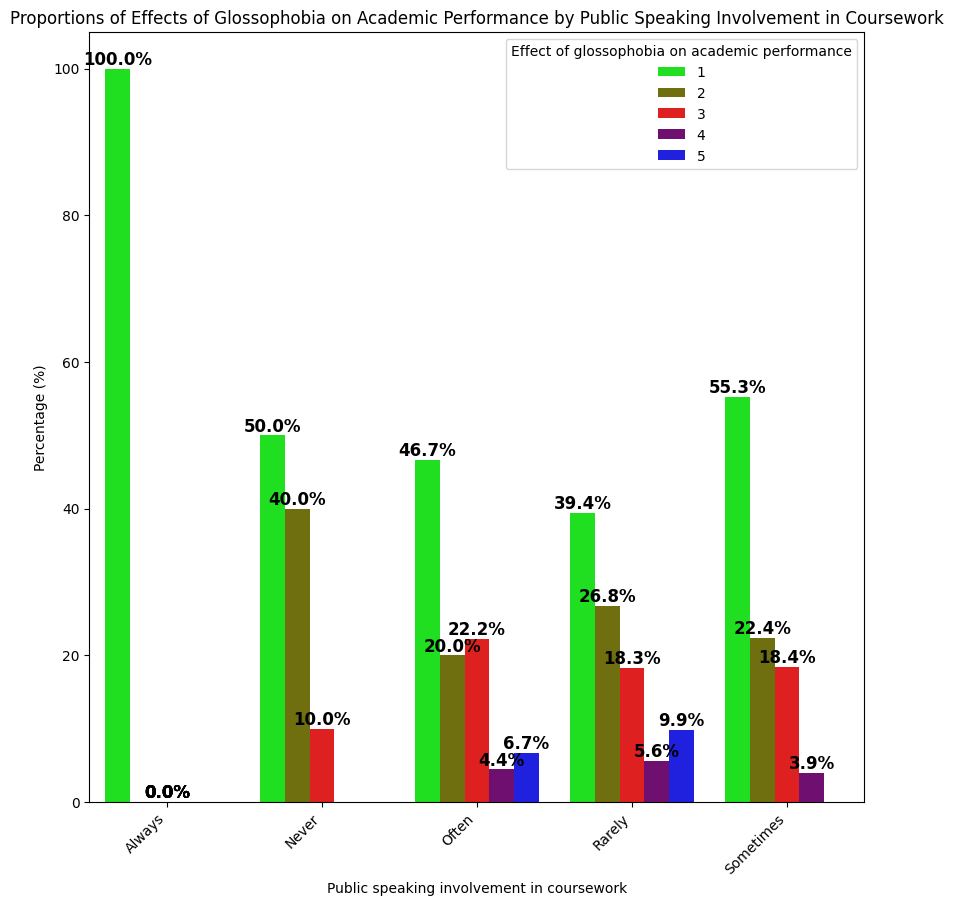

In [ ]:
# Calculate proportions for "Public speaking involvement in coursework" by "Effect of glossophobia on academic performance"
grouped_data_coursework_participation = Data.groupby(
    ["Public speaking involvement in coursework", "Effect of glossophobia on academic performance"]
).size().reset_index(name="Count")

total_counts_coursework_participation = grouped_data_coursework_participation.groupby(
    "Public speaking involvement in coursework"
)["Count"].transform("sum")

grouped_data_coursework_participation["Percentage"] = (
    grouped_data_coursework_participation["Count"] / total_counts_coursework_participation
) * 100

# Plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x="Public speaking involvement in coursework",
    y="Percentage",
    hue="Effect of glossophobia on academic performance",
    data=grouped_data_coursework_participation,
    palette="brg_r"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Percentage (%)")
plt.title("Proportions of Effects of Glossophobia on Academic Performance by Public Speaking Involvement in Coursework")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()


# CATEGORICAL COMPARISONS

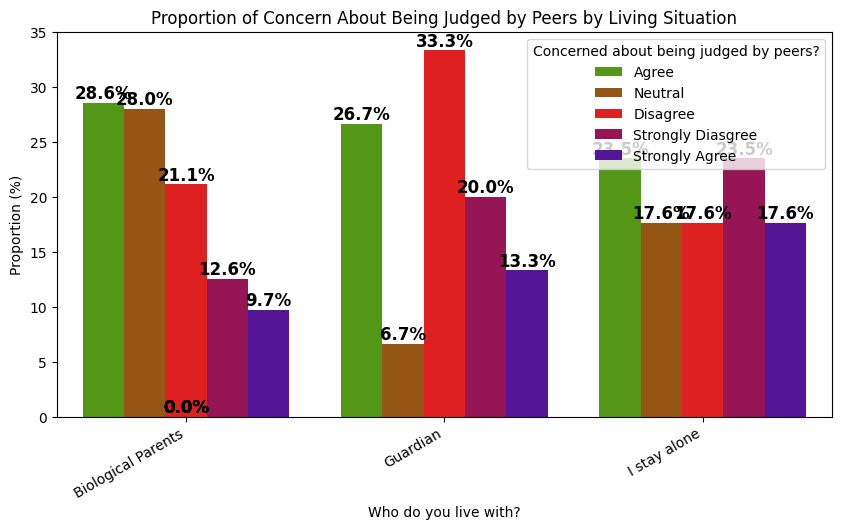

In [ ]:
# Calculate proportions
proportion_data = (
    Data.groupby("Who do you live with?")["Concerned about being judged by peers?"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert proportion to percentage
proportion_data["Proportion"] *= 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Who do you live with?",
    y="Proportion",
    hue="Concerned about being judged by peers?",
    data=proportion_data,
    palette="brg_r"
)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Proportion (%)")
plt.title("Proportion of Concern About Being Judged by Peers by Living Situation")
plt.xticks(rotation=30, ha="right")  # Rotate x-axis labels for readability
plt.show()


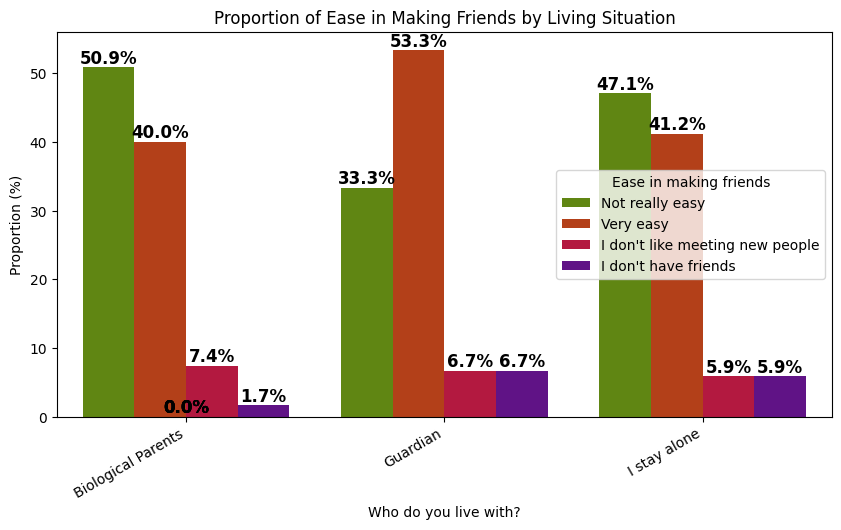

In [ ]:
# Calculate proportions
proportion_data = (
    Data.groupby("Who do you live with?")["Ease in making friends"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert proportion to percentage
proportion_data["Proportion"] *= 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Who do you live with?",
    y="Proportion",
    hue="Ease in making friends",
    data=proportion_data,
    palette="brg_r"
)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Proportion (%)")
plt.title("Proportion of Ease in Making Friends by Living Situation")
plt.xticks(rotation=30, ha="right")  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# proportion_data = Data.groupby("Who do you live with?")["Max no. of people spoken to"].value_counts(normalize=True).rename("Proportion").reset_index()

# plt.figure(figsize=(10, 5))
# sns.barplot(
#     x="Who do you live with?",
#     y="Proportion",
#     hue="Max no. of people spoken to",
#     data=proportion_data,
#     palette="brg_r"
# )
# plt.ylabel("Proportion")
# plt.title("Proportion of Max Number of People Spoken To by Living Situation")
# plt.xticks(rotation=30)
# plt.show()


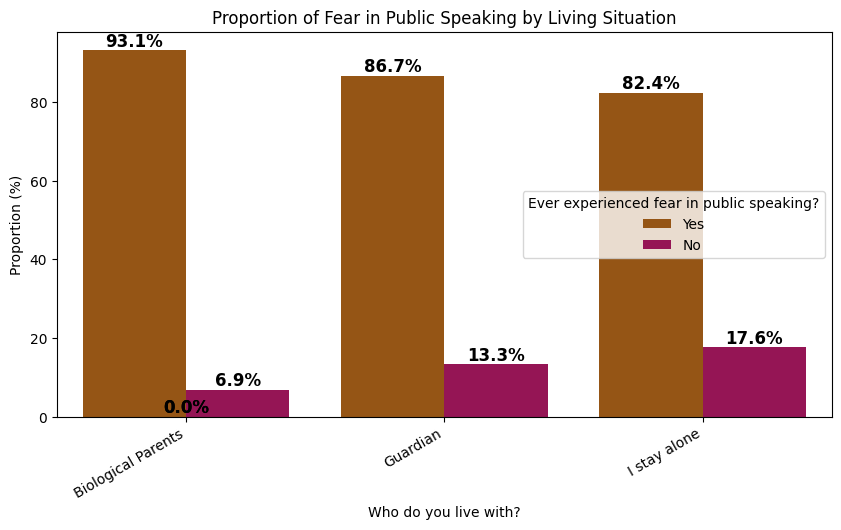

In [ ]:
# Calculate proportions
proportion_data = (
    Data.groupby("Who do you live with?")["Ever experienced fear in public speaking?"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert proportion to percentage
proportion_data["Proportion"] *= 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Who do you live with?",
    y="Proportion",
    hue="Ever experienced fear in public speaking?",
    data=proportion_data,
    palette="brg_r"
)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Proportion (%)")
plt.title("Proportion of Fear in Public Speaking by Living Situation")
plt.xticks(rotation=30, ha="right")  # Rotate x-axis labels for better readability
plt.show()


## Heuristics for who they stayed with: high (Guardian and "I stay alone") and low (Biological Parents). Assign the highest weight for the guardian

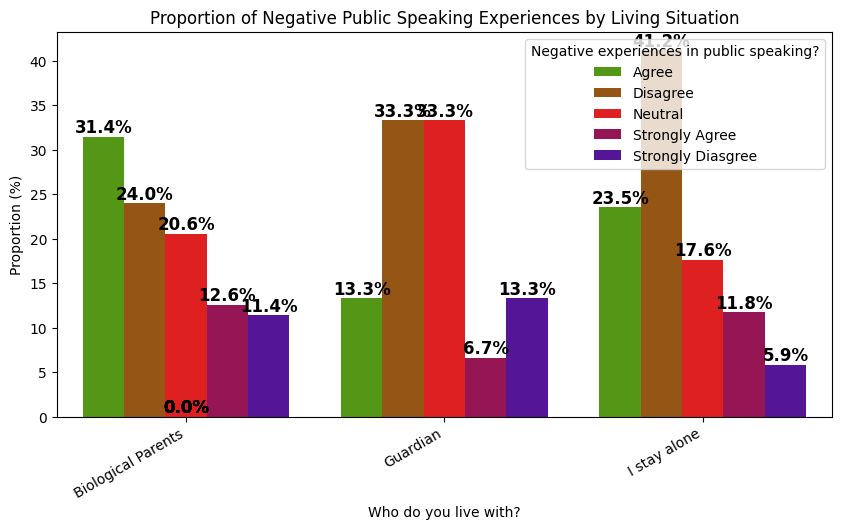

In [ ]:
# Calculate proportions
proportion_data = (
    Data.groupby("Who do you live with?")["Negative experiences in public speaking?"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert proportions to percentages
proportion_data["Proportion"] *= 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Who do you live with?",
    y="Proportion",
    hue="Negative experiences in public speaking?",
    data=proportion_data,
    palette="brg_r"
)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Proportion (%)")
plt.title("Proportion of Negative Public Speaking Experiences by Living Situation")
plt.xticks(rotation=30, ha="right")  # Rotate labels for readability
plt.show()


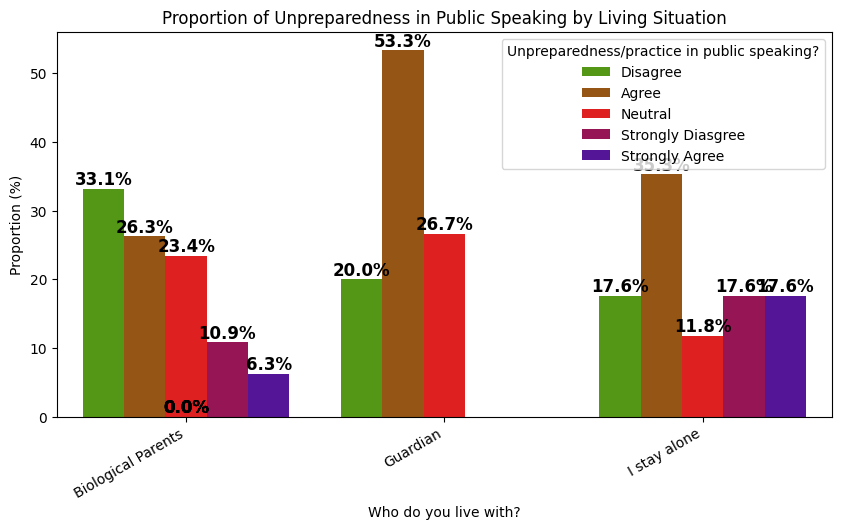

In [ ]:
# Calculate proportions
proportion_data = (
    Data.groupby("Who do you live with?")["Unpreparedness/practice in public speaking?"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert proportions to percentages
proportion_data["Proportion"] *= 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Who do you live with?",
    y="Proportion",
    hue="Unpreparedness/practice in public speaking?",
    data=proportion_data,
    palette="brg_r"
)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Proportion (%)")
plt.title("Proportion of Unpreparedness in Public Speaking by Living Situation")
plt.xticks(rotation=30, ha="right")  # Rotate labels for readability
plt.show()


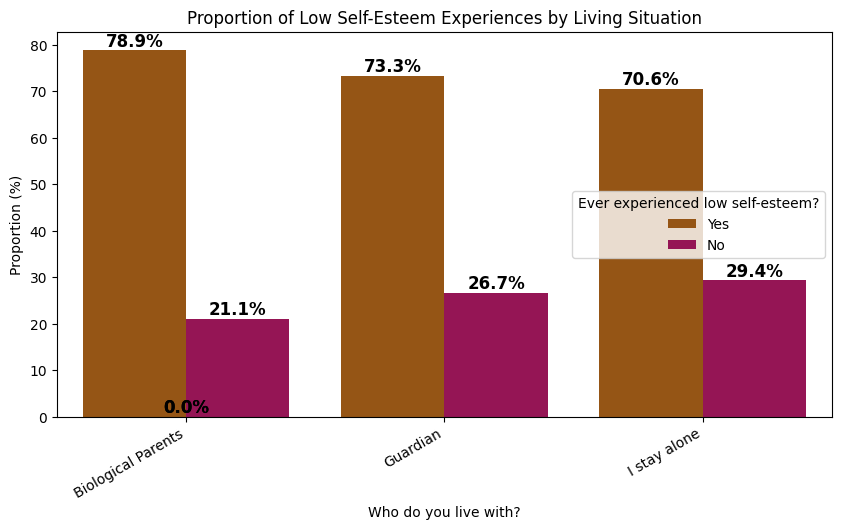

In [ ]:
# Calculate proportions
proportion_data = (
    Data.groupby("Who do you live with?")["Ever experienced low self-esteem?"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert proportions to percentages
proportion_data["Proportion"] *= 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="Who do you live with?",
    y="Proportion",
    hue="Ever experienced low self-esteem?",
    data=proportion_data,
    palette="brg_r"
)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

plt.ylabel("Proportion (%)")
plt.title("Proportion of Low Self-Esteem Experiences by Living Situation")
plt.xticks(rotation=30, ha="right")  # Rotate labels for better readability
plt.show()


In [ ]:
# proportion_data = Data.groupby("Who do you live with?")["Medical issue related to anxiety?"].value_counts(normalize=True).rename("Proportion").reset_index()

# plt.figure(figsize=(10, 5))
# sns.barplot(
#     x="Who do you live with?",
#     y="Proportion",
#     hue="Medical issue related to anxiety?",
#     data=proportion_data,
#     palette="brg_r"
# )
# plt.ylabel("Proportion")
# plt.title("Proportion of Anxiety-Related Medical Issues by Living Situation")
# plt.xticks(rotation=30)
# plt.show()


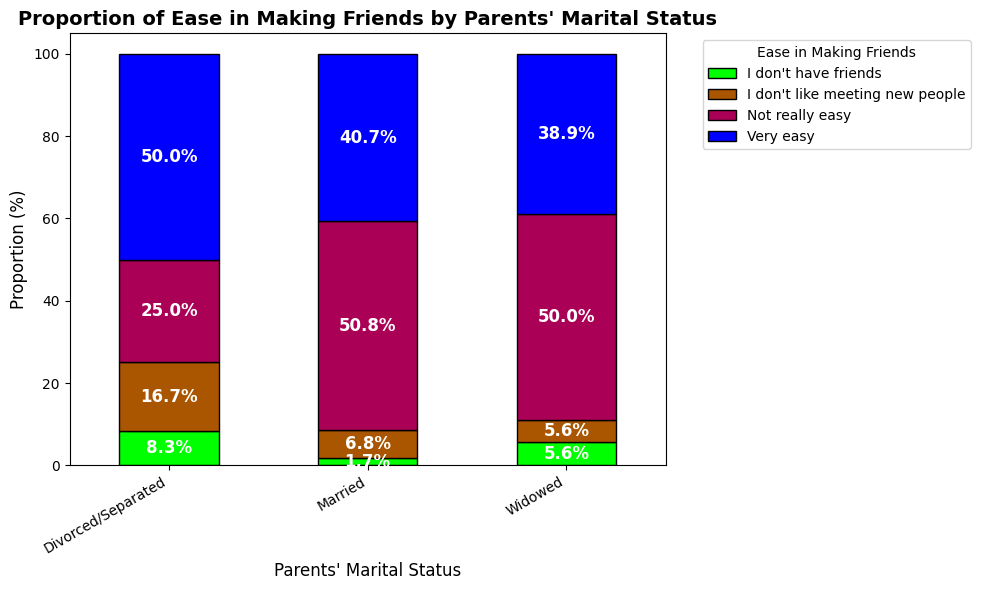

In [ ]:
# Calculate proportions
proportions = Data.groupby(["Parents' Marital Status", "Ease in making friends"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
ax = proportions.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="brg_r", edgecolor="black")

# Annotate bars with percentages
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12, color="white", fontweight="bold")

plt.title("Proportion of Ease in Making Friends by Parents' Marital Status", fontsize=14, fontweight="bold")
plt.xlabel("Parents' Marital Status", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for better readability
plt.legend(title="Ease in Making Friends", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


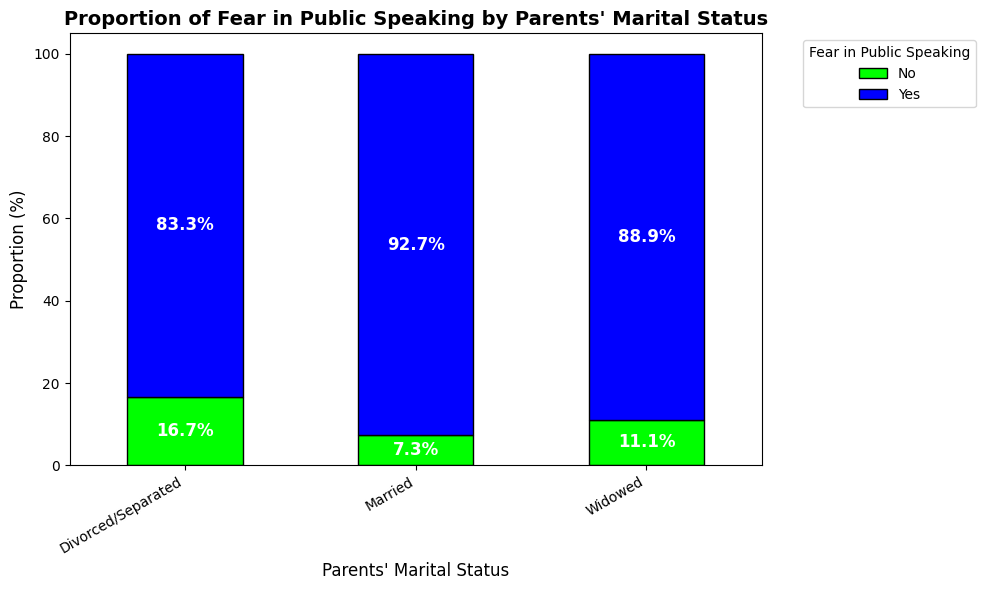

In [ ]:
# Calculate proportions
proportions = Data.groupby(["Parents' Marital Status", "Ever experienced fear in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
ax = proportions.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="brg_r", edgecolor="black")

# Annotate bars with percentages
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Fear in Public Speaking by Parents' Marital Status", fontsize=14, fontweight="bold")
plt.xlabel("Parents' Marital Status", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for better readability
plt.legend(title="Fear in Public Speaking", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Heuristics for their parents' marital status: high (married) and medium (Divorce/Separated or Widowed)

## Columns: Fear in Public Speaking, Parents' Marital Status

#GENERAL WEIGHT:3

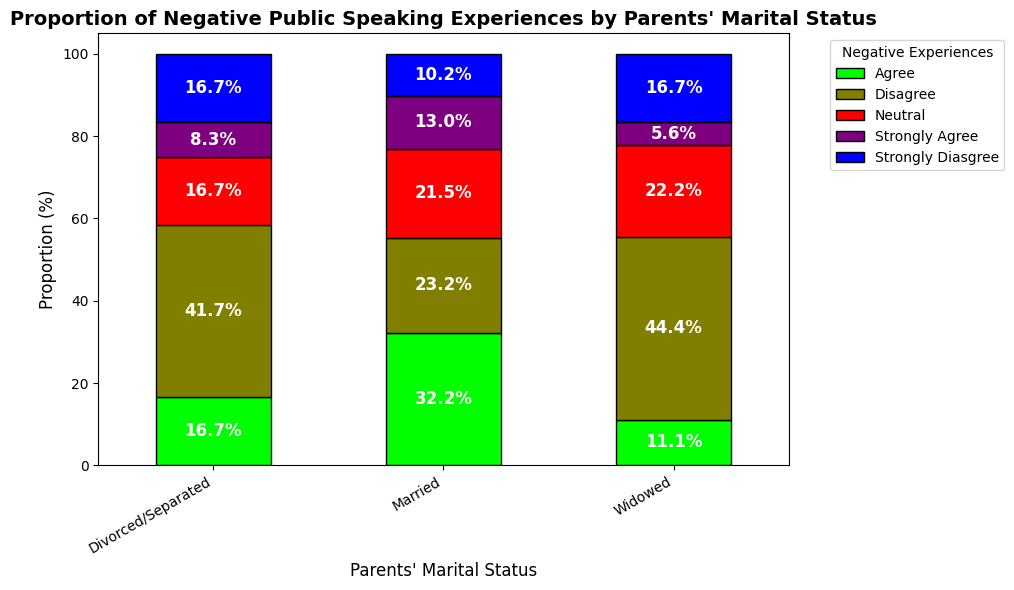

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate proportions
proportions = Data.groupby(["Parents' Marital Status", "Negative experiences in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentages
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Negative Public Speaking Experiences by Parents' Marital Status", fontsize=14, fontweight="bold")
plt.xlabel("Parents' Marital Status", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for better readability
plt.legend(title="Negative Experiences", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


## Heuristics on if they stayed with parents while growing up: high - Yes and medium - No

#Columns: "Stayed with parents while growing up?", "Ever experienced fear in public speaking?"

#GENERAL WEIGHT: 4

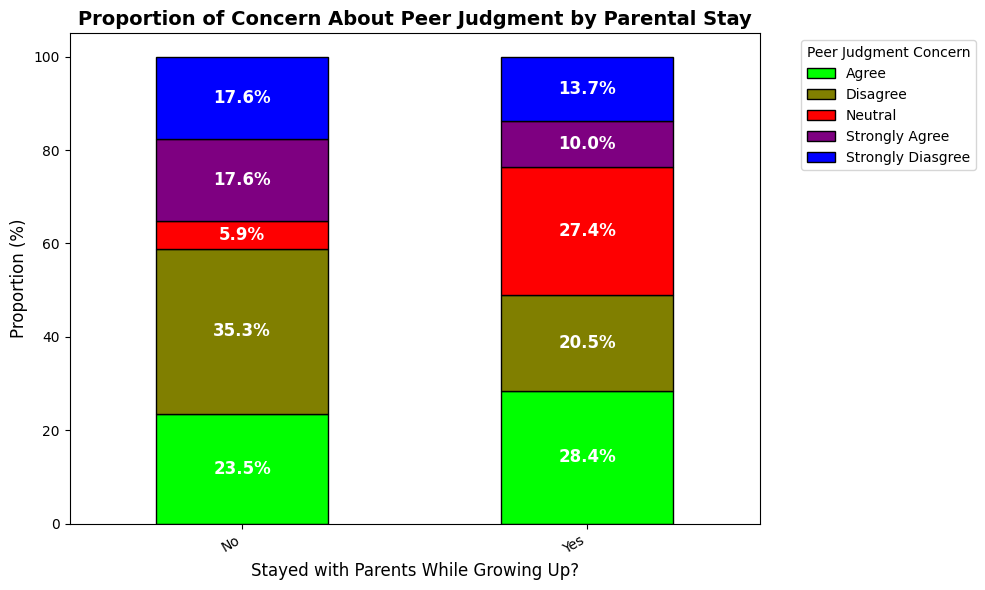

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate proportions
proportions = Data.groupby(["Stayed with parents while growing up?", "Concerned about being judged by peers?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentages
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Concern About Peer Judgment by Parental Stay", fontsize=14, fontweight="bold")
plt.xlabel("Stayed with Parents While Growing Up?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for better readability
plt.legend(title="Peer Judgment Concern", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


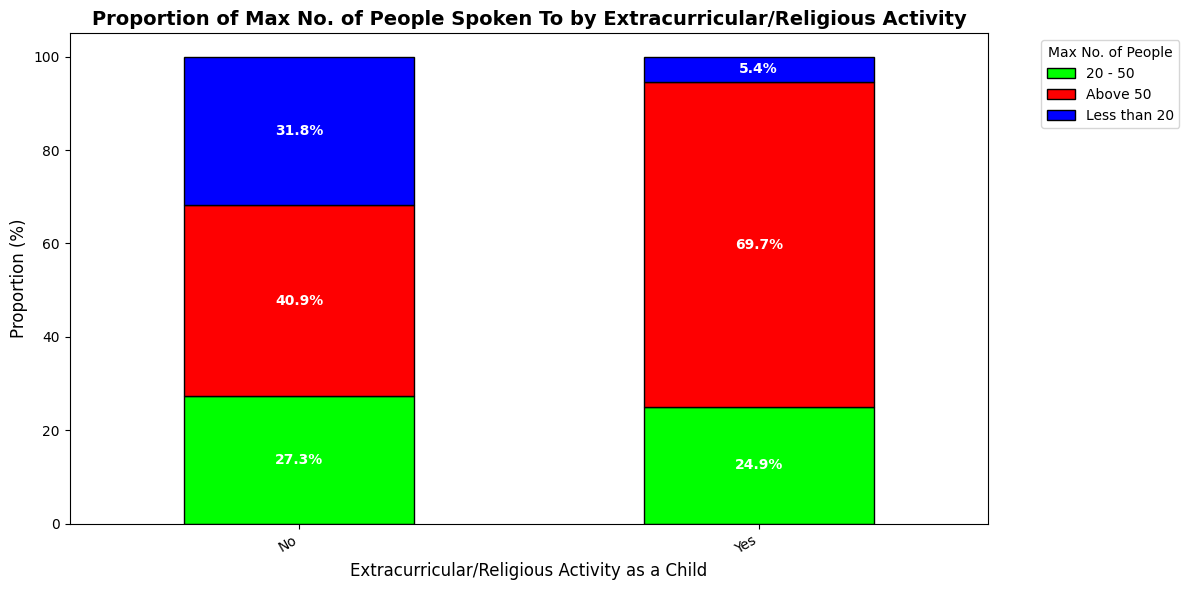

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Max no. of people spoken to"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert counts to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Max No. of People Spoken To by Extracurricular/Religious Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for readability
plt.legend(title="Max No. of People", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


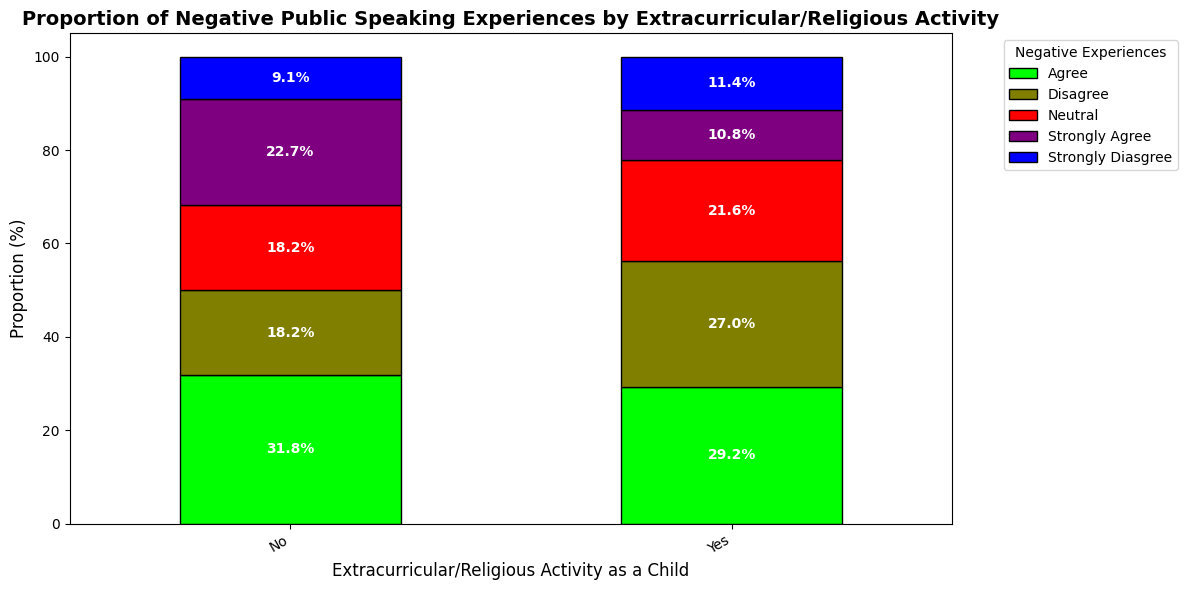

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Negative experiences in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert counts to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Negative Public Speaking Experiences by Extracurricular/Religious Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for readability
plt.legend(title="Negative Experiences", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


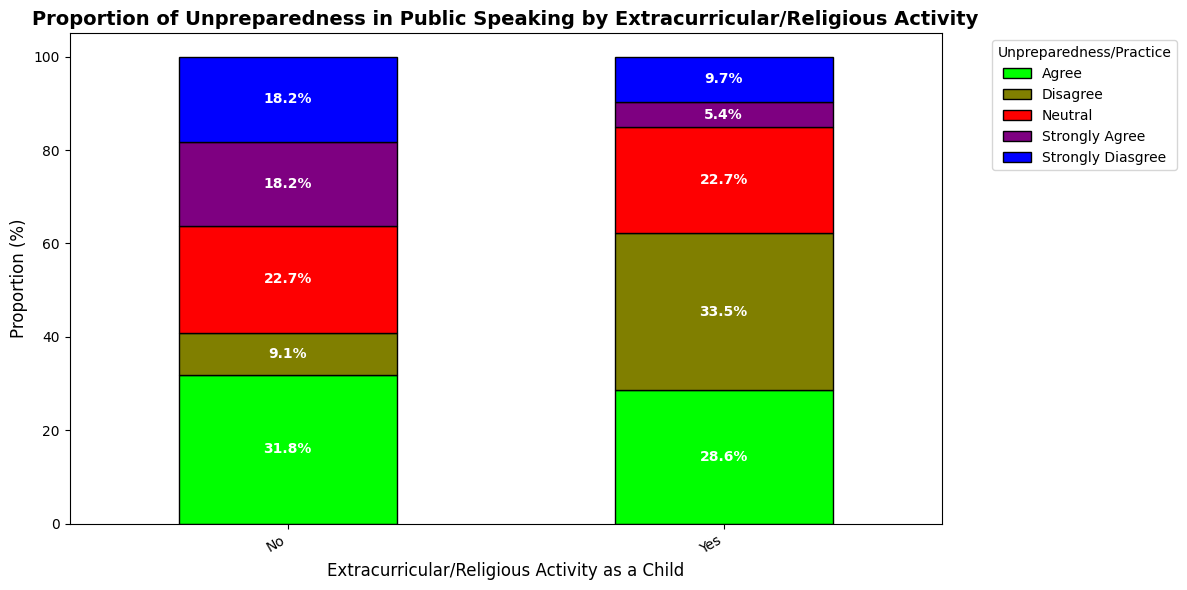

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Unpreparedness/practice in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert counts to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Unpreparedness in Public Speaking by Extracurricular/Religious Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for readability
plt.legend(title="Unpreparedness/Practice", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


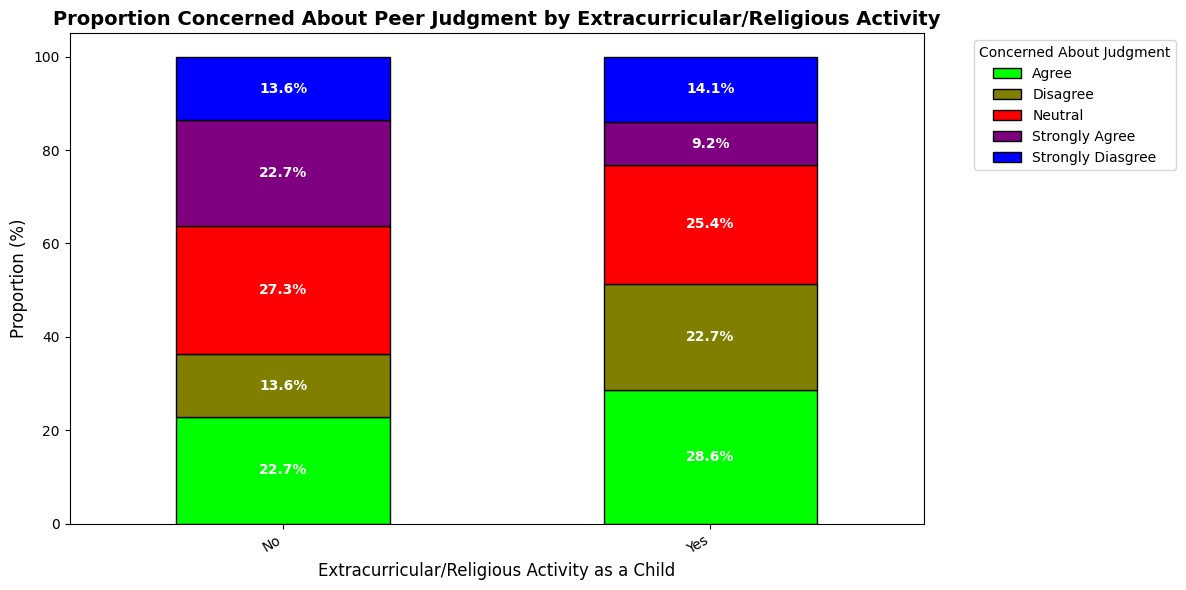

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Concerned about being judged by peers?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert counts to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion Concerned About Peer Judgment by Extracurricular/Religious Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=30, ha="right")  # Rotate labels for better readability
plt.legend(title="Concerned About Judgment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


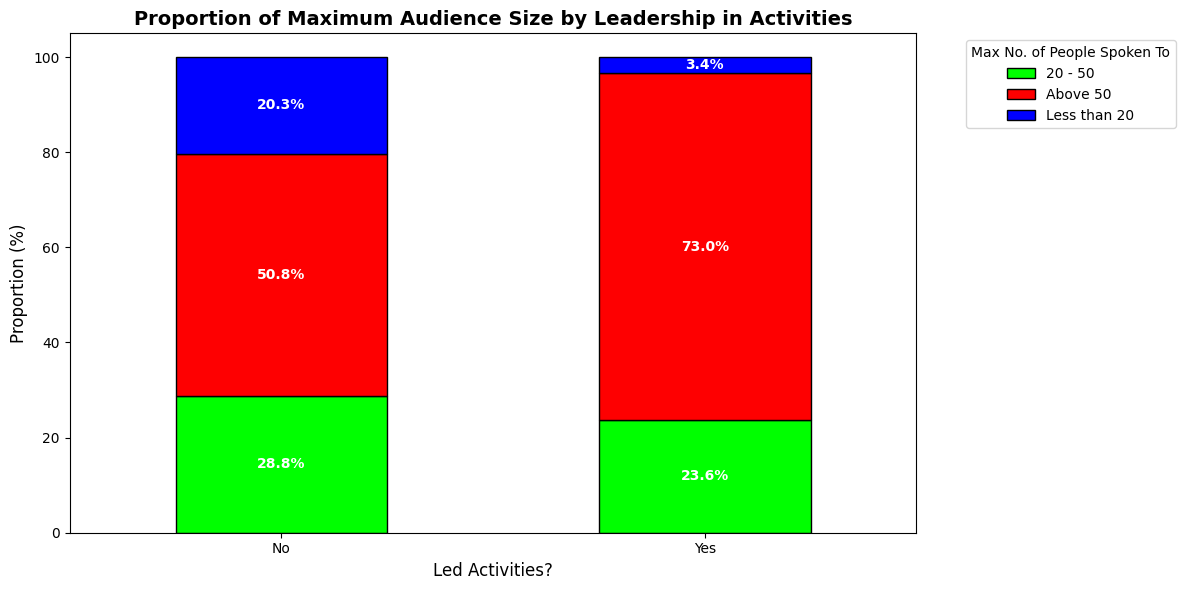

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Led these activities?", "Max no. of people spoken to"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert counts to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Maximum Audience Size by Leadership in Activities", fontsize=14, fontweight="bold")
plt.xlabel("Led Activities?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Max No. of People Spoken To", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


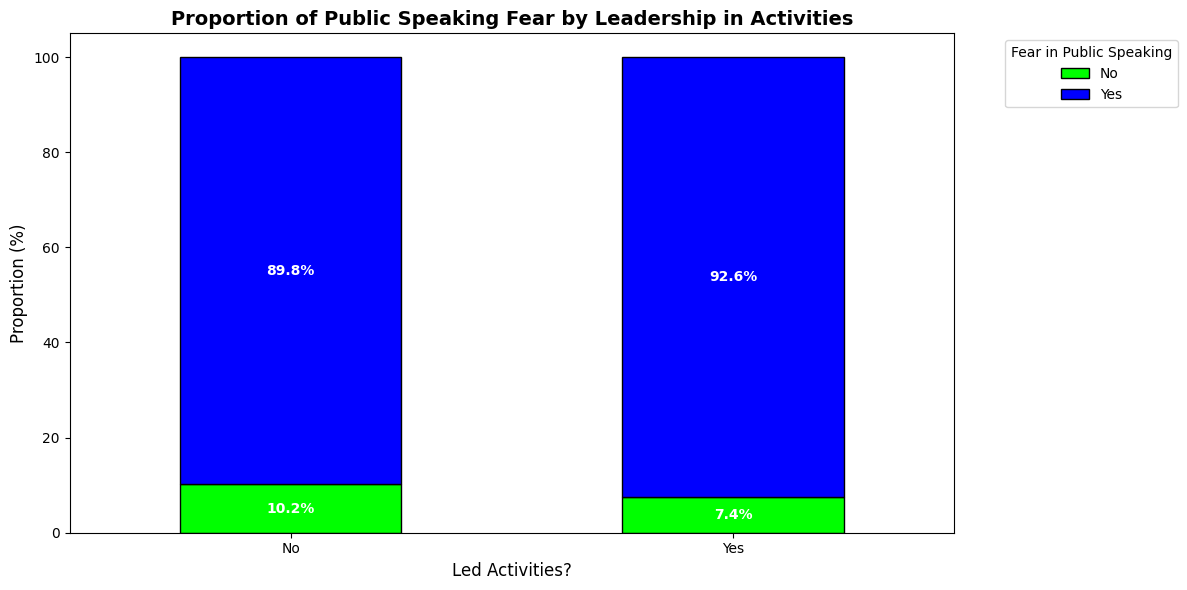

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Led these activities?", "Ever experienced fear in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Public Speaking Fear by Leadership in Activities", fontsize=14, fontweight="bold")
plt.xlabel("Led Activities?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Fear in Public Speaking", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


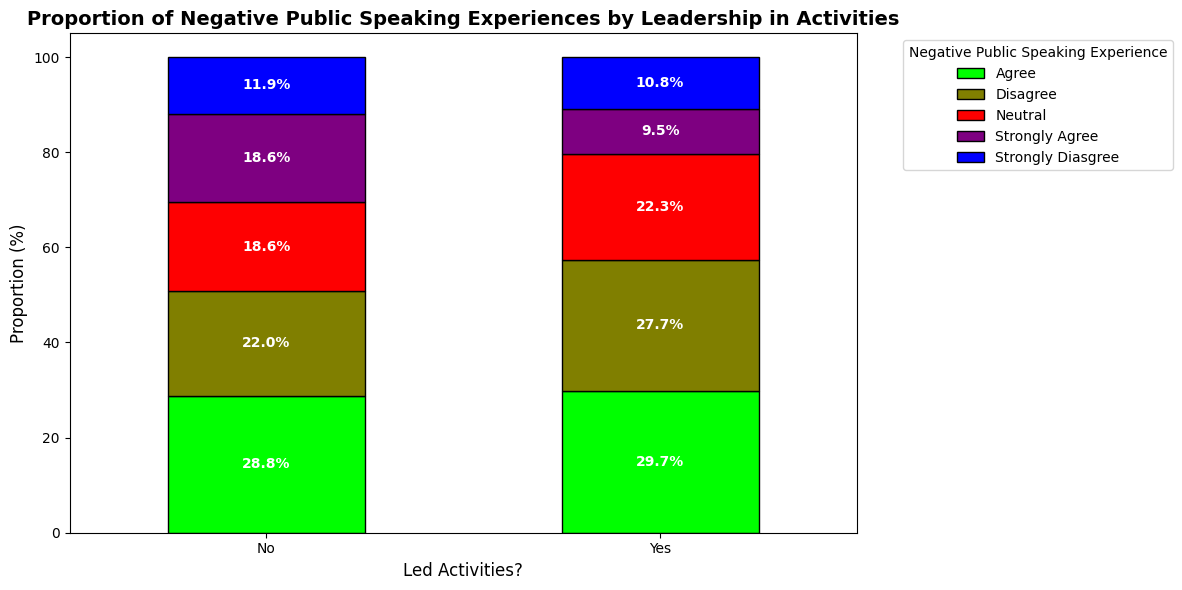

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Led these activities?", "Negative experiences in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Negative Public Speaking Experiences by Leadership in Activities", fontsize=14, fontweight="bold")
plt.xlabel("Led Activities?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Negative Public Speaking Experience", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# proportions = Data.groupby(["Led these activities?", "Concerned about being judged by peers?"]).size().unstack(fill_value=0)
# proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# proportions.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="brg_r")
# plt.title("Proportion of Concern About Peer Judgment by Leadership in Activities")
# plt.xlabel("Led Activities?")
# plt.ylabel("Proportion (%)")
# plt.legend(title="Concern About Peer Judgment", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.show()


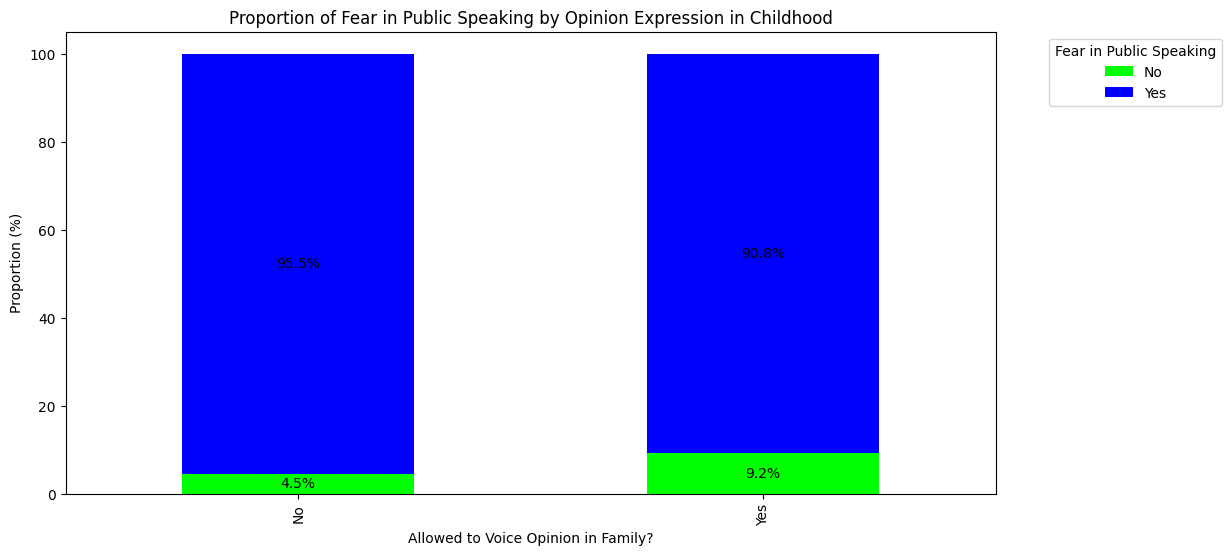

In [ ]:
# Calculate proportions
proportions = Data.groupby(["Voiced out opinioin as a child?", "Ever experienced fear in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# Plot
ax = proportions.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="brg_r")

# Add percentage labels at the middle of each segment
for c in ax.containers:
    # Get the positions and heights for the current segment
    positions = [rect.get_x() + rect.get_width()/2 for rect in c]
    heights = [rect.get_height() for rect in c]
    # Add labels
    labels = ['%.1f%%' % h for h in heights]
    ax.bar_label(c, labels=labels, label_type='center')

plt.title("Proportion of Fear in Public Speaking by Opinion Expression in Childhood")
plt.xlabel("Allowed to Voice Opinion in Family?")
plt.ylabel("Proportion (%)")
plt.legend(title="Fear in Public Speaking", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##Heuristics for the ability to voice out opinion in their family: high (No: assign  weight of 4), medium (Yes: assign  weight  of 2.5)

##Columns: "Voiced out opinioin as a child?", "Ever experienced fear in public speaking?"

#GENERAL WEIGHT: 4

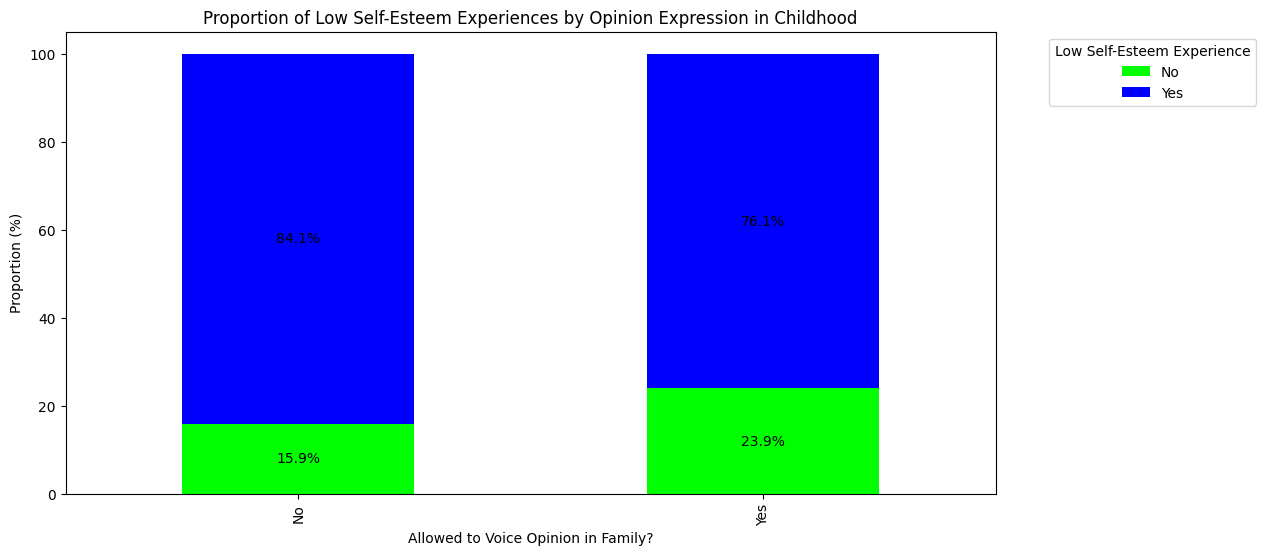

In [ ]:
# Calculate proportions
proportions = Data.groupby(["Voiced out opinioin as a child?", "Ever experienced low self-esteem?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# Plot
ax = proportions.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="brg_r")

# Add percentage labels at the middle of each segment
for c in ax.containers:
   # Get the positions and heights for the current segment
   positions = [rect.get_x() + rect.get_width()/2 for rect in c]
   heights = [rect.get_height() for rect in c]
   # Add labels
   labels = ['%.1f%%' % h for h in heights]
   ax.bar_label(c, labels=labels, label_type='center')

plt.title("Proportion of Low Self-Esteem Experiences by Opinion Expression in Childhood")
plt.xlabel("Allowed to Voice Opinion in Family?")
plt.ylabel("Proportion (%)")
plt.legend(title="Low Self-Esteem Experience", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

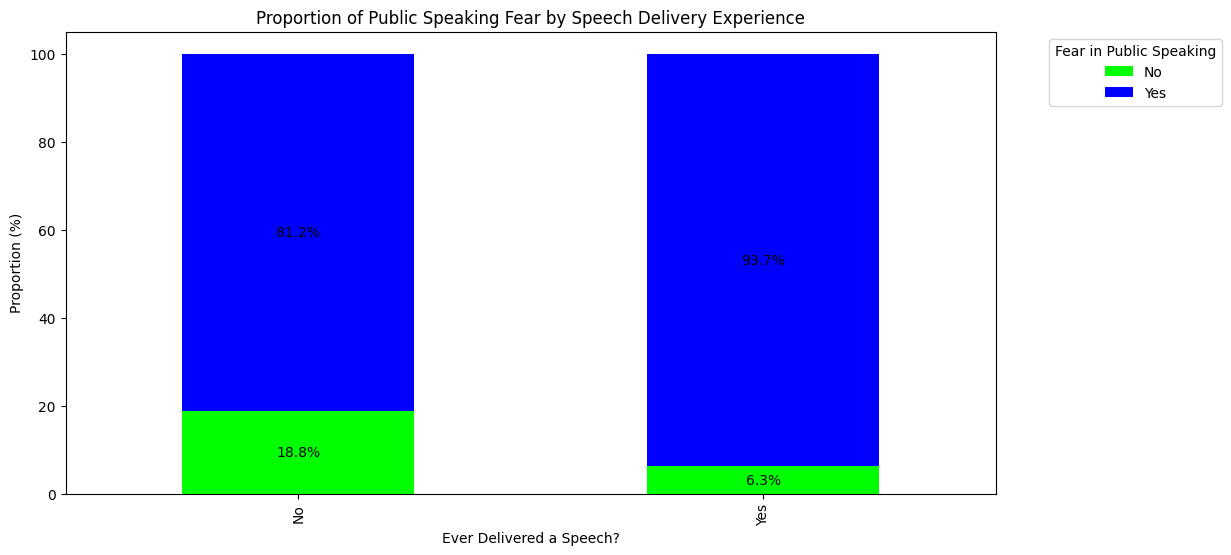

In [ ]:
# Calculate proportions
proportions = Data.groupby(["Ever delivered a speech?", "Ever experienced fear in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# Plot
ax = proportions.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="brg_r")

# Add percentage labels at the middle of each segment
for c in ax.containers:
   # Get the positions and heights for the current segment
   positions = [rect.get_x() + rect.get_width()/2 for rect in c]
   heights = [rect.get_height() for rect in c]
   # Add labels
   labels = ['%.1f%%' % h for h in heights]
   ax.bar_label(c, labels=labels, label_type='center')

plt.title("Proportion of Public Speaking Fear by Speech Delivery Experience")
plt.xlabel("Ever Delivered a Speech?")
plt.ylabel("Proportion (%)")
plt.legend(title="Fear in Public Speaking", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##Heuristics for previous histories of speech delivery: high (Yes), medium (No)

##Columns: "Voiced out opinioin as a child?", "Ever experienced fear in public speaking?"

#GENERAL WEIGHT: 4

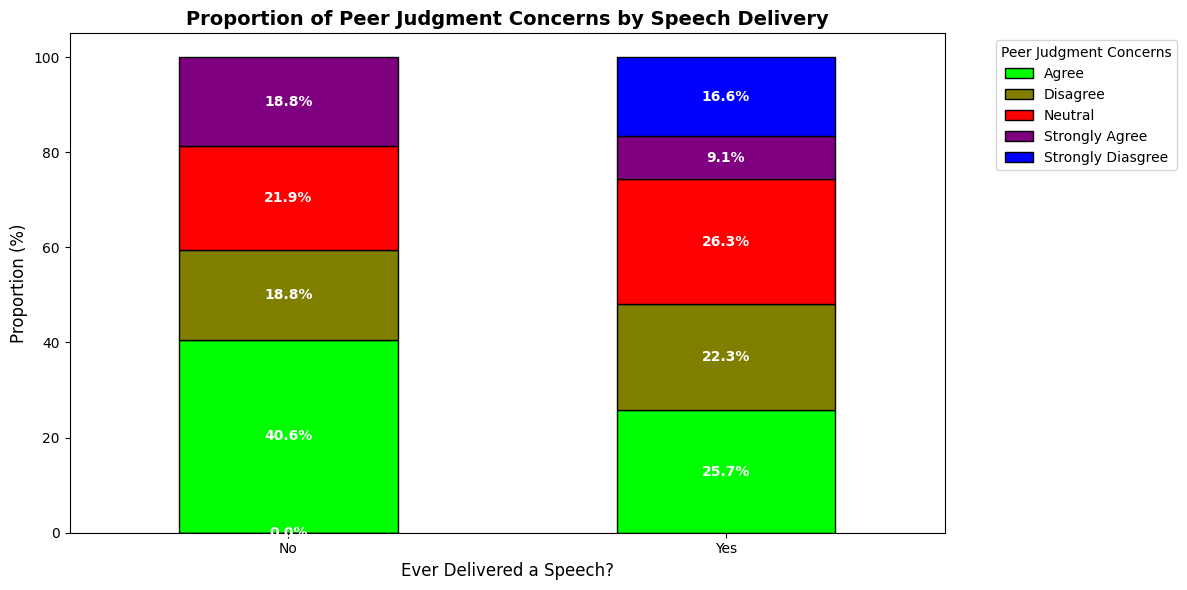

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Ever delivered a speech?", "Concerned about being judged by peers?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Peer Judgment Concerns by Speech Delivery", fontsize=14, fontweight="bold")
plt.xlabel("Ever Delivered a Speech?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Peer Judgment Concerns", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


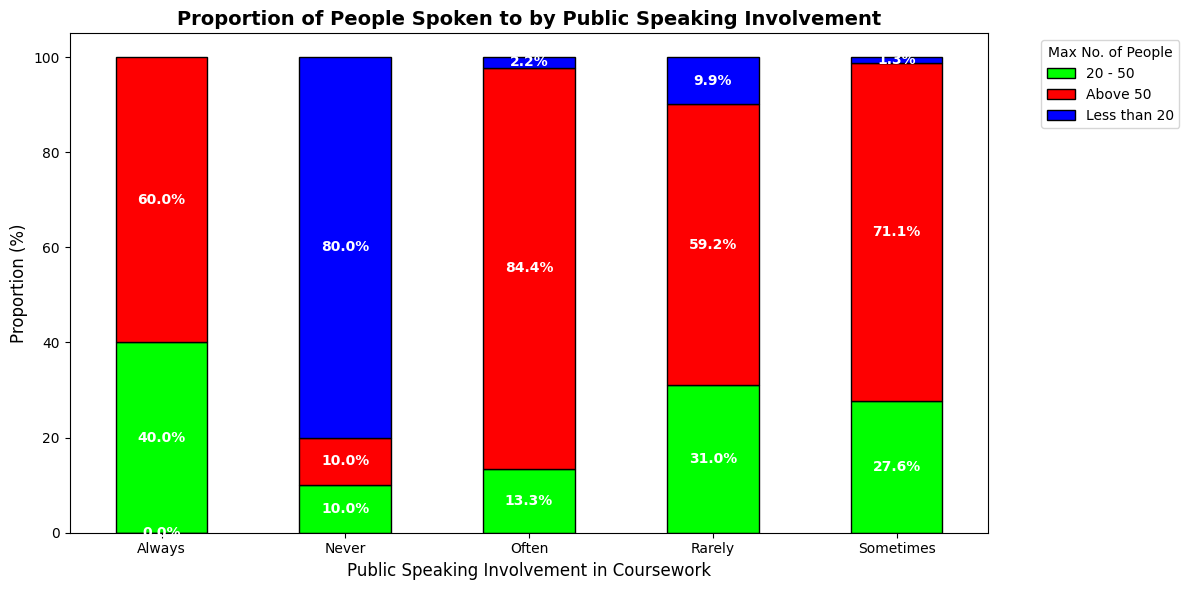

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Public speaking involvement in coursework", "Max no. of people spoken to"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of People Spoken to by Public Speaking Involvement", fontsize=14, fontweight="bold")
plt.xlabel("Public Speaking Involvement in Coursework", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Max No. of People", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# proportions = Data.groupby(["Public speaking involvement in coursework", "Ease in making friends"]).size().unstack(fill_value=0)
# proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# proportions.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="brg_r")
# plt.title("Proportion of Ease in Making Friends by Public Speaking Involvement")
# plt.xlabel("Public Speaking Involvement in Coursework")
# plt.ylabel("Proportion (%)")
# plt.legend(title="Ease in Making Friends", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.show()


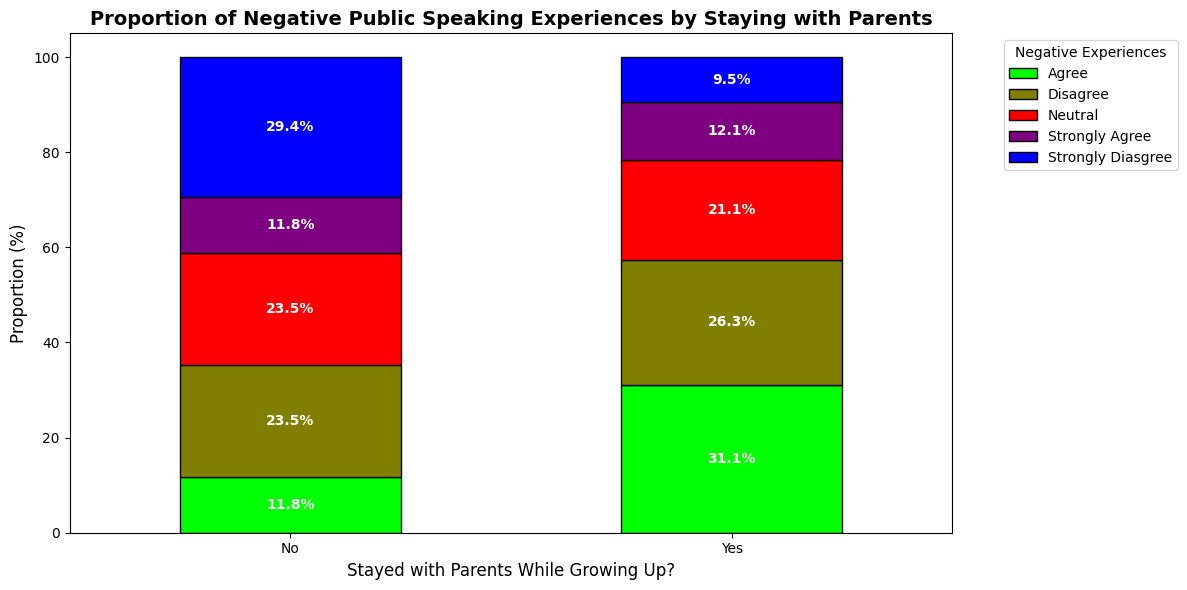

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Stayed with parents while growing up?", "Negative experiences in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Negative Public Speaking Experiences by Staying with Parents", fontsize=14, fontweight="bold")
plt.xlabel("Stayed with Parents While Growing Up?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Negative Experiences", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


##Heuristics: "Stayed with parents while growing up?" - Yes (high;  Agree: 4), No (low; Agree: 4), "Negative experiences in public speaking?"

##"Stayed with parents while growing up?", "Negative experiences in public speaking?"

#GENERAL WEIGHT: 4.5

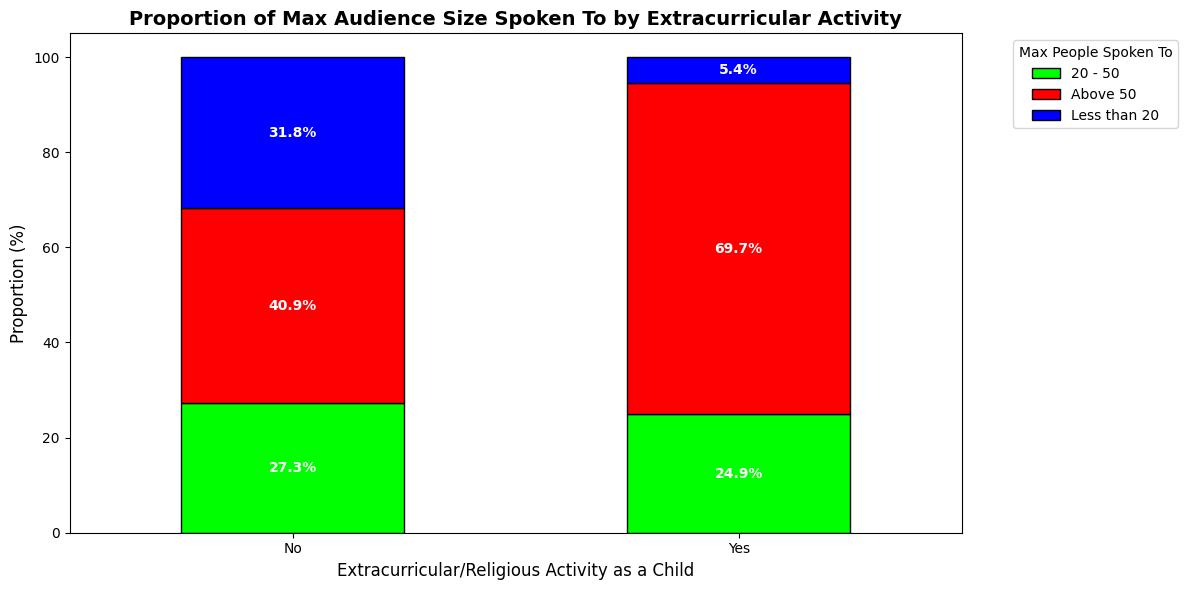

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Max no. of people spoken to"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Max Audience Size Spoken To by Extracurricular Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Max People Spoken To", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


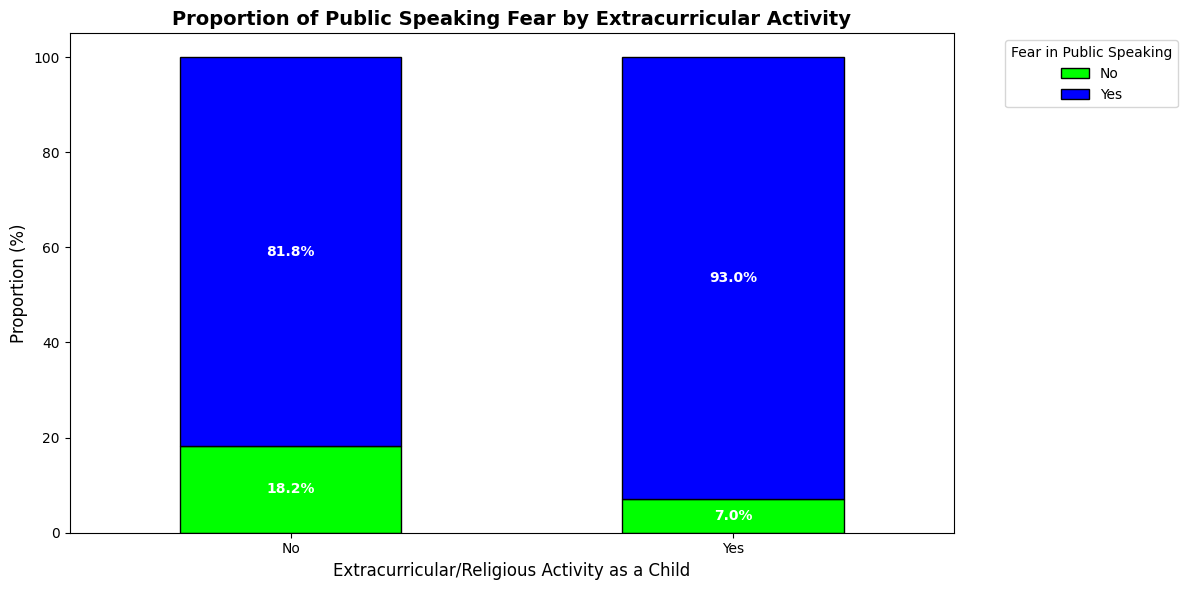

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Ever experienced fear in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Public Speaking Fear by Extracurricular Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Fear in Public Speaking", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


##Heuristics on extracurricular activities as a child: high (Yes), medium (No)

##Columns: "Stayed with parents while growing up?", "Negative experiences in public speaking?

#GENERAL WEIGHT: 4.5

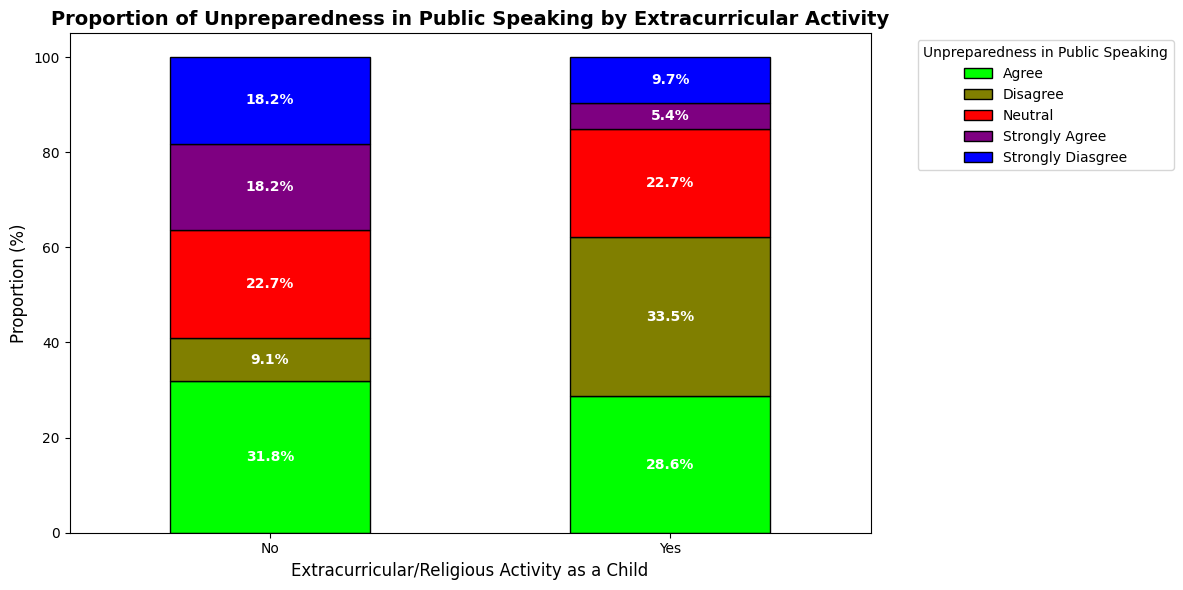

In [ ]:
import matplotlib.pyplot as plt

# Compute proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Unpreparedness/practice in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Unpreparedness in Public Speaking by Extracurricular Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Unpreparedness in Public Speaking", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


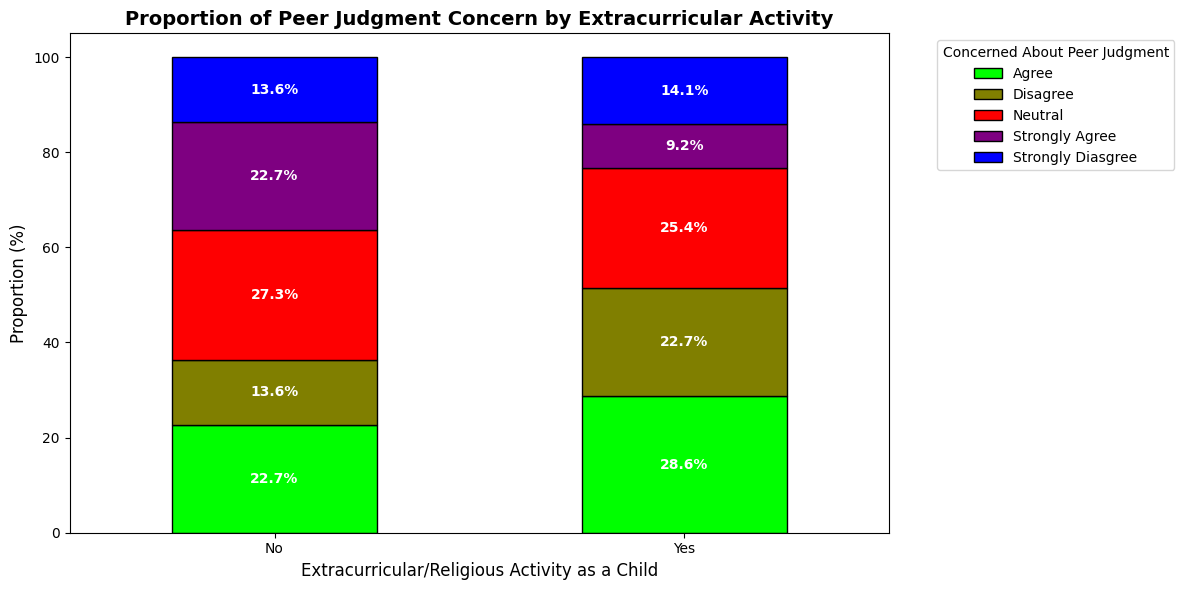

In [ ]:
import matplotlib.pyplot as plt

# Compute proportions
proportions = Data.groupby(["Extracurricular/religious activity as a child", "Concerned about being judged by peers?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Peer Judgment Concern by Extracurricular Activity", fontsize=14, fontweight="bold")
plt.xlabel("Extracurricular/Religious Activity as a Child", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Concerned About Peer Judgment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


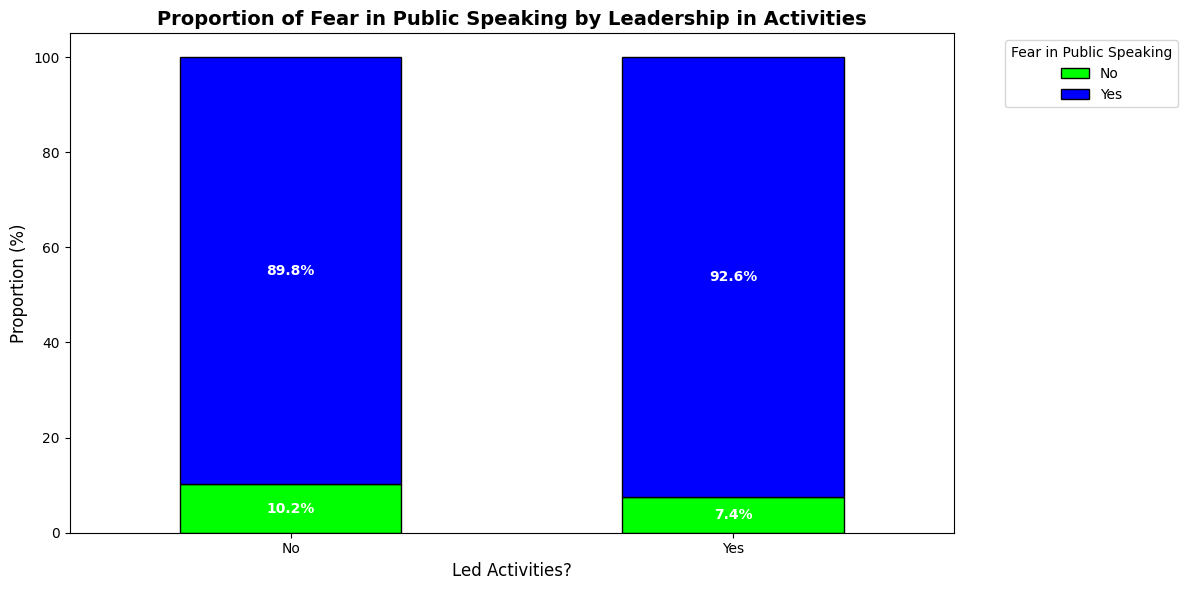

In [ ]:
import matplotlib.pyplot as plt

# Compute proportions
proportions = Data.groupby(["Led these activities?", "Ever experienced fear in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Fear in Public Speaking by Leadership in Activities", fontsize=14, fontweight="bold")
plt.xlabel("Led Activities?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Fear in Public Speaking", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


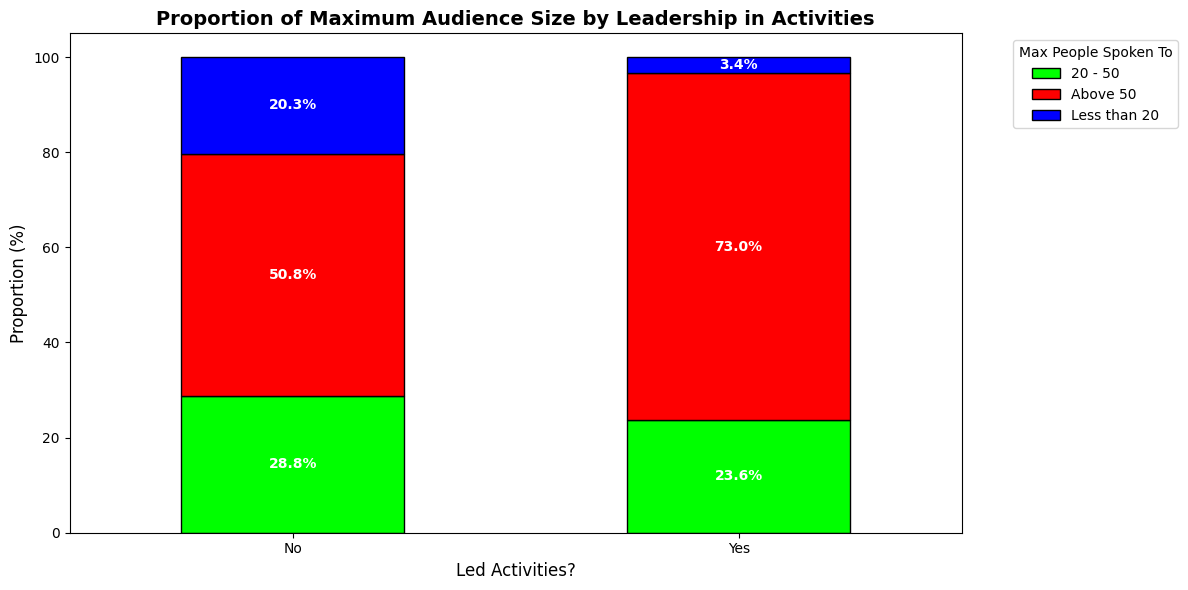

In [ ]:
import matplotlib.pyplot as plt

# Compute proportions
proportions = Data.groupby(["Led these activities?", "Max no. of people spoken to"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Maximum Audience Size by Leadership in Activities", fontsize=14, fontweight="bold")
plt.xlabel("Led Activities?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Max People Spoken To", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


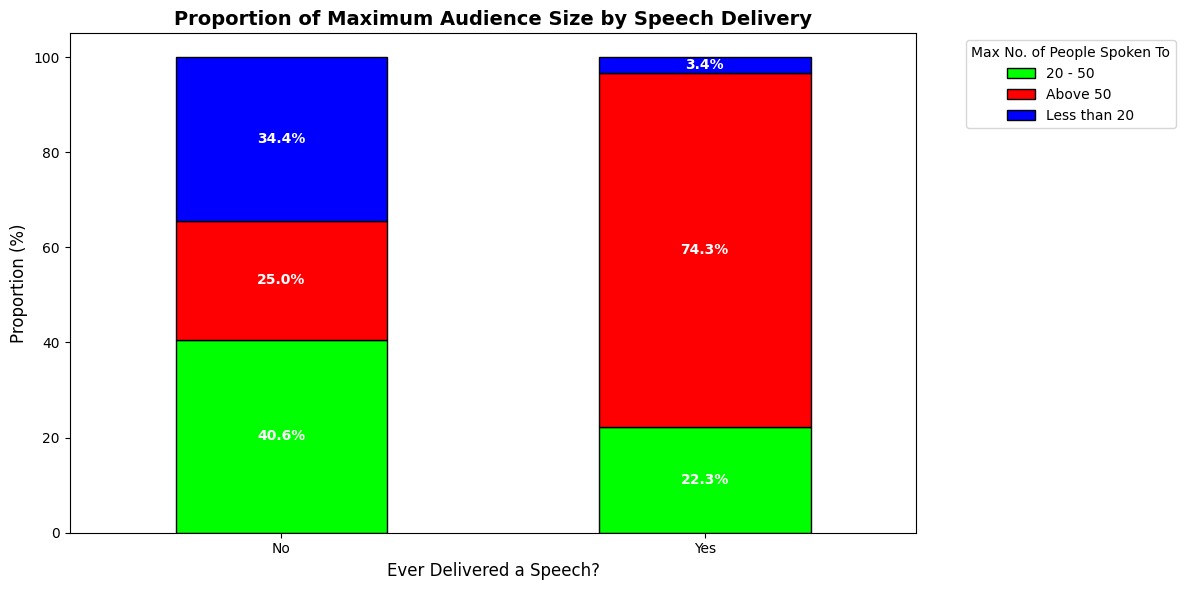

In [ ]:
import matplotlib.pyplot as plt

# Compute proportions
proportions = Data.groupby(["Ever delivered a speech?", "Max no. of people spoken to"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
proportions.plot(kind="bar", stacked=True, colormap="brg_r", edgecolor="black", ax=ax)

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

# Formatting
plt.title("Proportion of Maximum Audience Size by Speech Delivery", fontsize=14, fontweight="bold")
plt.xlabel("Ever Delivered a Speech?", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=0)  # Keeps labels readable
plt.legend(title="Max No. of People Spoken To", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()


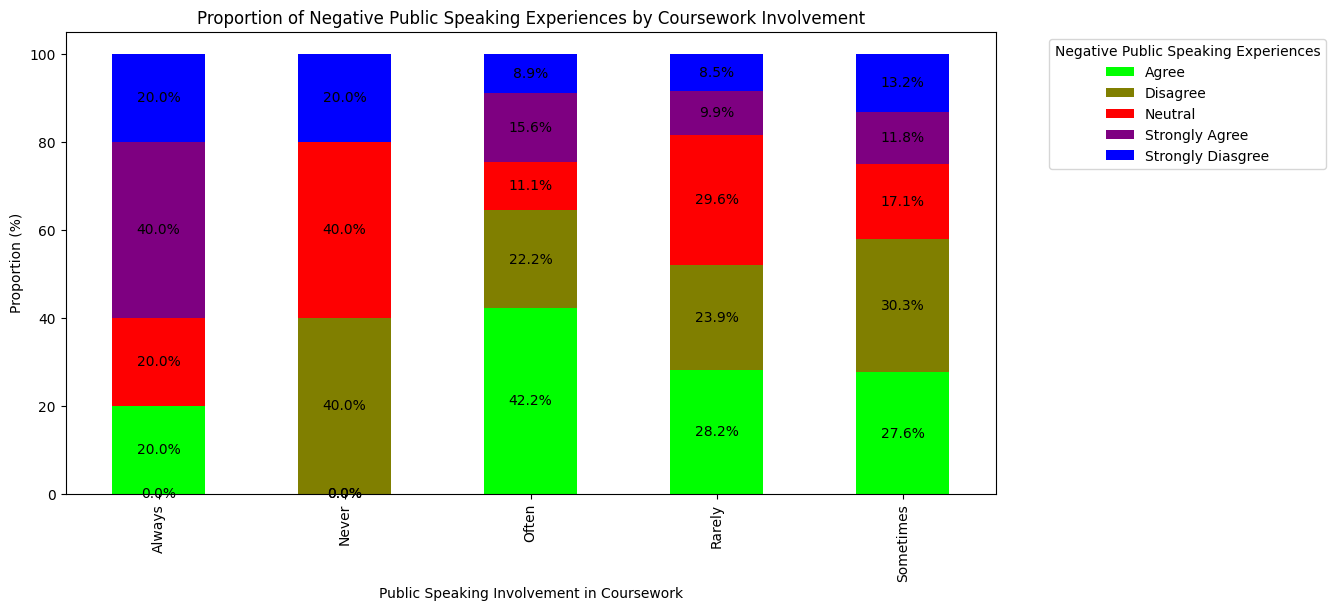

In [ ]:
# Calculate proportions
proportions = Data.groupby(["Public speaking involvement in coursework", "Negative experiences in public speaking?"]).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# Plot
ax = proportions.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="brg_r")

# Add percentage labels at the middle of each segment
for c in ax.containers:
   # Get the positions and heights for the current segment
   positions = [rect.get_x() + rect.get_width()/2 for rect in c]
   heights = [rect.get_height() for rect in c]
   # Add labels
   labels = ['%.1f%%' % h for h in heights]
   ax.bar_label(c, labels=labels, label_type='center')

plt.title("Proportion of Negative Public Speaking Experiences by Coursework Involvement")
plt.xlabel("Public Speaking Involvement in Coursework")
plt.ylabel("Proportion (%)")
plt.legend(title="Negative Public Speaking Experiences", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

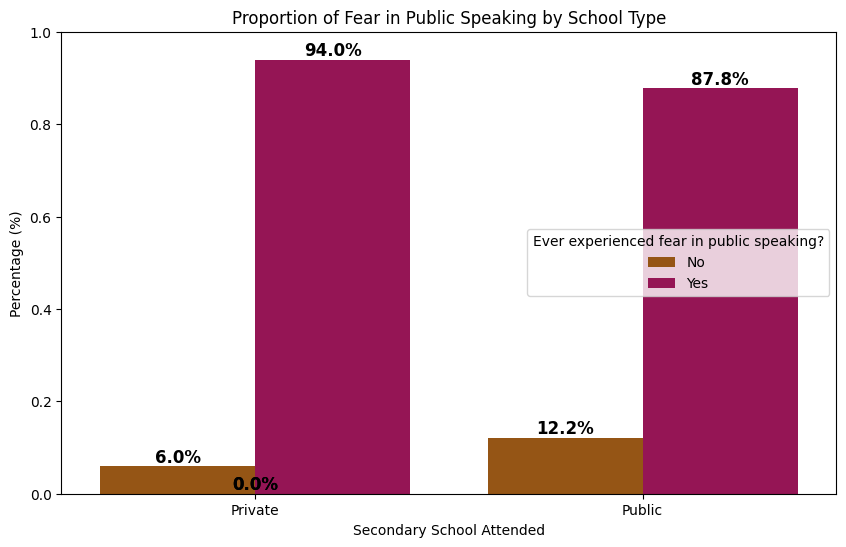

In [ ]:
plt.figure(figsize=(10, 6))

# Compute proportions
fear_counts = Data_filtered.groupby(["Secondary School attended", "Ever experienced fear in public speaking?"]).size().reset_index(name="Count")
total_counts = Data_filtered["Secondary School attended"].value_counts().to_dict()
fear_counts["Proportion"] = fear_counts.apply(lambda row: row["Count"] / total_counts[row["Secondary School attended"]], axis=1)

# Plot
ax = sns.barplot(x="Secondary School attended", y="Proportion", hue="Ever experienced fear in public speaking?", data=fear_counts, palette="brg_r")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Proportion of Fear in Public Speaking by School Type")
plt.ylabel("Percentage (%)")
plt.xlabel("Secondary School Attended")
plt.ylim(0, 1)  # Keep scale in proportion
plt.show()


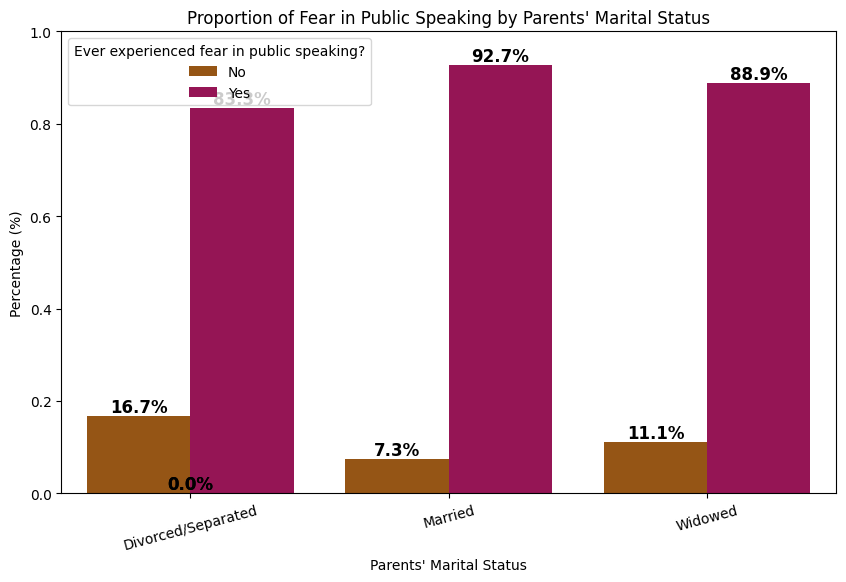

In [ ]:
plt.figure(figsize=(10, 6))

# Compute proportions
fear_counts = Data_filtered.groupby(["Parents' Marital Status", "Ever experienced fear in public speaking?"]).size().reset_index(name="Count")
total_counts = Data_filtered["Parents' Marital Status"].value_counts().to_dict()
fear_counts["Proportion"] = fear_counts.apply(lambda row: row["Count"] / total_counts[row["Parents' Marital Status"]], axis=1)

# Plot
ax = sns.barplot(x="Parents' Marital Status", y="Proportion", hue="Ever experienced fear in public speaking?", data=fear_counts, palette="brg_r")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Proportion of Fear in Public Speaking by Parents' Marital Status")
plt.ylabel("Percentage (%)")
plt.xlabel("Parents' Marital Status")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


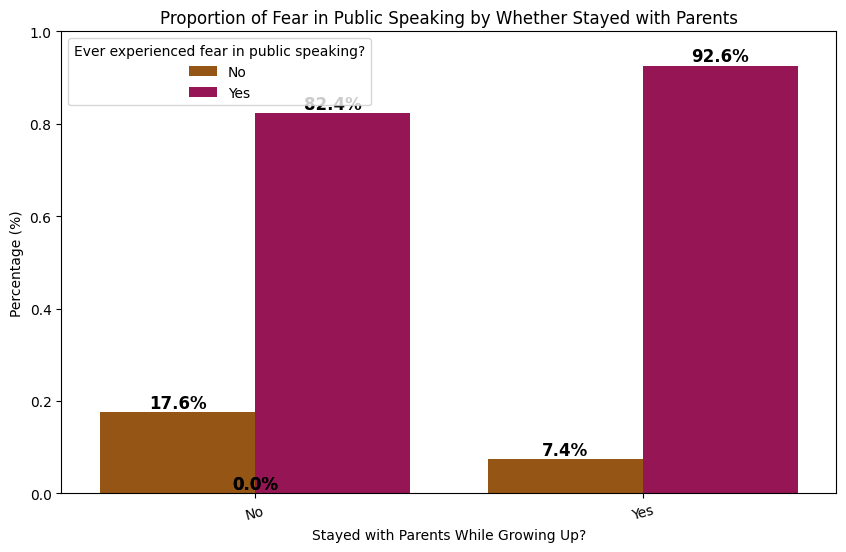

In [ ]:
plt.figure(figsize=(10, 6))

# Compute proportions
fear_counts = Data_filtered.groupby(["Stayed with parents while growing up?", "Ever experienced fear in public speaking?"]).size().reset_index(name="Count")
total_counts = Data_filtered["Stayed with parents while growing up?"].value_counts().to_dict()
fear_counts["Proportion"] = fear_counts.apply(lambda row: row["Count"] / total_counts[row["Stayed with parents while growing up?"]], axis=1)

# Plot
ax = sns.barplot(x="Stayed with parents while growing up?", y="Proportion", hue="Ever experienced fear in public speaking?", data=fear_counts, palette="brg_r")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Proportion of Fear in Public Speaking by Whether Stayed with Parents")
plt.ylabel("Percentage (%)")
plt.xlabel("Stayed with Parents While Growing Up?")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


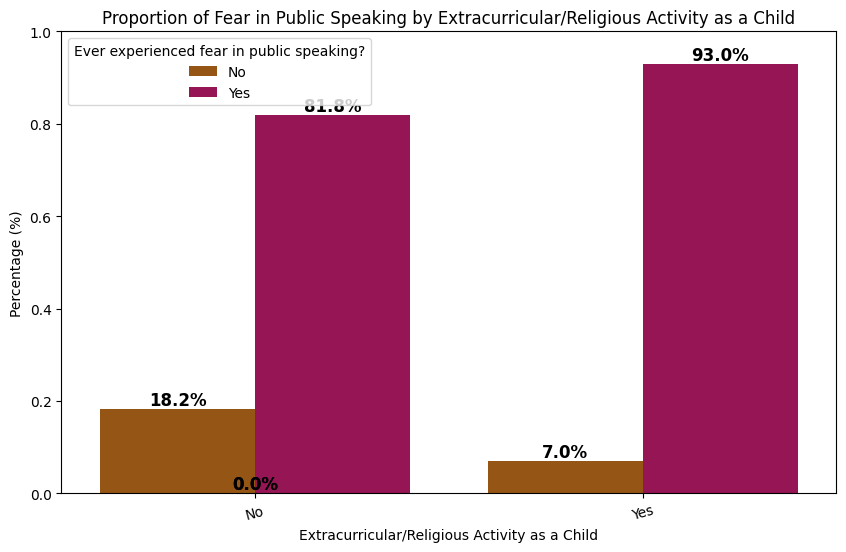

In [ ]:
plt.figure(figsize=(10, 6))

# Compute proportions
fear_counts = Data_filtered.groupby(["Extracurricular/religious activity as a child", "Ever experienced fear in public speaking?"]).size().reset_index(name="Count")
total_counts = Data_filtered["Extracurricular/religious activity as a child"].value_counts().to_dict()
fear_counts["Proportion"] = fear_counts.apply(lambda row: row["Count"] / total_counts[row["Extracurricular/religious activity as a child"]], axis=1)

# Plot
ax = sns.barplot(x="Extracurricular/religious activity as a child", y="Proportion", hue="Ever experienced fear in public speaking?", data=fear_counts, palette="brg_r")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Proportion of Fear in Public Speaking by Extracurricular/Religious Activity as a Child")
plt.ylabel("Percentage (%)")
plt.xlabel("Extracurricular/Religious Activity as a Child")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


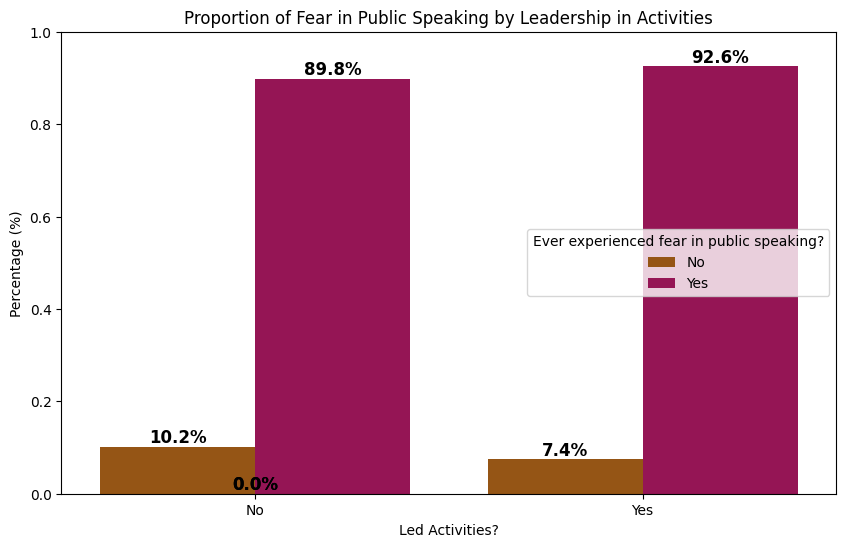

In [ ]:
plt.figure(figsize=(10, 6))

# Compute proportions
fear_counts = Data_filtered.groupby(["Led these activities?", "Ever experienced fear in public speaking?"]).size().reset_index(name="Count")
total_counts = Data_filtered["Led these activities?"].value_counts().to_dict()
fear_counts["Proportion"] = fear_counts.apply(lambda row: row["Count"] / total_counts[row["Led these activities?"]], axis=1)

# Plot
ax = sns.barplot(x="Led these activities?", y="Proportion", hue="Ever experienced fear in public speaking?", data=fear_counts, palette="brg_r")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Proportion of Fear in Public Speaking by Leadership in Activities")
plt.ylabel("Percentage (%)")
plt.xlabel("Led Activities?")
plt.ylim(0, 1)
plt.show()


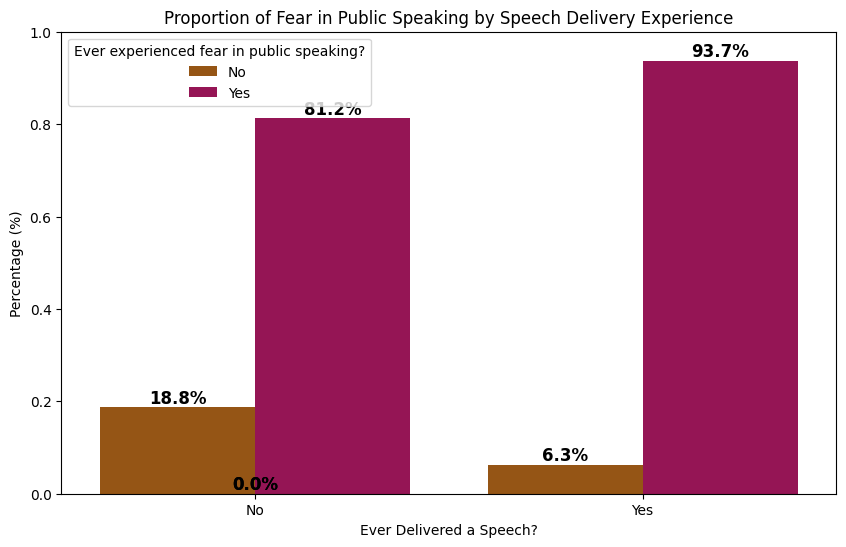

In [ ]:
plt.figure(figsize=(10, 6))

# Compute proportions
fear_counts = Data_filtered.groupby(["Ever delivered a speech?", "Ever experienced fear in public speaking?"]).size().reset_index(name="Count")
total_counts = Data_filtered["Ever delivered a speech?"].value_counts().to_dict()
fear_counts["Proportion"] = fear_counts.apply(lambda row: row["Count"] / total_counts[row["Ever delivered a speech?"]], axis=1)

# Plot
ax = sns.barplot(x="Ever delivered a speech?", y="Proportion", hue="Ever experienced fear in public speaking?", data=fear_counts, palette="brg_r")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Proportion of Fear in Public Speaking by Speech Delivery Experience")
plt.ylabel("Percentage (%)")
plt.xlabel("Ever Delivered a Speech?")
plt.ylim(0, 1)
plt.show()


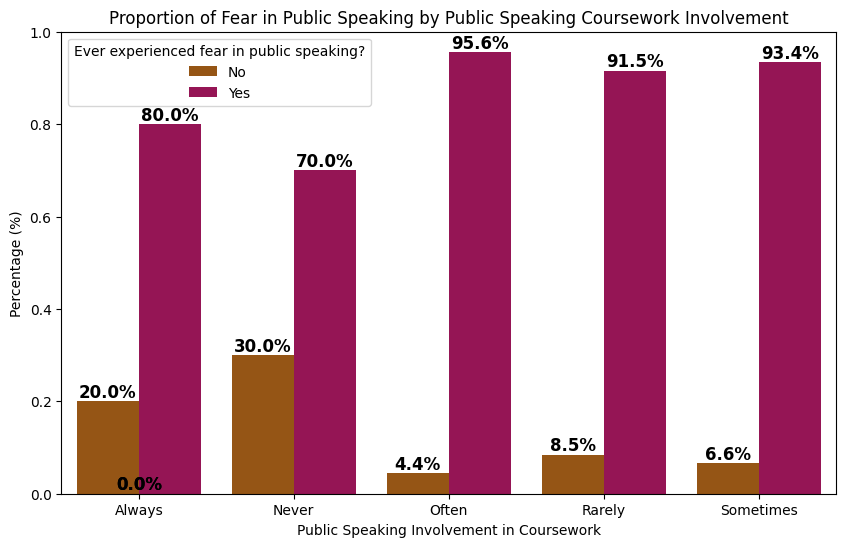

In [ ]:
plt.figure(figsize=(10, 6))

# Compute proportions
fear_counts = Data_filtered.groupby(["Public speaking involvement in coursework", "Ever experienced fear in public speaking?"]).size().reset_index(name="Count")
total_counts = Data_filtered["Public speaking involvement in coursework"].value_counts().to_dict()
fear_counts["Proportion"] = fear_counts.apply(lambda row: row["Count"] / total_counts[row["Public speaking involvement in coursework"]], axis=1)

# Plot
ax = sns.barplot(x="Public speaking involvement in coursework", y="Proportion", hue="Ever experienced fear in public speaking?", data=fear_counts, palette="brg_r")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Proportion of Fear in Public Speaking by Public Speaking Coursework Involvement")
plt.ylabel("Percentage (%)")
plt.xlabel("Public Speaking Involvement in Coursework")
plt.ylim(0, 1)
plt.show()


#**REGRESSION PLOT: LOGISTIC REGRESSION**

##Data Preprocessing (Train-Test Split) and Handling Class Imbalance with SMOTE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Handle missing values in the dependent variable
Data = Data.dropna(subset=["Ever experienced fear in public speaking?"])

# Define independent & dependent variables
X = Data[
    [
        "Secondary School attended",
        "Who do you live with?",
        "Stayed with parents while growing up?",
       "Medical issue related to anxiety?",
        "Voiced out opinioin as a child?"
    ]
]
y = Data["Ever experienced fear in public speaking?"]

# Encode categorical variables
encoder = OneHotEncoder(handle_unknown="ignore", drop="first")
X_encoded = encoder.fit_transform(X).toarray()

# Encode the dependent variable (binary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the encoding of the dependent variable
print("Encoded classes:", label_encoder.classes_)  # Should show ['No', 'Yes'] or ['Yes', 'No']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", np.unique(y_train, return_counts=True))

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", np.unique(y_train_resampled, return_counts=True))

# Initialize logistic regression model with balanced class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Encoded classes: ['No' 'Yes']
Class distribution before SMOTE: (array([0, 1]), array([ 14, 151]))
Class distribution after SMOTE: (array([0, 1]), array([151, 151]))
              precision    recall  f1-score   support

          No       0.18      0.67      0.29         3
         Yes       0.97      0.77      0.86        39

    accuracy                           0.76        42
   macro avg       0.57      0.72      0.57        42
weighted avg       0.91      0.76      0.82        42



##Train the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression for binary classification
model = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

##Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.7619

Classification Report:
              precision    recall  f1-score   support

          No       0.18      0.67      0.29         3
         Yes       0.97      0.77      0.86        39

    accuracy                           0.76        42
   macro avg       0.57      0.72      0.57        42
weighted avg       0.91      0.76      0.82        42


Confusion Matrix:
[[ 2  1]
 [ 9 30]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Use 'linear' kernel for binary classification

# Train the model
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.3095

SVM Classification Report:
              precision    recall  f1-score   support

          No       0.09      1.00      0.17         3
         Yes       1.00      0.26      0.41        39

    accuracy                           0.31        42
   macro avg       0.55      0.63      0.29        42
weighted avg       0.94      0.31      0.39        42


SVM Confusion Matrix:
[[ 3  0]
 [29 10]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9048

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.93      0.97      0.95        39

    accuracy                           0.90        42
   macro avg       0.46      0.49      0.47        42
weighted avg       0.86      0.90      0.88        42


Random Forest Confusion Matrix:
[[ 0  3]
 [ 1 38]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9048

Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.93      0.97      0.95        39

    accuracy                           0.90        42
   macro avg       0.46      0.49      0.47        42
weighted avg       0.86      0.90      0.88        42


Decision Tree Confusion Matrix:
[[ 0  3]
 [ 1 38]]


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate a model and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate all models
results = {
    "Logistic Regression": evaluate_model(logreg, X_test, y_test),
    "SVM": evaluate_model(svm_model, X_test, y_test),
    "Random Forest": evaluate_model(rf_model, X_test, y_test),
    "Decision Tree": evaluate_model(dt_model, X_test, y_test),
}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T

# Print the results
print("Model Comparison:")
print(results_df)

Model Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.761905   0.911605  0.761905  0.816327
SVM                  0.309524   0.935268  0.309524  0.391254
Random Forest        0.904762   0.860627  0.904762  0.882143
Decision Tree        0.904762   0.860627  0.904762  0.882143


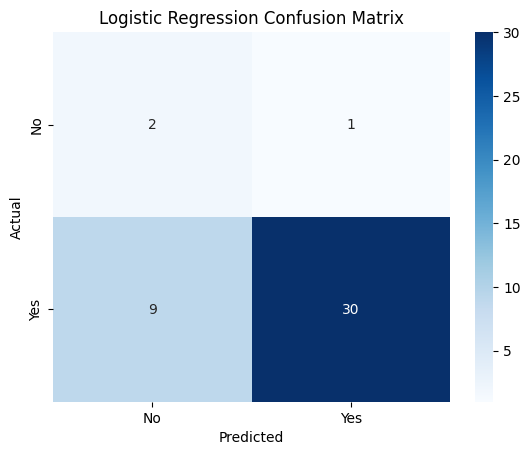

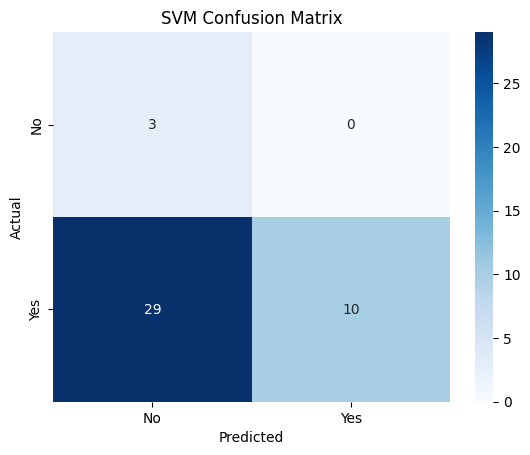

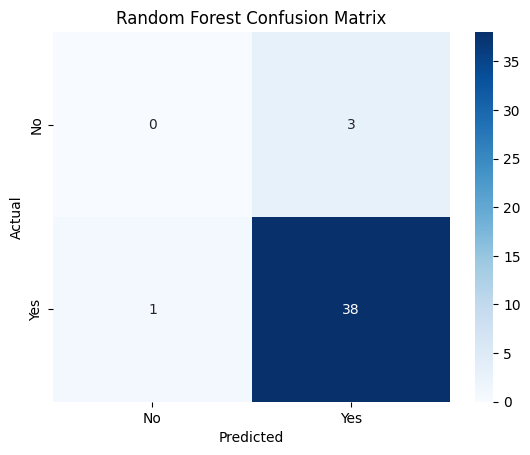

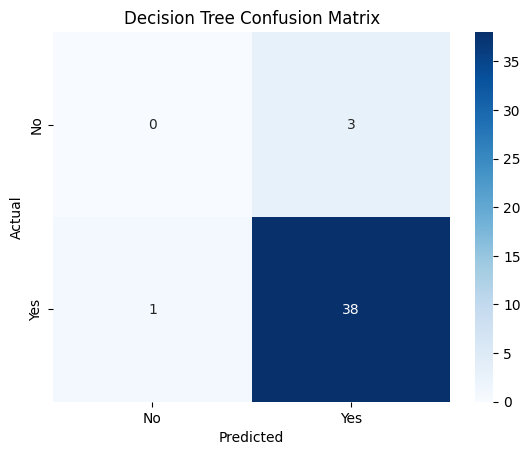

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, y_pred, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

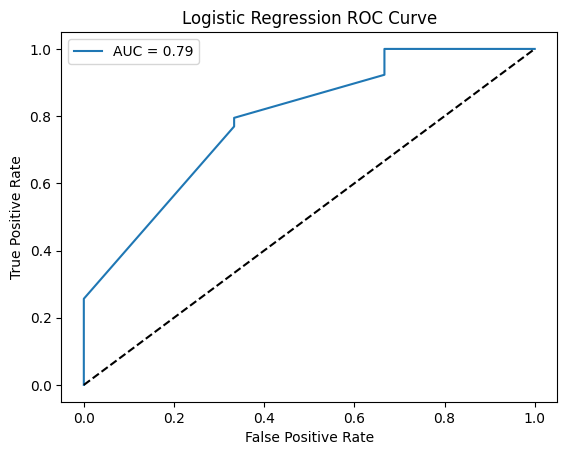

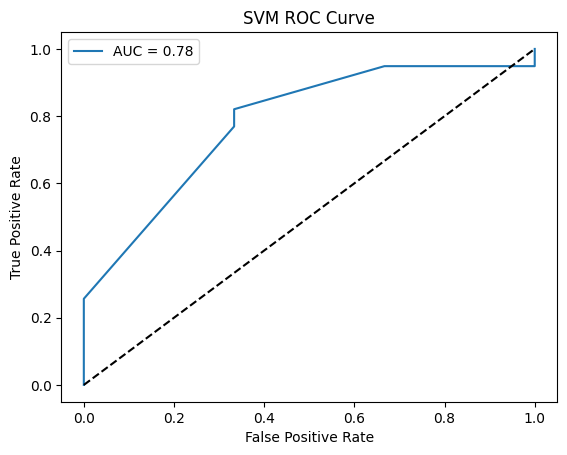

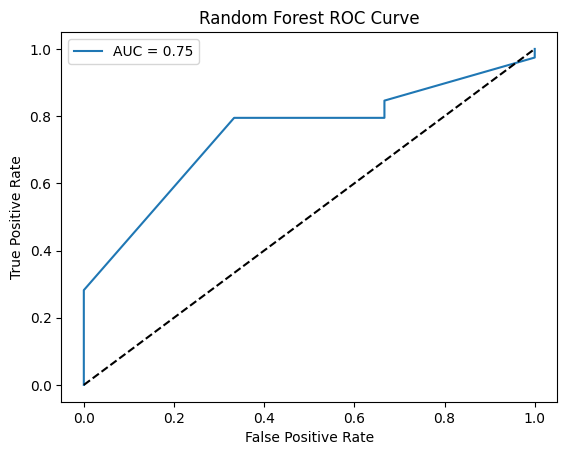

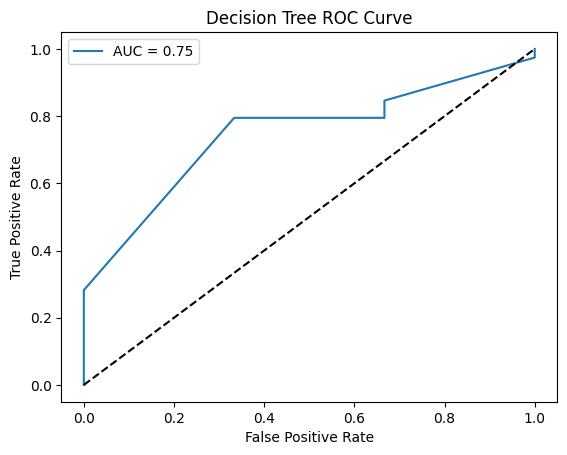

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Get predicted probabilities for the positive class (Yes)
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Plot ROC curve for each model
plot_roc_curve(y_test, y_pred_proba_logreg, "Logistic Regression ROC Curve")
plot_roc_curve(y_test, y_pred_proba_svm, "SVM ROC Curve")
plot_roc_curve(y_test, y_pred_proba_rf, "Random Forest ROC Curve")
plot_roc_curve(y_test, y_pred_proba_dt, "Decision Tree ROC Curve")

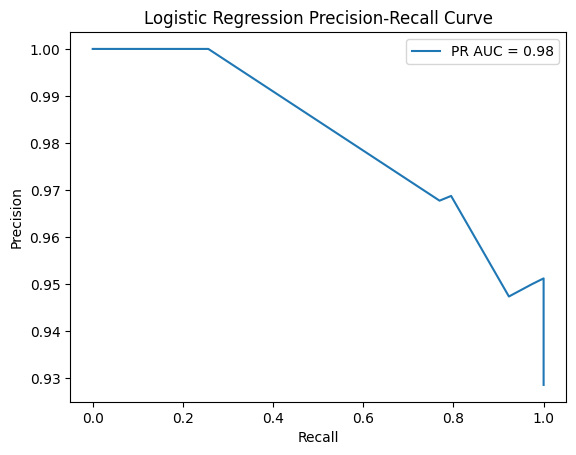

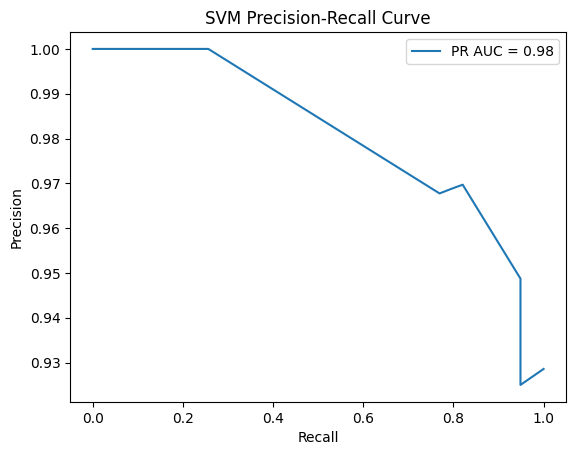

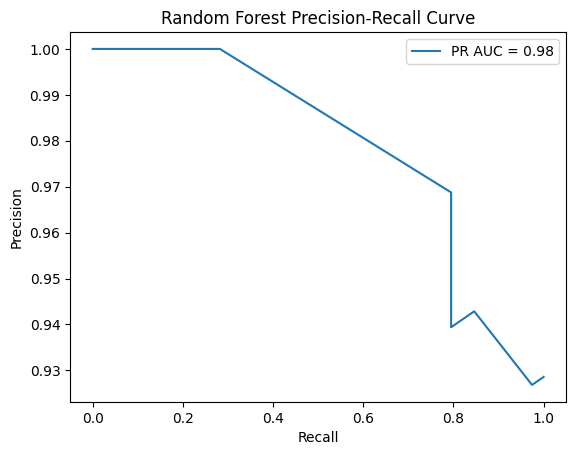

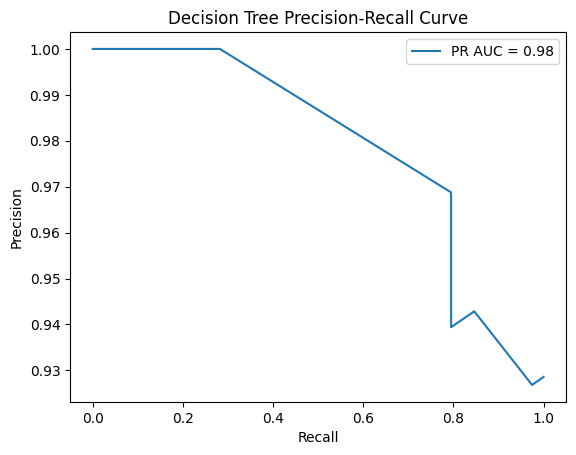

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred_proba, title):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
    plt.title(title)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

# Plot Precision-Recall curve for each model
plot_precision_recall_curve(y_test, y_pred_proba_logreg, "Logistic Regression Precision-Recall Curve")
plot_precision_recall_curve(y_test, y_pred_proba_svm, "SVM Precision-Recall Curve")
plot_precision_recall_curve(y_test, y_pred_proba_rf, "Random Forest Precision-Recall Curve")
plot_precision_recall_curve(y_test, y_pred_proba_dt, "Decision Tree Precision-Recall Curve")

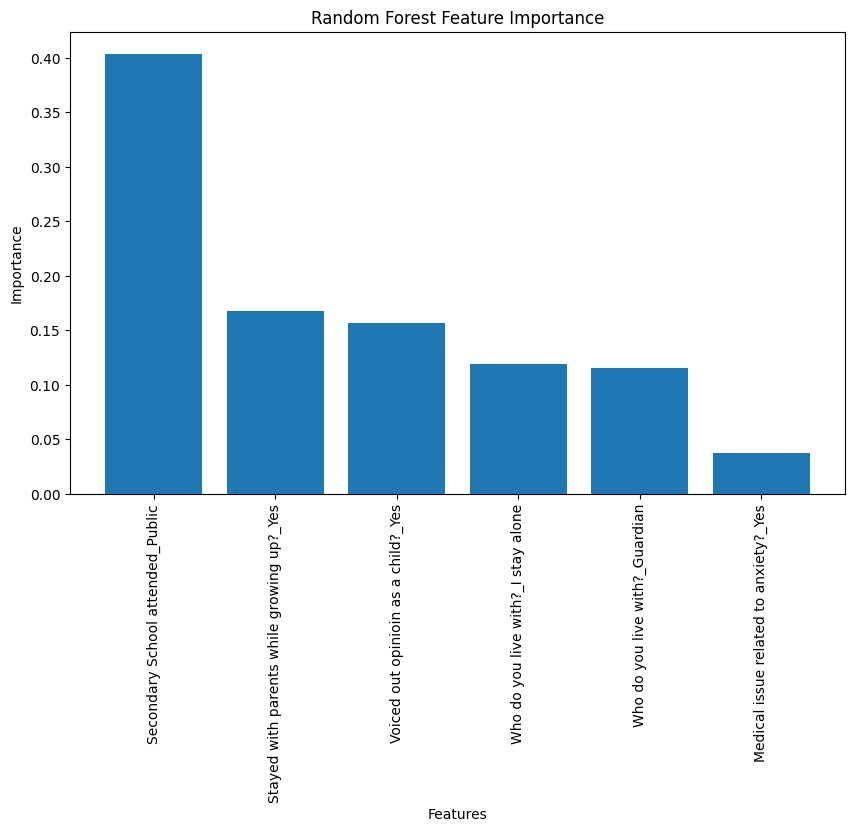

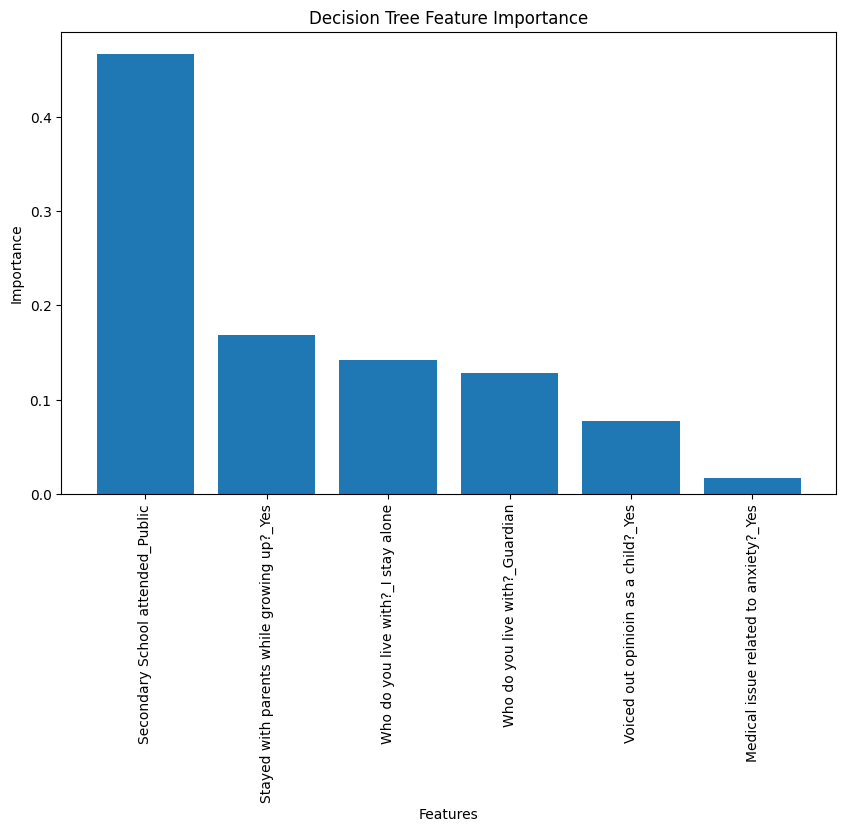

In [ ]:
# Function to plot feature importance
def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

# Get feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=X.columns)

# Plot feature importance for Random Forest
plot_feature_importance(rf_model, feature_names, "Random Forest Feature Importance")

# Plot feature importance for Decision Tree
plot_feature_importance(dt_model, feature_names, "Decision Tree Feature Importance")

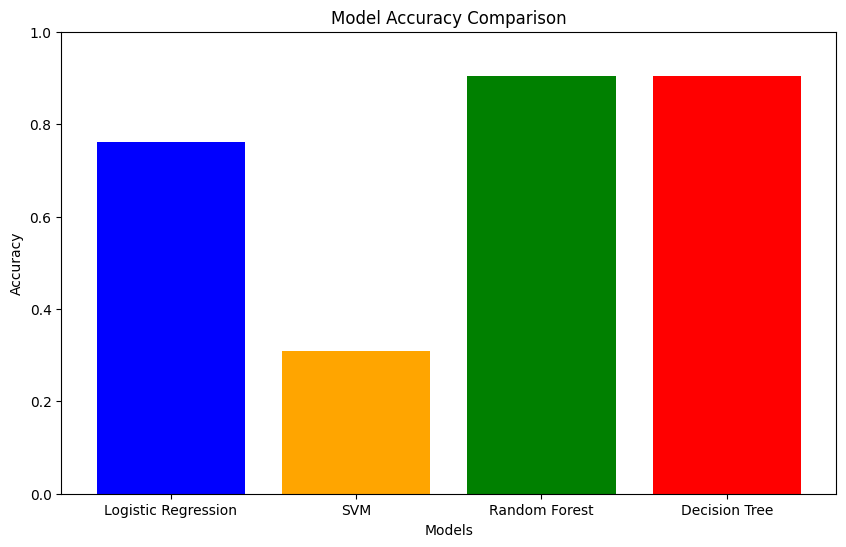

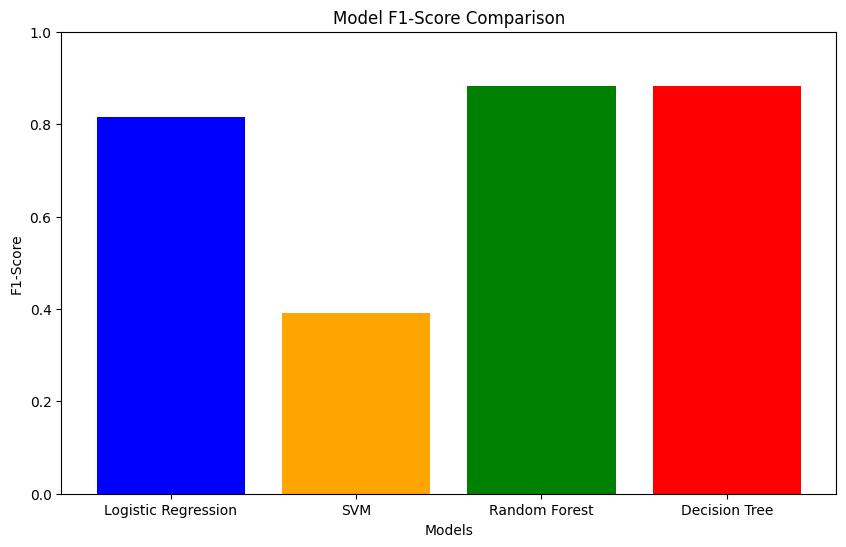

In [ ]:
# Model comparison data
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree']
accuracy = [0.761905, 0.309524, 0.904762, 0.904762]
f1_score = [0.816327, 0.391254, 0.882143, 0.882143]

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot F1-score comparison
plt.figure(figsize=(10, 6))
plt.bar(models, f1_score, color=['blue', 'orange', 'green', 'red'])
plt.title('Model F1-Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()

In [ ]:
len(Data.columns)

51

In [ ]:
Data.shape

(207, 51)